# DM_week_3 数据分析


# assignment
## 数据摘要
      标称属性，给出每个可能取值的频数

      数值属性，给出5数概括及缺失值的个数

## 数据可视化
      使用直方图、盒图等检查数据分布及离群点

## 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。

# 0.加载数据集


## Columns

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`run_time`: in minutes

`director`: director's name

`writer`: list of all the writers

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Load data set.
mov_data = pd.read_csv('datasets/movies_dataset.csv')

# Check the columns.
mov_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [3]:
# 去除不相关列
mov_data = mov_data.drop(columns='Unnamed: 0')

In [4]:
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

# 1.数据摘要

## 属性预览
分析不同属性的类型，样例，唯一值个数，空值比例

In [5]:
def dtype_uni_miss(mov_data):
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)
        
        specimen = mov_data.loc[mov_data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        num_unique.append(mov_data[column].nunique())
        
        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
    df.columns=['dtype', 'eg.', 'num_unique', 'null_share']
 
    return df

In [6]:
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads         object                                                304   
id                 int64                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views             object                                              2,794   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

对属性进行预览：

In [7]:
mov_data.head()

IMDb-rating appropriate_for      director downloads      id  \
0          4.8               R     John Swab       304  372092   
1          6.4           TV-PG   Paul Ziller        73  372091   
2          5.2               R  Ben Wheatley     1,427  343381   
3          8.1             NaN  Venky Atluri     1,549  372090   
4          4.6             NaN  Shaji Kailas       657  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   

                                        title   views                  writer  
0                                Little Dixie   2,794               John Swab  
1  Grilling Season: A Curious Caterer Mystery   1,002  John Christian Plummer  
2                                In the Earth  14,419            Ben Wheatley  
3                                      Vaathi   4,878            Venky Atluri  
4                                       Alone   2,438        Rajesh Jayaraman

downloads和views本应是数值属性，于是将downloads和views从字符串转换成数值属性

In [8]:
for col in 'downloads', 'views':
    mov_data[col] = mov_data[col].str.replace(',','')
    mov_data[col] = mov_data[col].astype('float')
 
mov_data['id'] = mov_data['id'].astype('str')

In [9]:

# for col in 'downloads', 'views':
#     mov_data[col] = mov_data[col].astype('int')
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              304.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views            float64                                             2794.0   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

## 标称属性 nominal attributes

`id`: movie's unique id

`title`: movie's name

`storyline`: a short description of the movie

`appropriate_for`: R-rated, PG-13, etc

`language`: this can be multiple languages also

`industry`: Hollywood, Bollywood, etc.

`posted_date`: when the movie is posted on the platform

`release_date`: when the movie is released worldwide

`runtime`: in minutes

`director`: director's name

`writer`: list of all the writers


列出每个属性的每个值的频数

In [10]:
def list_frequencies(mov_data):
    result_list = []
    for col in mov_data:
        if mov_data[col].dtype == 'object':
            nominal_frequencies = mov_data[col].value_counts()
            for value, count in nominal_frequencies.items():
                result_list.append({'':col,'value':value,'count':count})
    
    df = pd.DataFrame(result_list)
    return df

# 假设你的数据集存储在一个名为mov_data的DataFrame中
# 假设标称属性的列名为'category'
# nominal_column_name = 'director'  # 请替换为你的标称属性列名

# nominal_frequencies = calculate_nominal_frequencies(mov_data, nominal_column_name)
# print("标称属性的频数：")
# print(nominal_frequencies)


In [11]:
list_frequencies(mov_data)

value  count
0      appropriate_for                                       R   4384
1      appropriate_for                               Not Rated   2142
2      appropriate_for                                   PG-13   1968
3      appropriate_for                                      PG    886
4      appropriate_for                                   TV-14    694
...                ...                                     ...    ...
83298           writer          Barbara Samuels, Joseph Boyden      1
83299           writer                            Maria Allred      1
83300           writer                             Pia Mechler      1
83301           writer         Paul Flannery, David Ryan Keith      1
83302           writer  Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1

[83303 rows x 3 columns]

### 对每个标称属性进行分析

`id`

In [12]:
mov_data['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

可以看出，存在重复的id，说明一部电影可能存在多条数据记录

In [13]:
# 查看其中一部电影的记录
mov_data[mov_data['id'] == '372090']

IMDb-rating appropriate_for      director  downloads      id  \
3              8.1             NaN  Venky Atluri     1549.0  372090   
38             8.1             NaN  Venky Atluri     1550.0  372090   
82             8.1             NaN  Venky Atluri     1552.0  372090   
126            8.1             NaN  Venky Atluri     1557.0  372090   
170            8.1             NaN  Venky Atluri     1558.0  372090   
...            ...             ...           ...        ...     ...   
17461          8.1             NaN  Venky Atluri     2369.0  372090   
17505          8.1             NaN  Venky Atluri     2374.0  372090   
17549          8.1             NaN  Venky Atluri     2375.0  372090   
17593          8.1             NaN  Venky Atluri     2378.0  372090   
17637          8.1             NaN  Venky Atluri     2379.0  372090   

        industry language   posted_date release_date run_time  \
3      Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
38     Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
82     Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
126    Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
170    Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
...          ...      ...           ...          ...      ...   
17461  Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
17505  Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
17549  Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
17593  Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   
17637  Tollywood    Hindi  20 Feb, 2023  Feb 17 2023      139   

                                               storyline   title   views  \
3      The life of a young man and his struggles agai...  Vaathi  4878.0   
38     The life of a young man and his struggles agai...  Vaathi  4882.0   
82     The life of a young man and his struggles agai...  Vaathi  4889.0   
126    The life of a young man and his struggles agai...  Vaathi  4900.0   
170    The life of a young man and his struggles agai...  Vaathi  4905.0   
...                                                  ...     ...     ...   
17461  The life of a young man and his struggles agai...  Vaathi  7864.0   
17505  The life of a young man and his struggles agai...  Vaathi  7873.0   
17549  The life of a young man and his struggles agai...  Vaathi  7877.0   
17593  The life of a young man and his struggles agai...  Vaathi  7887.0   
17637  The life of a young man and his struggles agai...  Vaathi  7891.0   

             writer  
3      Venky Atluri  
38     Venky Atluri  
82     Venky Atluri  
126    Venky Atluri  
170    Venky Atluri  
...             ...  
17461  Venky Atluri  
17505  Venky Atluri  
17549  Venky Atluri  
17593  Venky Atluri  
17637  Venky Atluri  

[402 rows x 14 columns]

只有downloads与views变化，说明可能是随着时间推移，对同一部电影添加了多次记录


`title`

In [14]:
mov_data['title'].value_counts()

title
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: count, Length: 16572, dtype: int64

In [15]:
mov_data['title'].value_counts().head(30)

title
The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
WWE Smackdown 2023-02-10                         202
Consent                                          202
Vacation Home Nightmare                          202
Your Place or Mine                               201
Baby Ruby                                        201
Carnifex                                         201
Marlowe                                          201
Shehzada                                         201
TNA.Impact 2023-02-09                             78
WWE Raw 2023-02-13                                78
Pinocchio                                          6
Alone                                              5
Sacrifice                                          5
True Justice                            

`storyline`

In [16]:
mov_data['storyline'].value_counts()

storyline
The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                    402
Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.                                                                                                                                                                                                                                                                          402
It follows Kara Robinson as she survives an 

`appropriate_for`

In [17]:
mov_data['appropriate_for'].value_counts()

appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

`language`

In [18]:
mov_data['language'].value_counts()

language
English                                 12657
Hindi                                    2558
English,Spanish                           391
Punjabi                                   310
English,Hindi                             304
                                        ...  
English,Korean,Spanish                      1
Norwegian,Swedish                           1
Spanish,Chinese,English,Maori,French        1
Urdu,Punjabi,English                        1
Spanish,German,English                      1
Name: count, Length: 1167, dtype: int64

In [19]:
mov_data['language'].value_counts().head(30)

language
English                  12657
Hindi                     2558
English,Spanish            391
Punjabi                    310
English,Hindi              304
Telugu                     298
Tamil                      198
Hindi,English              191
English,French             174
English,Russian             71
English,German              65
English,Italian             54
Urdu                        52
English,Japanese            50
English,Mandarin            48
Malayalam                   48
Kannada                     43
English,Arabic              38
French                      37
Spanish,English             34
Japanese                    34
Russian                     30
English,Chinese             30
Hindi,Urdu                  29
English,Ukrainian           29
English Hindi               29
Spanish                     28
English,Latin               26
Hindi,Marathi,English       25
German                      24
Name: count, dtype: int64

可以看出，English为使用最广泛的语言，而许多电影都支持双语甚至多种不同语言，一共存在1167种不同的语言组合

In [20]:
mov_language = mov_data['language'].astype('str')
mov_language

0              English
1              English
2        English,Hindi
3                Hindi
4                Hindi
             ...      
20543            Hindi
20544            Hindi
20545            Hindi
20546          English
20547          English
Name: language, Length: 20548, dtype: object

In [21]:
# 拆分不同语言
for i in range(len(mov_language)):
    mov_language.iloc[i] = mov_language.iloc[i].split(',')
    for j in range(len(mov_language.iloc[i])):
        mov_language.iloc[i][j] = mov_language.iloc[i][j].lstrip(' ')
        
mov_language
        

0               [English]
1               [English]
2        [English, Hindi]
3                 [Hindi]
4                 [Hindi]
               ...       
20543             [Hindi]
20544             [Hindi]
20545             [Hindi]
20546           [English]
20547           [English]
Name: language, Length: 20548, dtype: object

In [22]:
# 创造一个字典用于记录不同语言
mov_language_dict = {}

for i in range(len(mov_language)):
    for j in range(len(mov_language[i])):
        if mov_language[i][j] not in mov_language_dict :
            mov_language_dict['{}'.format(mov_language[i][j])] = 0
        mov_language_dict['{}'.format(mov_language[i][j])] += 1

In [23]:
print("一共有{}种不同语言 ".format(len(mov_language_dict)))

一共有187种不同语言 


In [24]:
mov_language_dict = dict(sorted(mov_language_dict.items(), key=lambda x: x[1]))

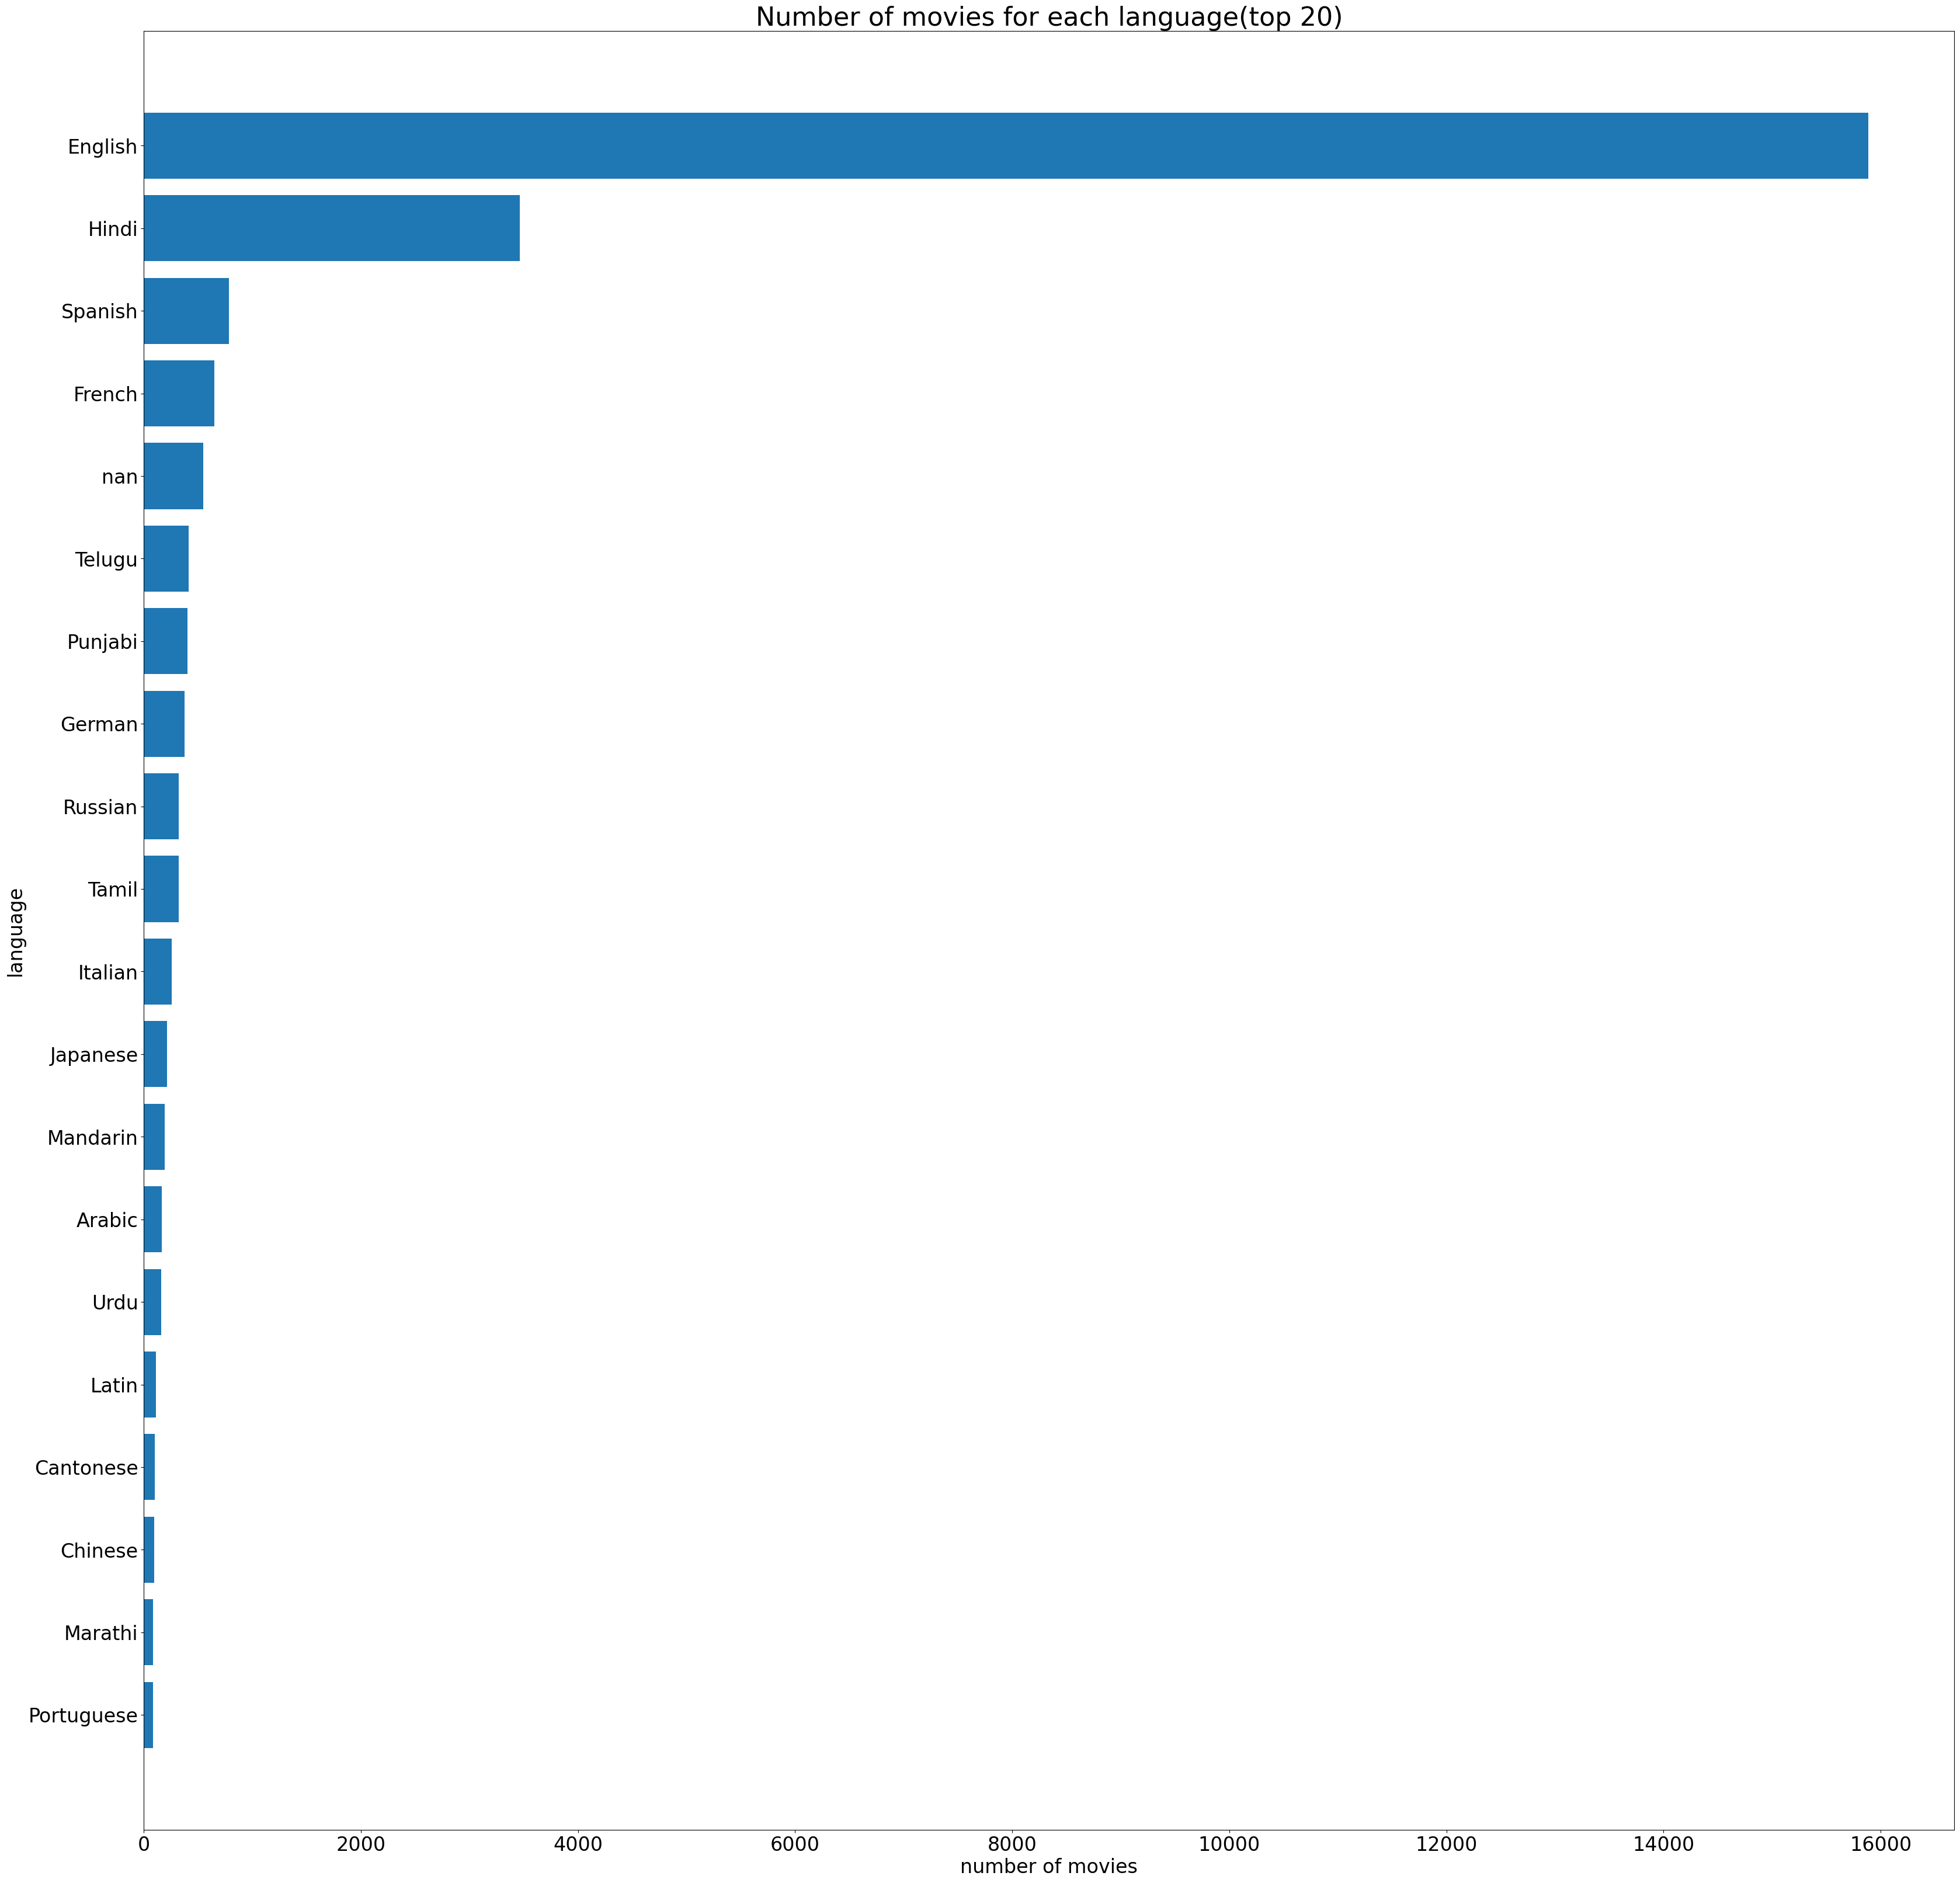

In [25]:

plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(mov_language_dict.keys())[-20:], width=list(mov_language_dict.values())[-20:])
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each language(top 20)', fontsize=32, loc='center')
plt.show()

In [26]:
mov_language_dict.keys()

dict_keys(['Bambara', 'Sumerian', 'Ojibwa', 'Chechen', 'Shoshoni', 'Nahuatl', 'Bable', 'Tonga (Tonga Islands)', 'Spanish Sign Language', 'Wolof', 'Dinka', 'Chaozhou', 'Russian Sign Language', 'Parsee', 'Visayan', 'Rhaetian', 'Turkmen', 'Middle English', 'p', 'British Sign Language', 'Igbo', 'Hokkien', 'Nama', 'Polynesian', 'Cheyenne', 'Uzbek', 'Mohawk', 'Kikuyu', 'Azerbaijani', 'Assamese', 'Abkhazian', 'Pawnee', 'Australian Sign Language', 'Konkani', 'Syriac', 'Greenlandic', 'Indian Sign Language', 'English.Hindi', 'Quenya', 'Sinhala', 'Tok Pisin', 'Sicilian', 'Slovak', 'Acholi', 'Apache languages', 'Low German', 'Kru', 'Mende', 'Algonquin', 'Akan', 'Maltese', 'Samoan', 'Cree', 'Tupi', 'Macedonian', 'Georgian', 'Amharic', 'Micmac', 'Tswana', 'Basque', 'Quechua', 'Navajo', 'Ibo', 'Nyanja', 'Sotho', 'Sioux', 'Papiamento', 'Slovenian', 'Oriya', 'Lao', 'Southern Sotho', 'Aramaic', 'Brazilian Sign Language', 'Tulu', 'Maya', 'Khmer', 'Romany', 'Awadhi', 'Kazakh', 'Kashmiri', 'Pushto', 'Burme

`industry`

In [27]:
mov_data['industry'].value_counts()

industry
Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: count, dtype: int64

`posted_date`

In [28]:
mov_data['posted_date'].value_counts()

posted_date
13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
12 Sep, 2009      1
08 Sep, 2009      1
01 Sep, 2009      1
18 Aug, 2009      1
30 Nov, 2011      1
Name: count, Length: 4123, dtype: int64

In [29]:
mov_data['posted_date'] = pd.to_datetime(mov_data['posted_date'])
mov_data['posted_date']

0       2023-02-20
1       2023-02-20
2       2021-04-20
3       2023-02-20
4       2023-02-20
           ...    
20543   1970-01-01
20544   1970-01-01
20545   1970-01-01
20546   2023-02-10
20547   2023-02-14
Name: posted_date, Length: 20548, dtype: datetime64[ns]

`release_date`

In [30]:
mov_data['release_date'] = pd.to_datetime(mov_data['release_date'])
mov_data['release_date']

0       2023-01-28
1       2023-02-05
2       2021-06-18
3       2023-02-17
4       2023-01-26
           ...    
20543   1959-03-13
20544   1955-05-13
20545   1958-03-28
20546   2023-02-09
20547   2023-02-13
Name: release_date, Length: 20548, dtype: datetime64[ns]

In [31]:
mov_data['release_date'].value_counts()

release_date
1970-01-01    962
2023-02-03    616
2023-02-17    607
2023-02-10    410
2023-02-11    402
             ... 
2003-09-05      1
2022-12-29      1
2013-08-24      1
2014-01-12      1
1958-03-28      1
Name: count, Length: 4886, dtype: int64

`run_time`

In [32]:
mov_data['run_time'].value_counts()

run_time
93          652
88          622
101         568
139         454
95          454
           ... 
74 min        1
288           1
220           1
49min         1
3h 13min      1
Name: count, Length: 415, dtype: int64

In [33]:
# pd.set_option('mode.chained_assignment', None)
# for i in range(len(mov_data['run_time'])):
#     # print(mov_data['run_time'].iloc[i])
#     if mov_data['run_time'].isna().iloc[i] == False:
#         time_list = mov_data['run_time'].astype('str').iloc[i].rstrip('min').rstrip('h').split('h ')
#         if len(time_list) == 2:
#             run_time = int(time_list[0]) * 60 + int(time_list[1])
#         elif len(time_list) == 1:
#             run_time = int(time_list[0])
        
#         mov_data['run_time'].iloc[i] = run_time

In [34]:
mov_data['run_time'].value_counts().head(30)

run_time
93          652
88          622
101         568
139         454
95          454
90          431
105         368
1h 30min    365
110         353
109         326
92          265
142         254
98          240
85          237
96          234
100         223
91          218
94          216
87          199
97          199
86          198
1h 35min    191
89          181
99          178
84          176
104         175
1h 32min    165
107         164
1h 25min    163
102         159
Name: count, dtype: int64

`director`

In [35]:
mov_data['director'].value_counts()

director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suman Mukhopadhyay                              1
Shea Sizemore                                   1
Name: count, Length: 9672, dtype: int64

`writer`

In [36]:
mov_data['writer'].value_counts()

writer
Nicholas Schutt                           403
Venky Atluri                              402
Haley Harris                              402
John Swab                                 205
Elegance Bratton                          202
                                         ... 
Barbara Samuels, Joseph Boyden              1
Maria Allred                                1
Pia Mechler                                 1
Paul Flannery, David Ryan Keith             1
Khwaja Ahmad Abbas, Khwaja Ahmad Abbas      1
Name: count, Length: 13603, dtype: int64

## 数值属性 Numeric Attributes
给出5数概括及缺失值的个数

`views`: no. of clicks per movie

`downloads`: no. of downloads per movie

`IMDb-rating`: rating

In [37]:
numeric_mov_data = pd.DataFrame(mov_data, columns=['views', 'downloads', 'IMDb-rating'])
numeric_mov_data.head()

views  downloads  IMDb-rating
0   2794.0      304.0          4.8
1   1002.0       73.0          6.4
2  14419.0     1427.0          5.2
3   4878.0     1549.0          8.1
4   2438.0      657.0          4.6

In [38]:
mov_data['views'].describe()

count    2.054700e+04
mean     3.559551e+04
std      6.247242e+04
min      6.670000e+02
25%      7.571500e+03
50%      1.522200e+04
75%      3.657100e+04
max      1.638533e+06
Name: views, dtype: float64

In [39]:
mov_data['downloads'].describe()

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64

In [40]:
mov_data['IMDb-rating'].describe()

count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

# 2.数据可视化

## 直方图
barh,hist

In [41]:
# 定义画图函数
def draw_barh(attribute_name,size=0):
    attribute_count = pd.DataFrame(mov_data[attribute_name].value_counts()).sort_values(by='count', ascending=True)
    plt.figure(figsize=(40, 40))
    if size == 0:
        plt.barh(attribute_count.index, width=attribute_count['count'])
    else :
        plt.barh(attribute_count.tail(size).index, width=attribute_count['count'].tail(size))
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    plt.ylabel(attribute_name, fontsize=24)
    plt.xlabel('number of movies', fontsize=24)
    plt.title('Number of movies for each {}'.format(attribute_name), fontsize=32, loc='center')
    plt.show()

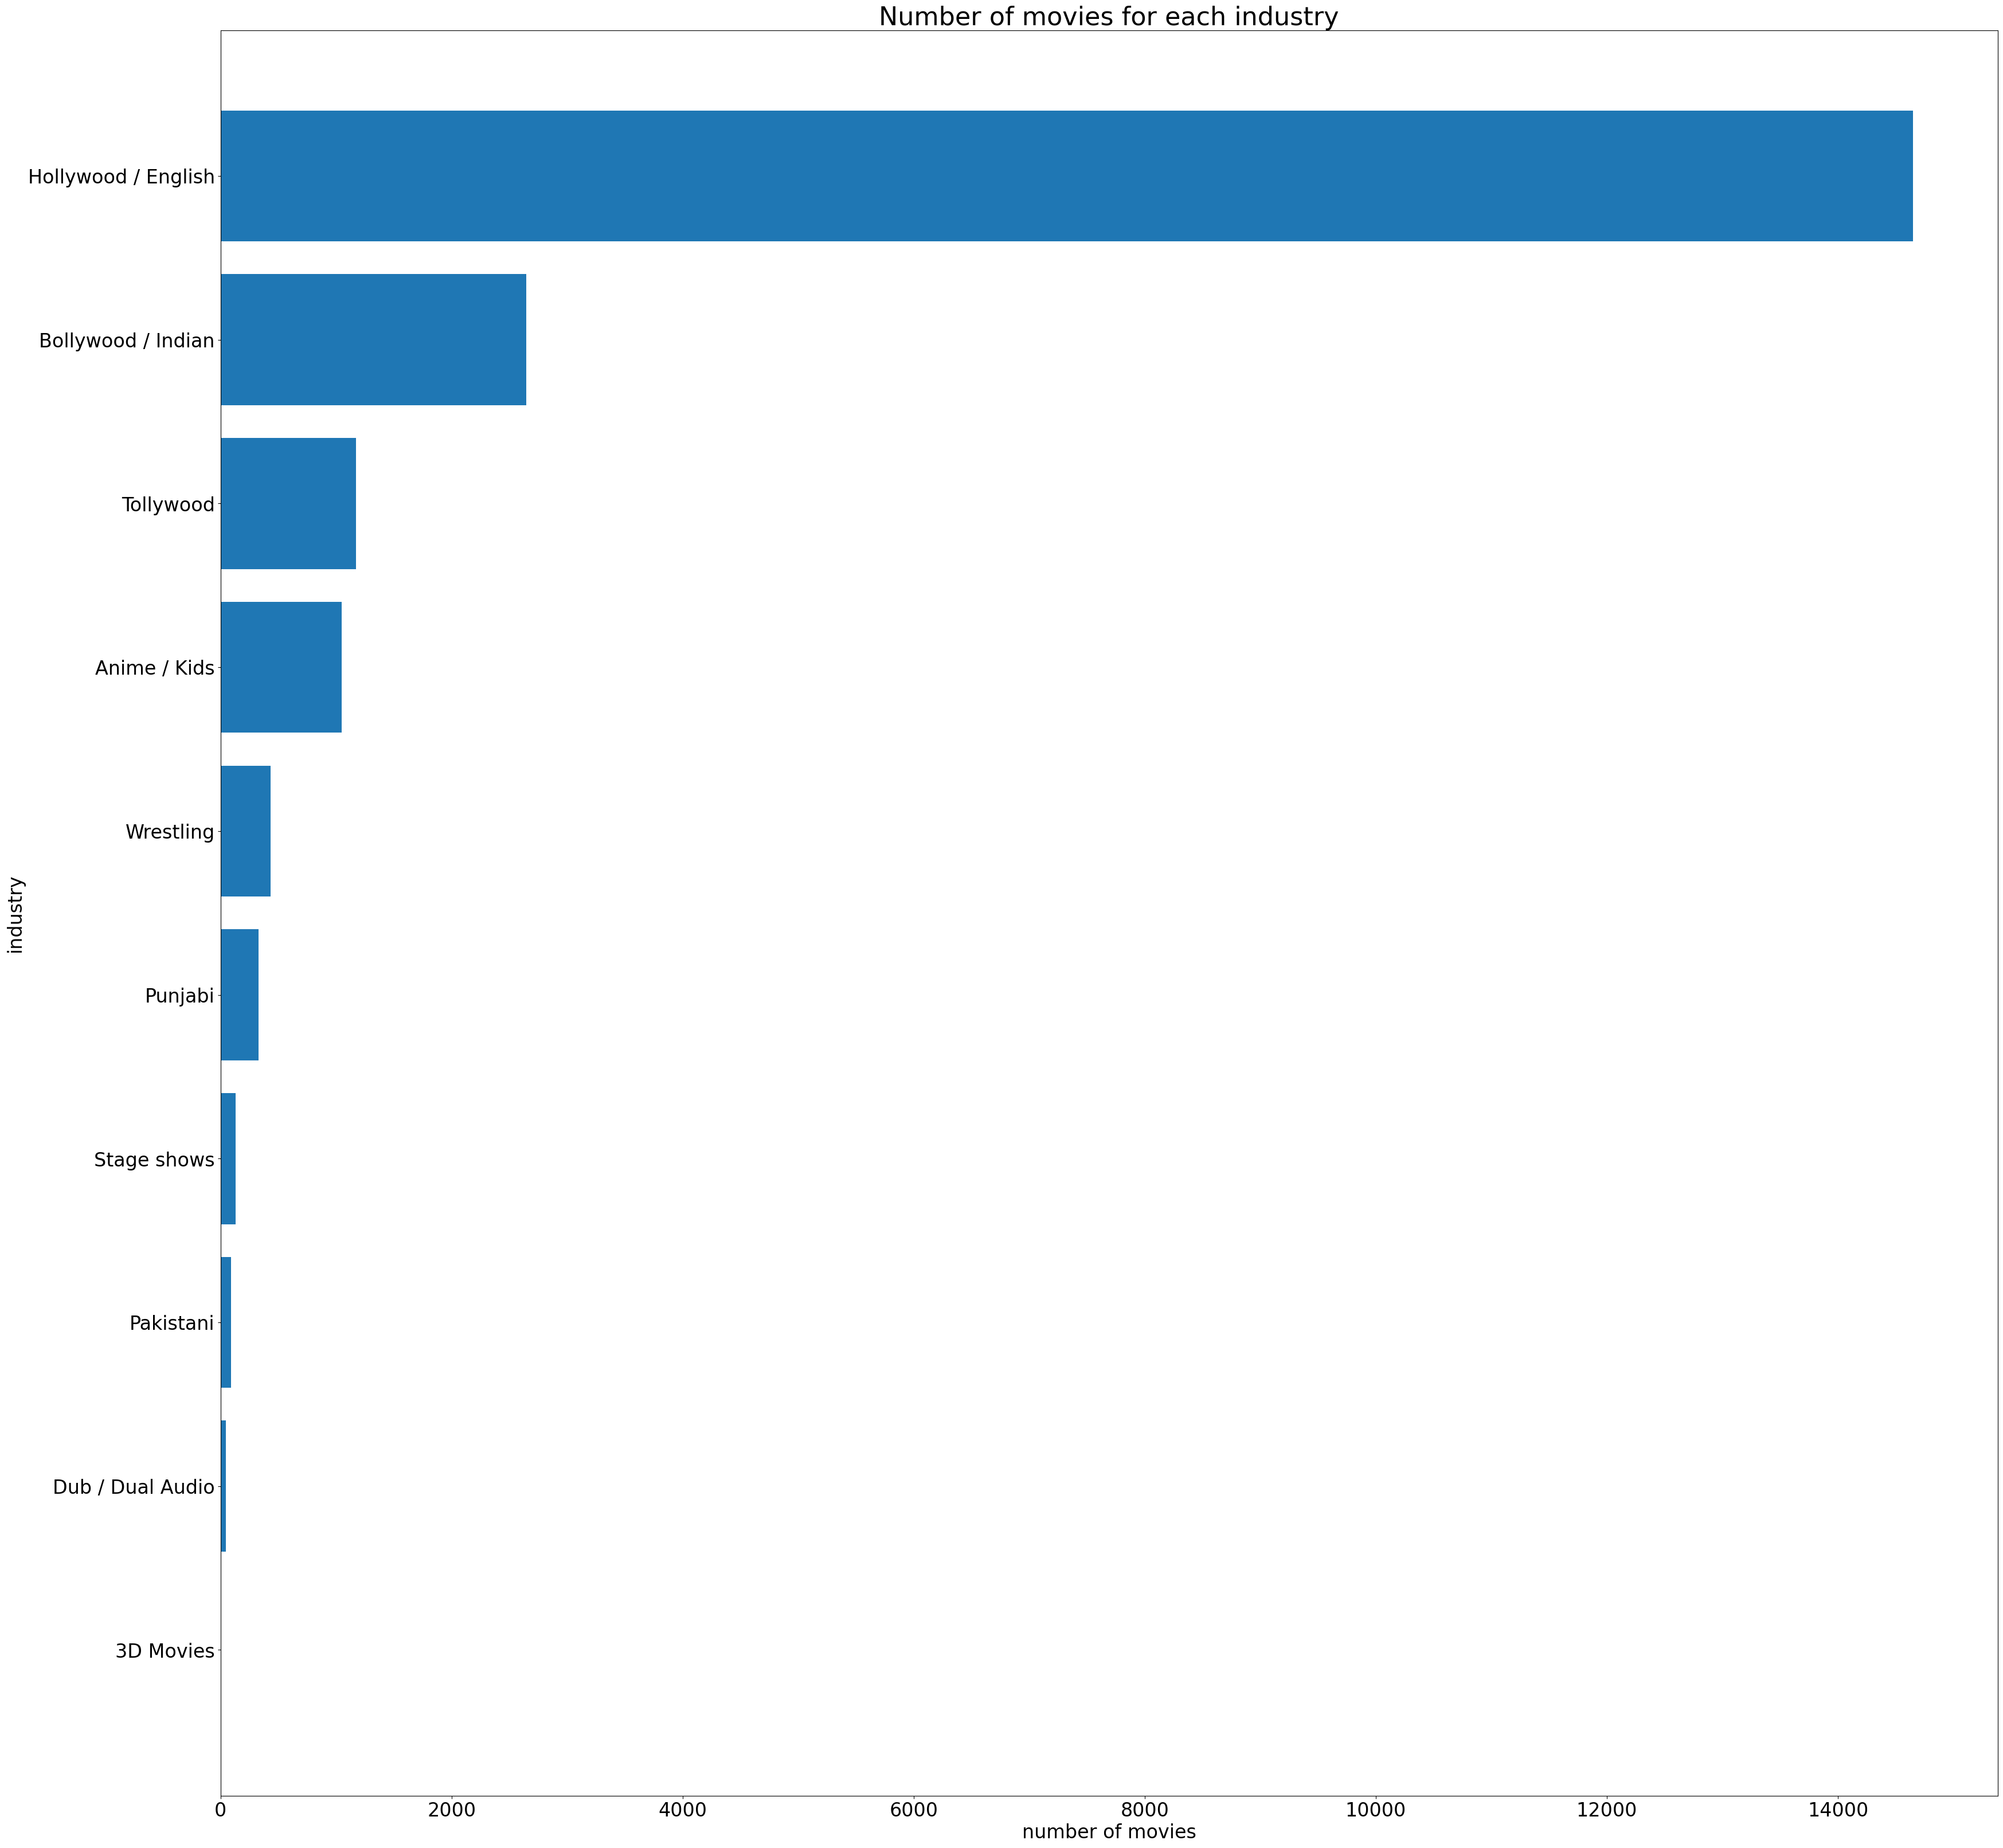

In [42]:
draw_barh('industry')

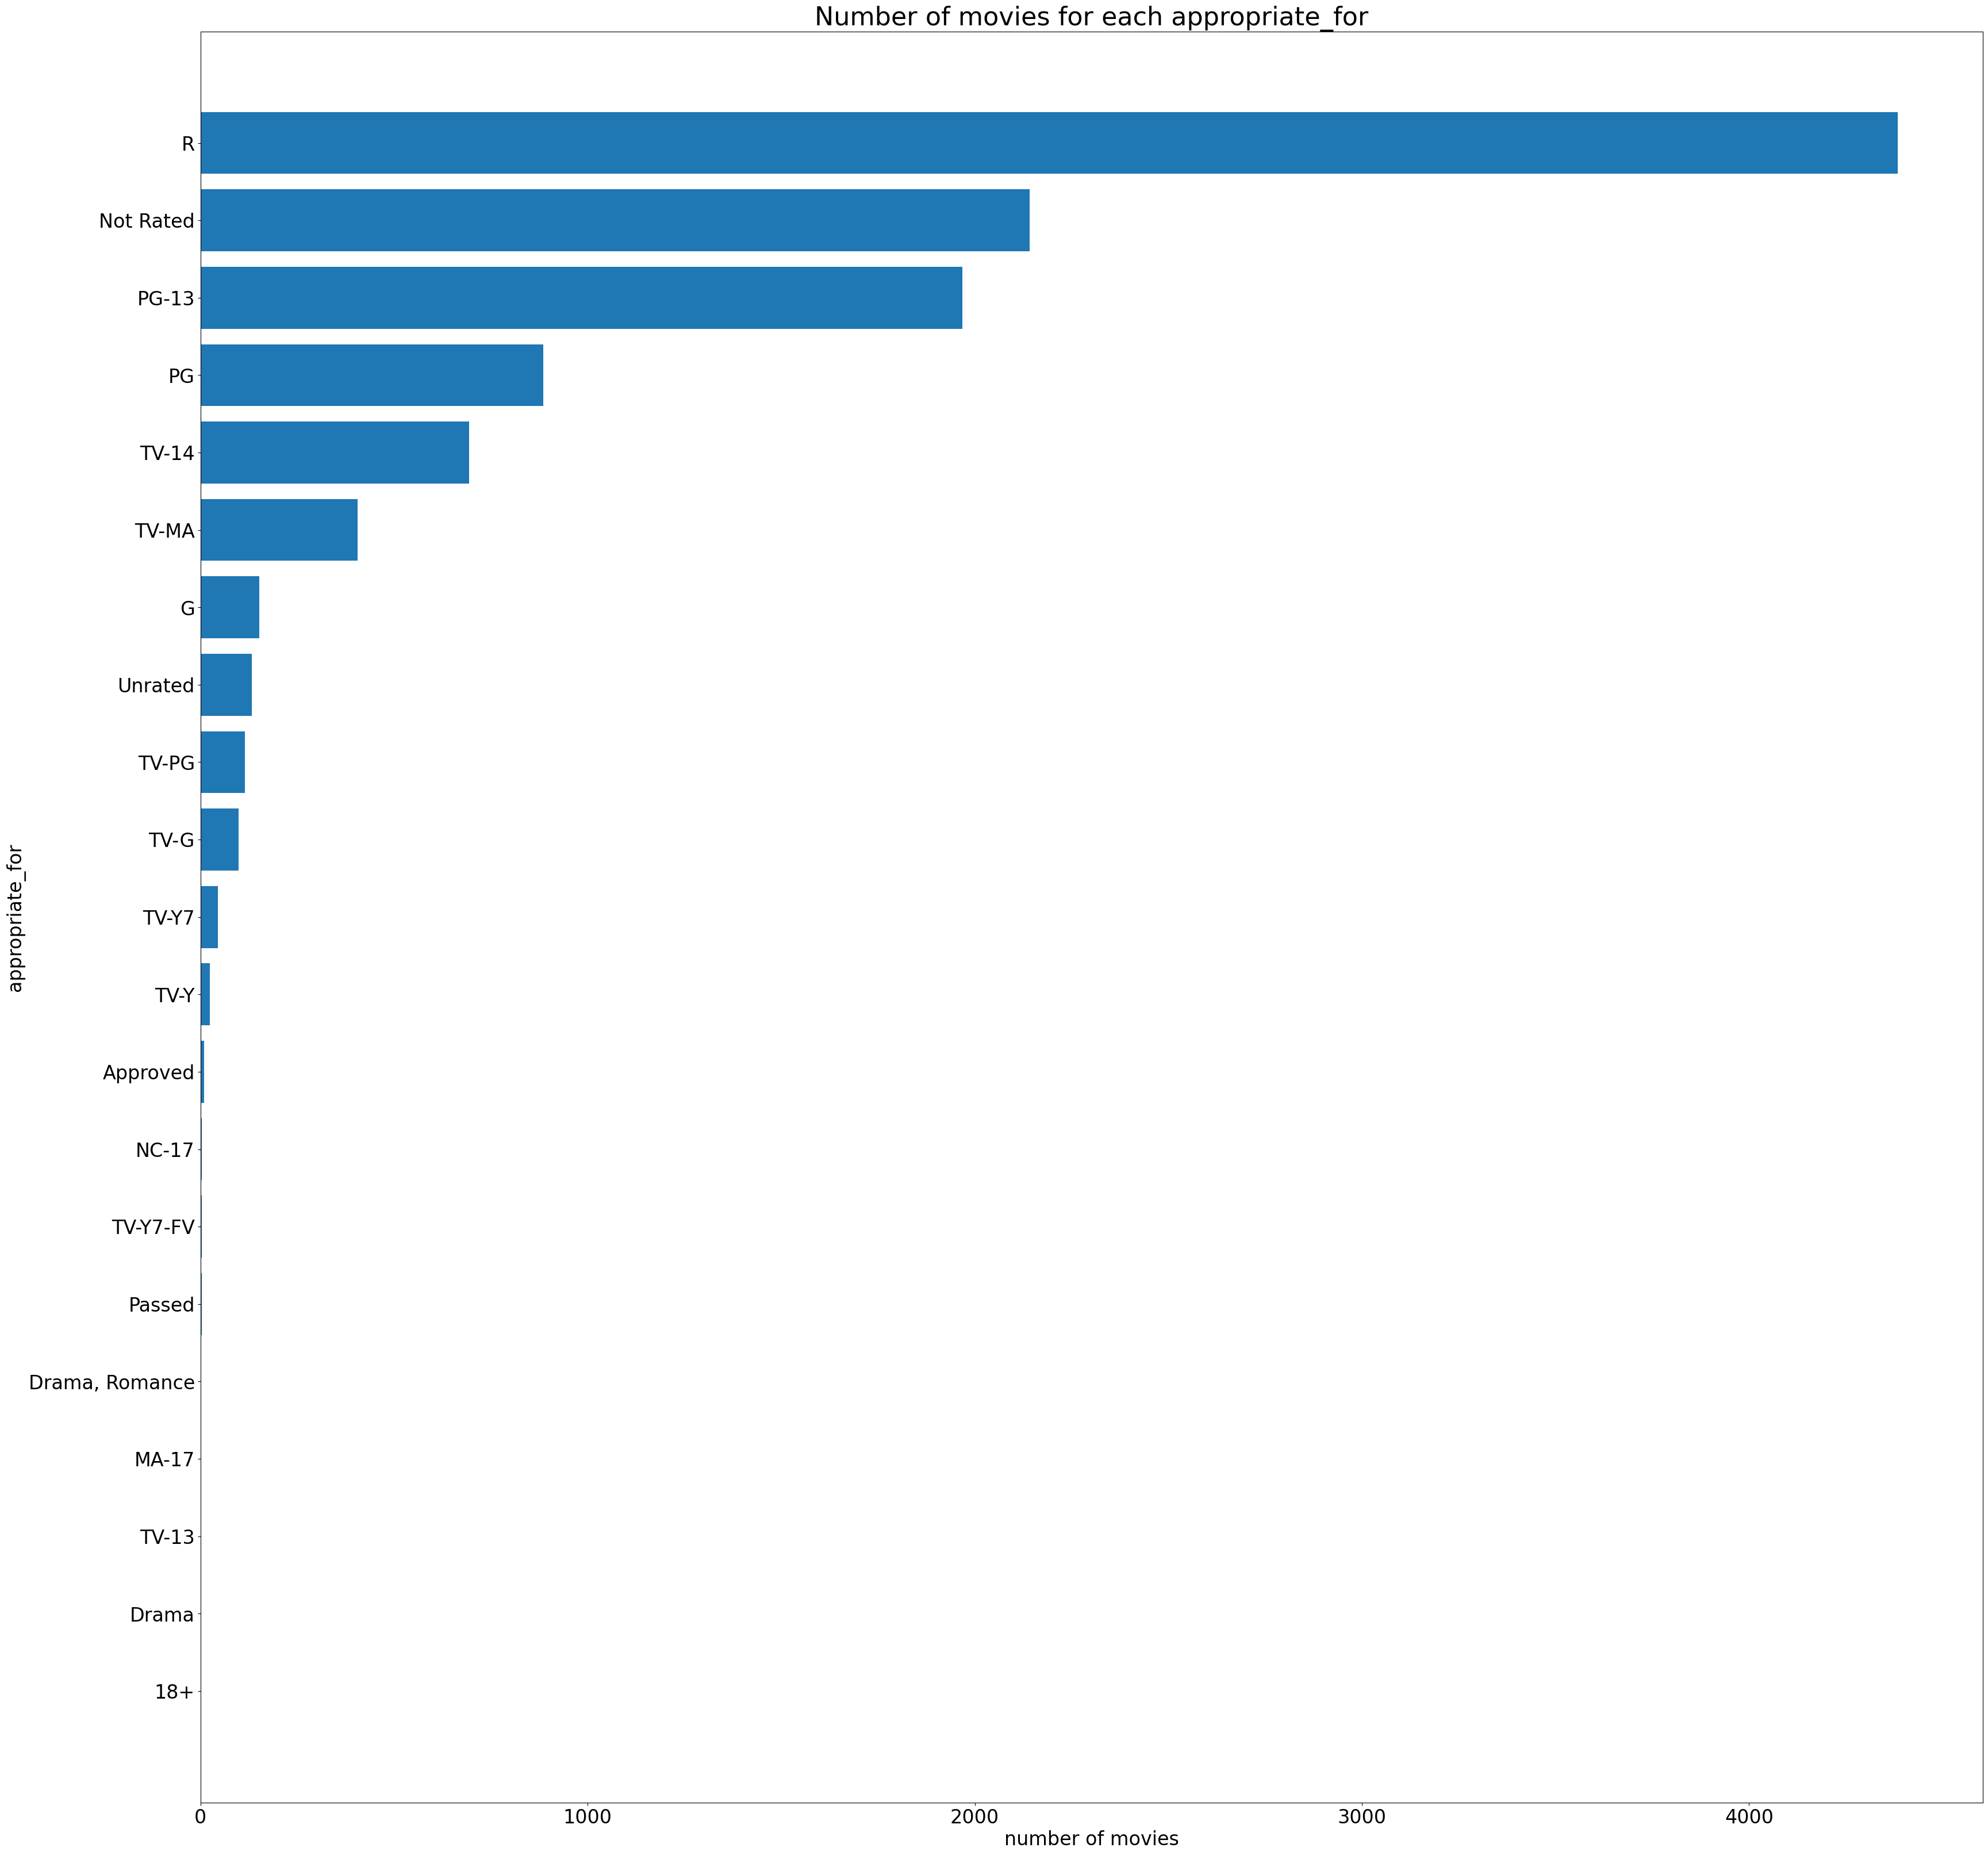

In [43]:
draw_barh('appropriate_for')

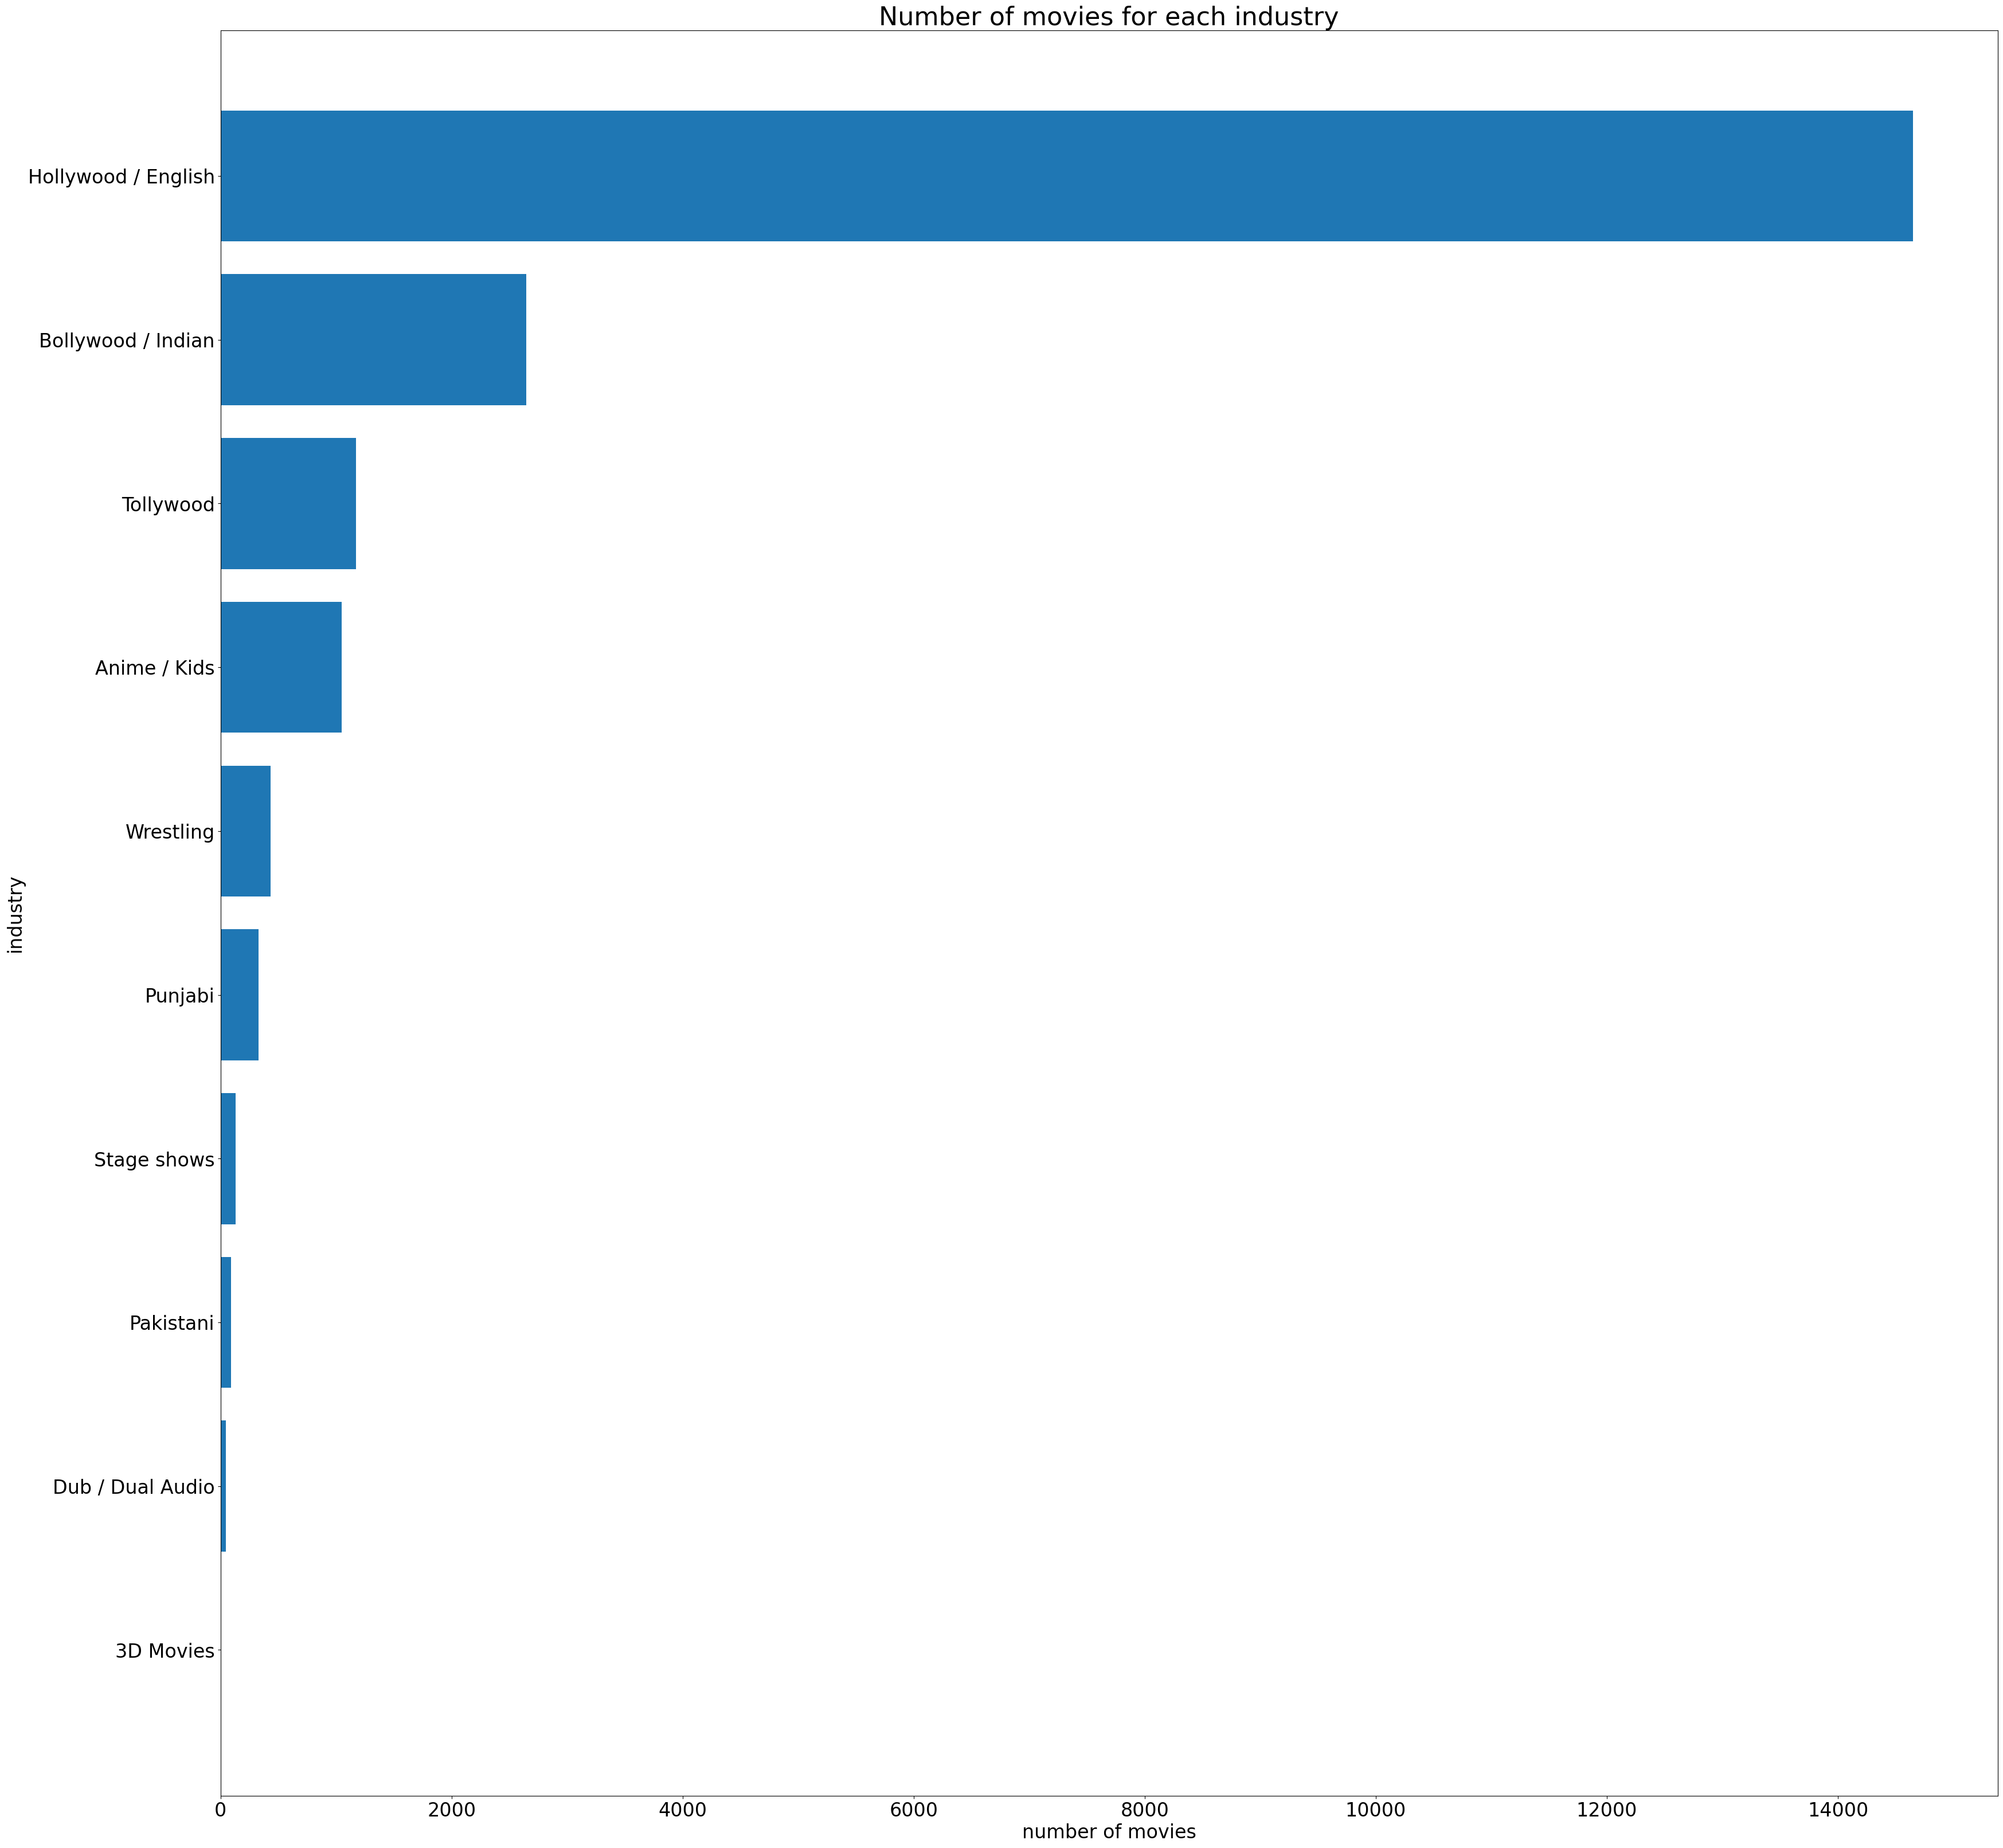

In [44]:
draw_barh('industry')

In [45]:
# 构建画图函数
def draw_hist(attribute_name):
    plt.figure(figsize=(40, 40))
    plt.hist(mov_data[attribute_name], bins=40, edgecolor='white')
    plt.title('Date of posted: distribution')
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    plt.ylabel('amount of movies', fontsize=24)
    plt.xlabel('posted date', fontsize=24)
    plt.show()

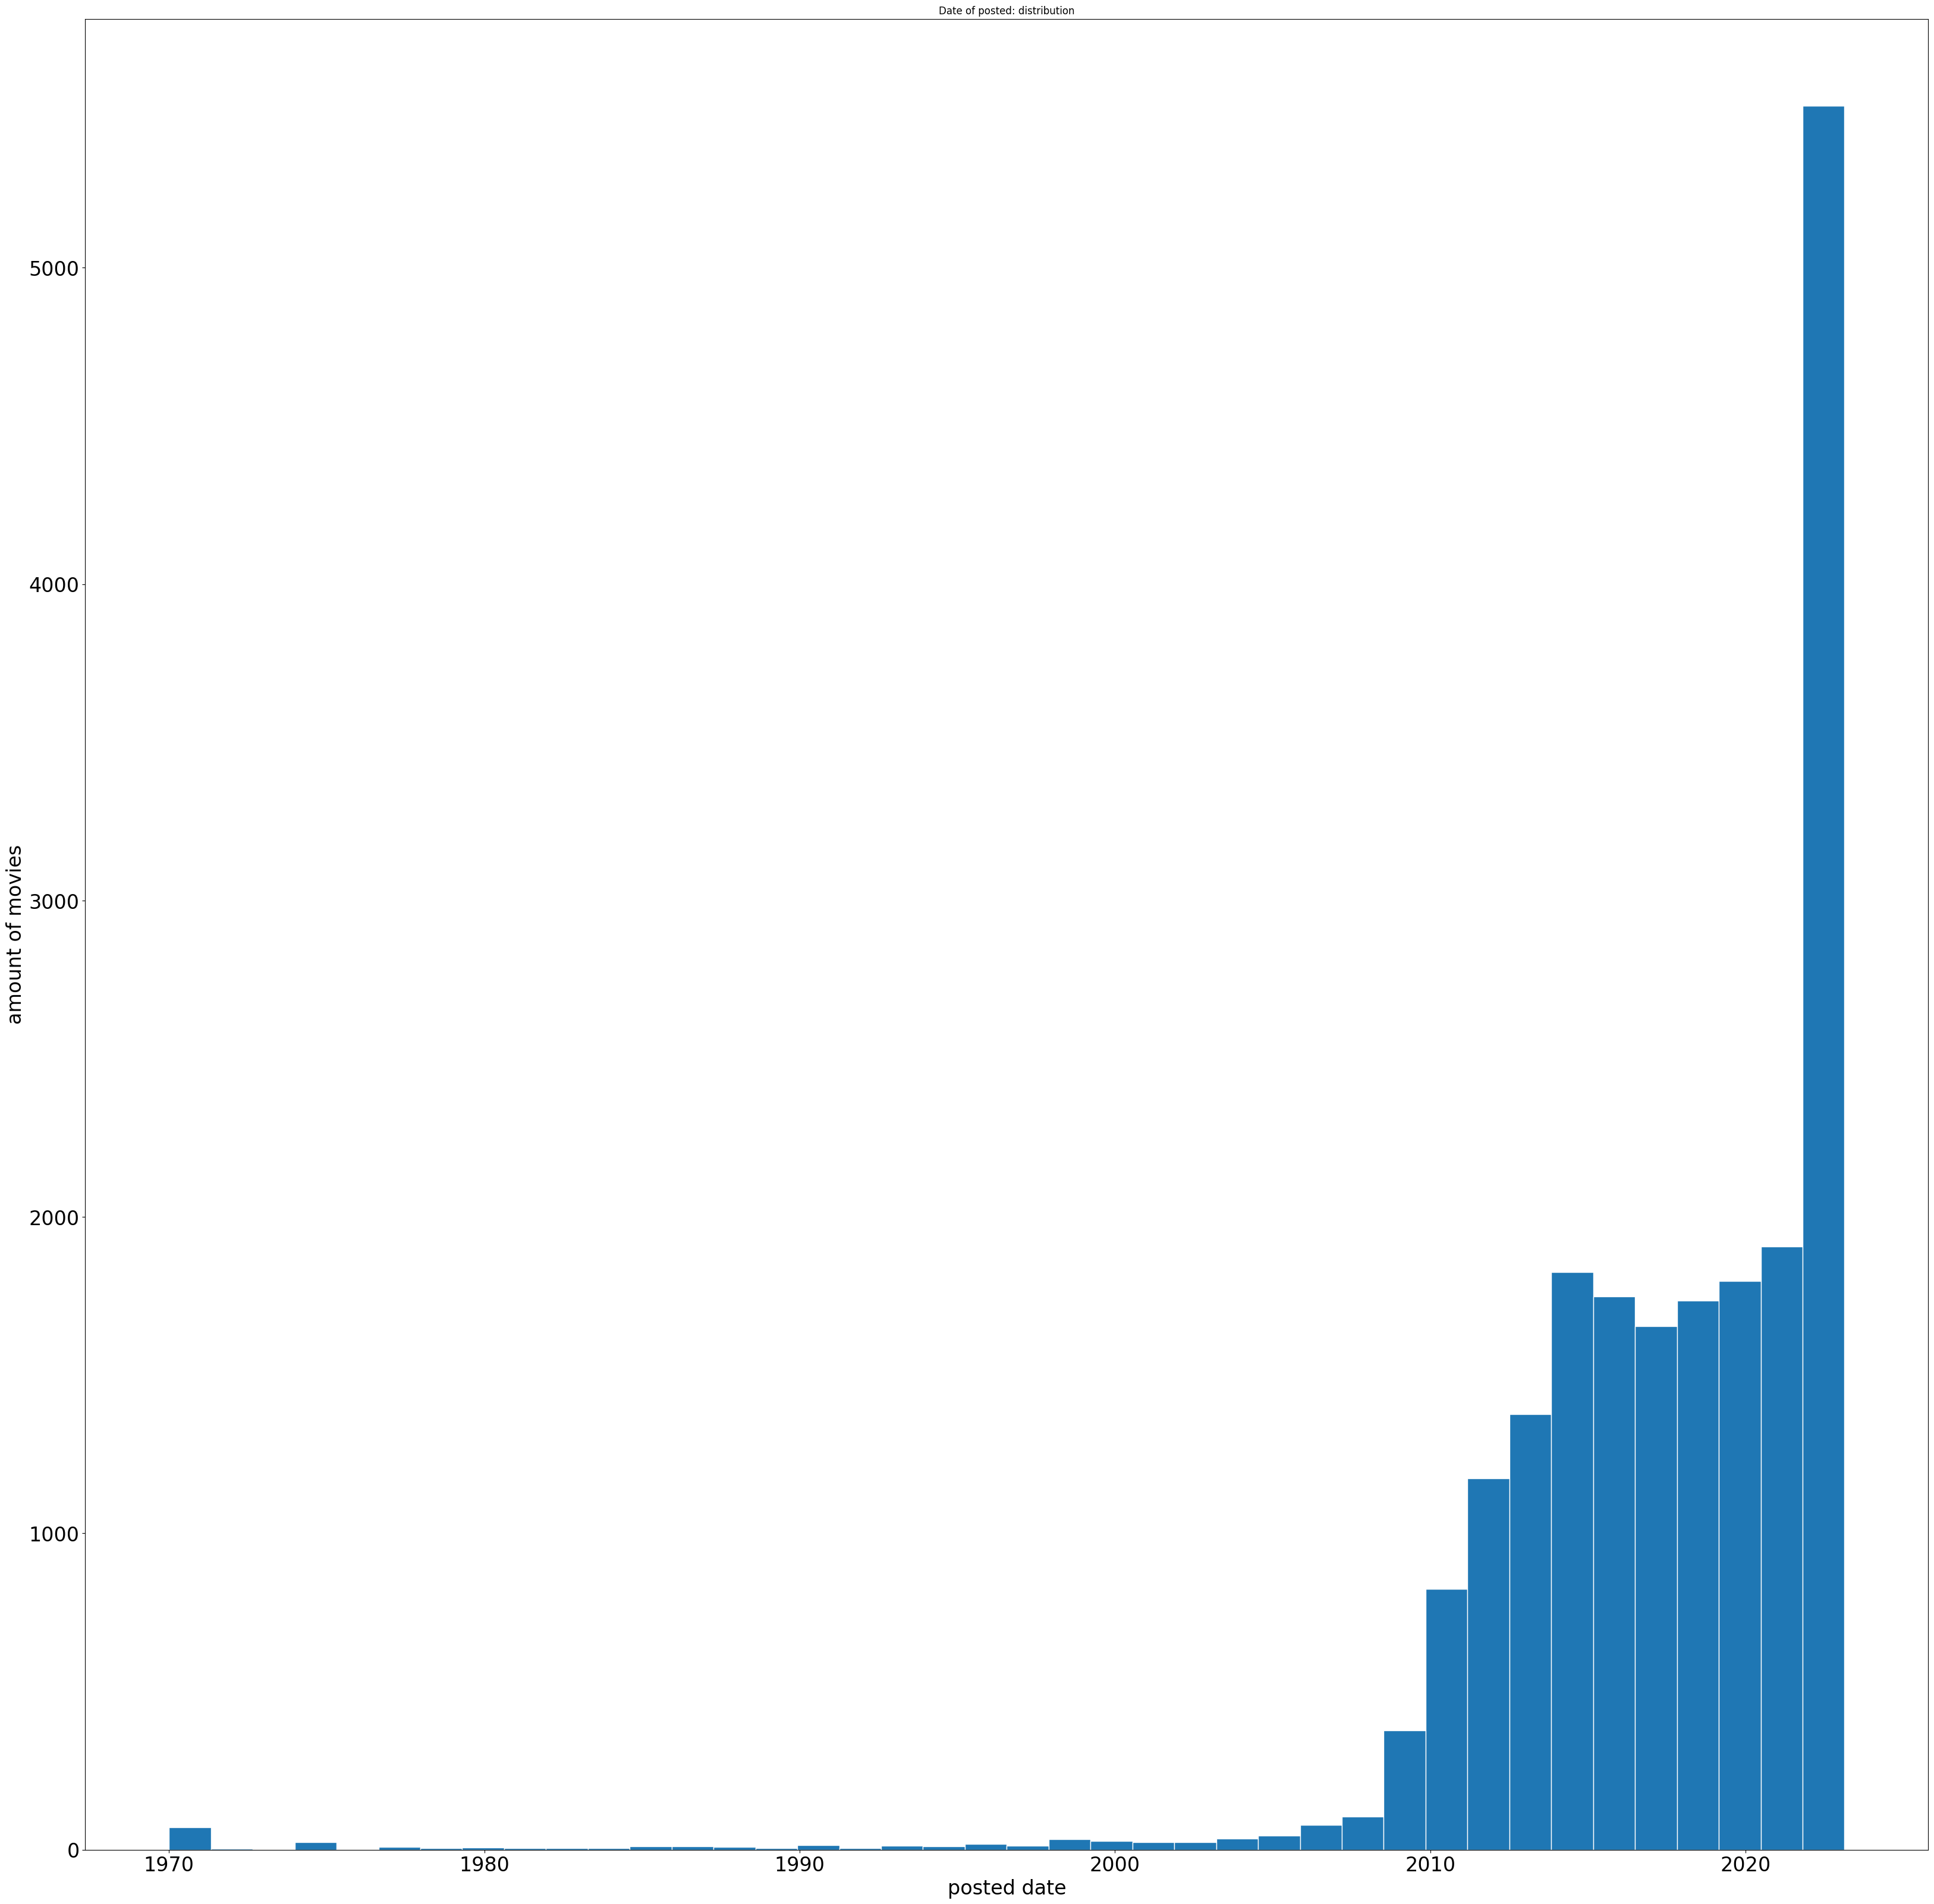

In [46]:
draw_hist('posted_date')

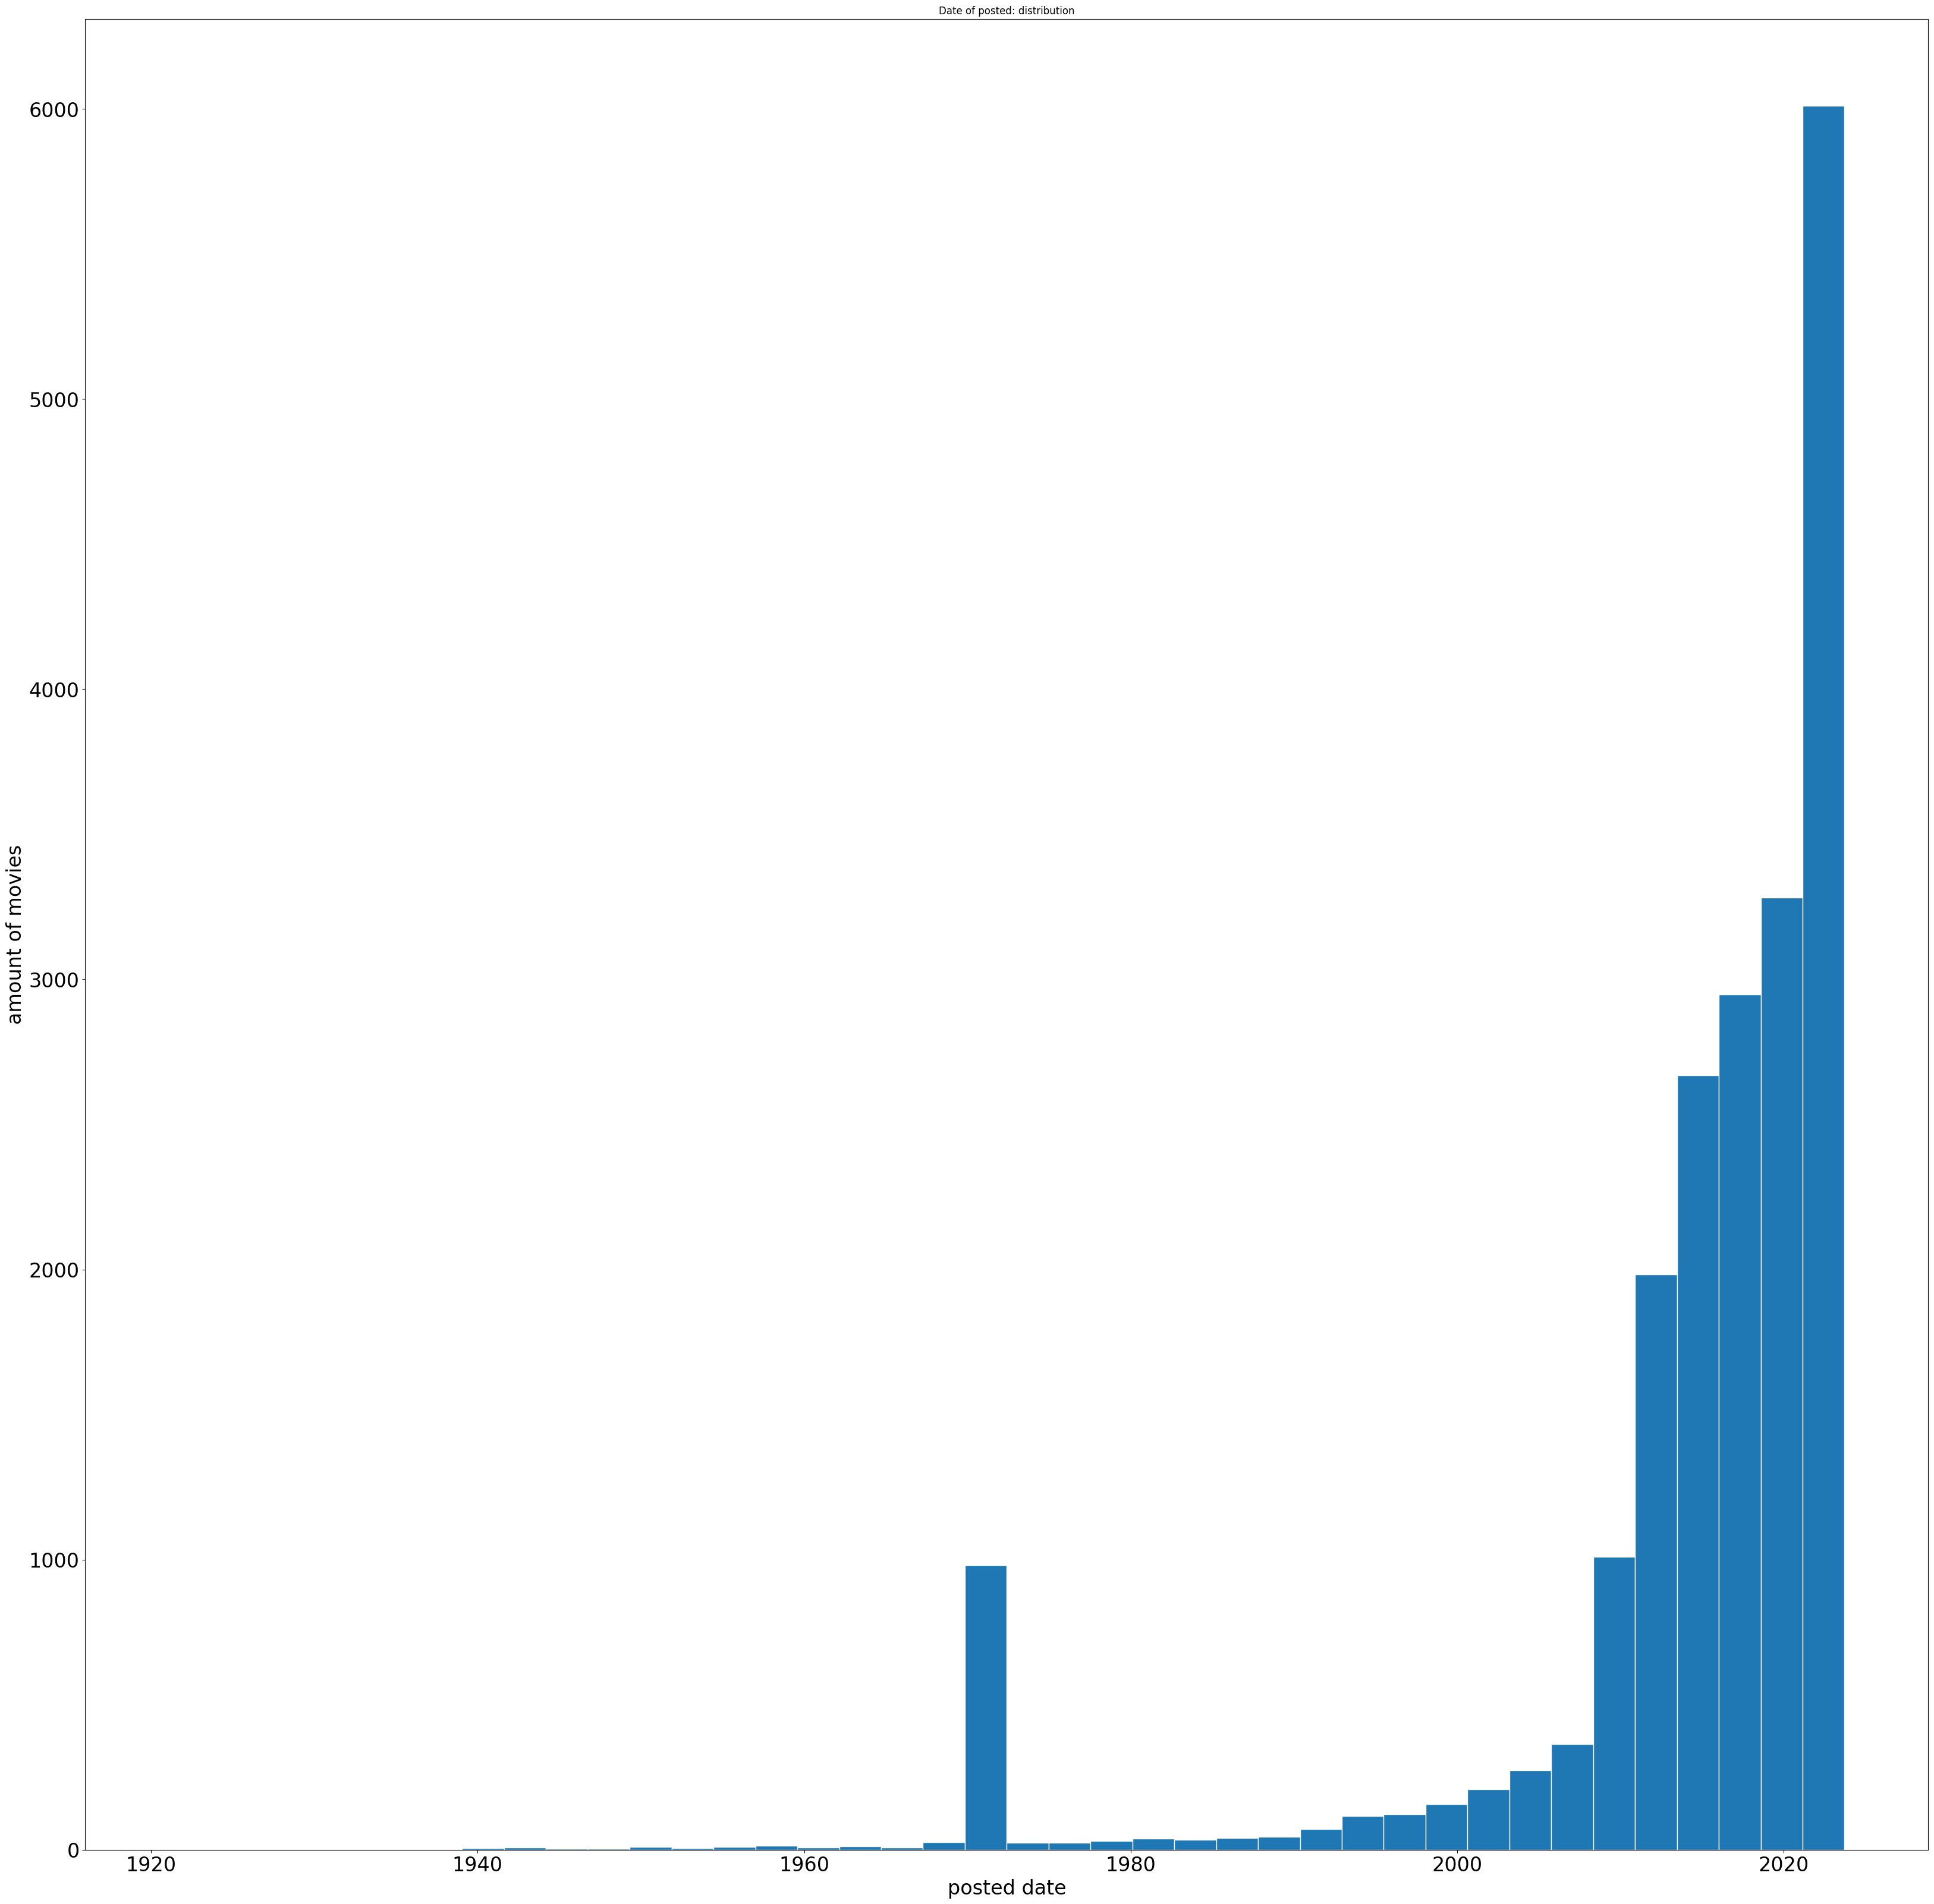

In [47]:
draw_hist('release_date')

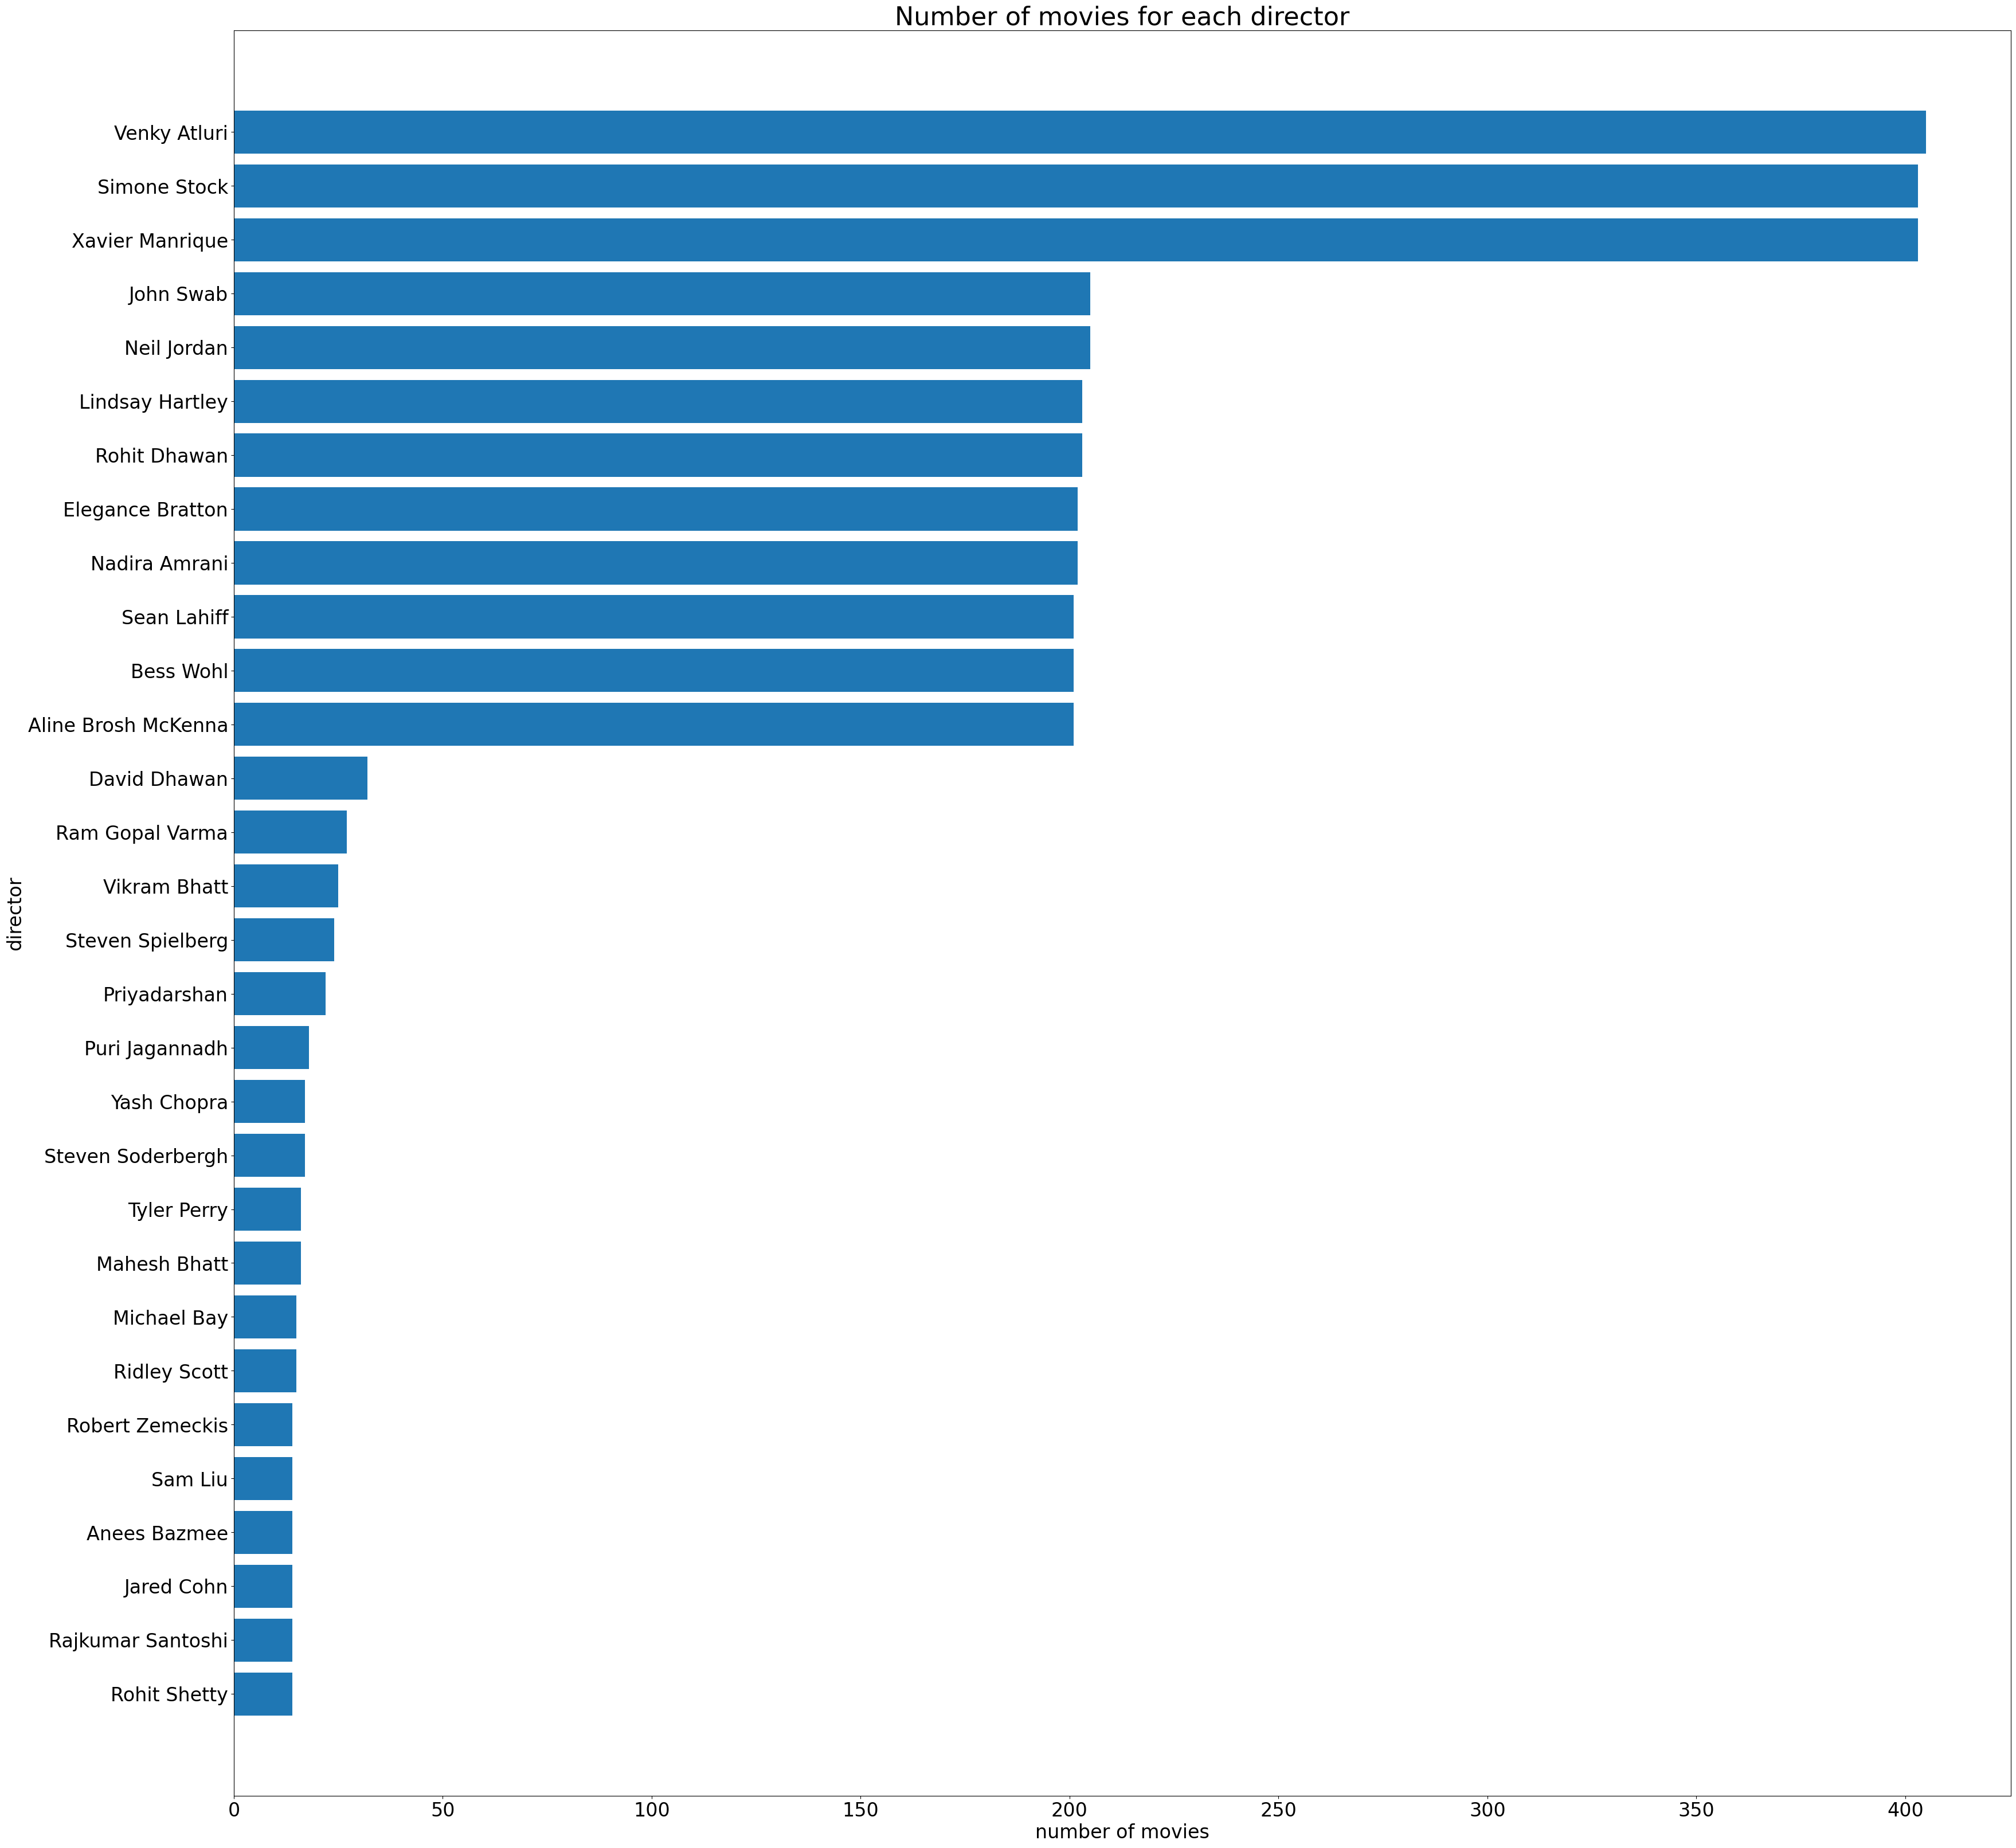

In [48]:
draw_barh('director',30)

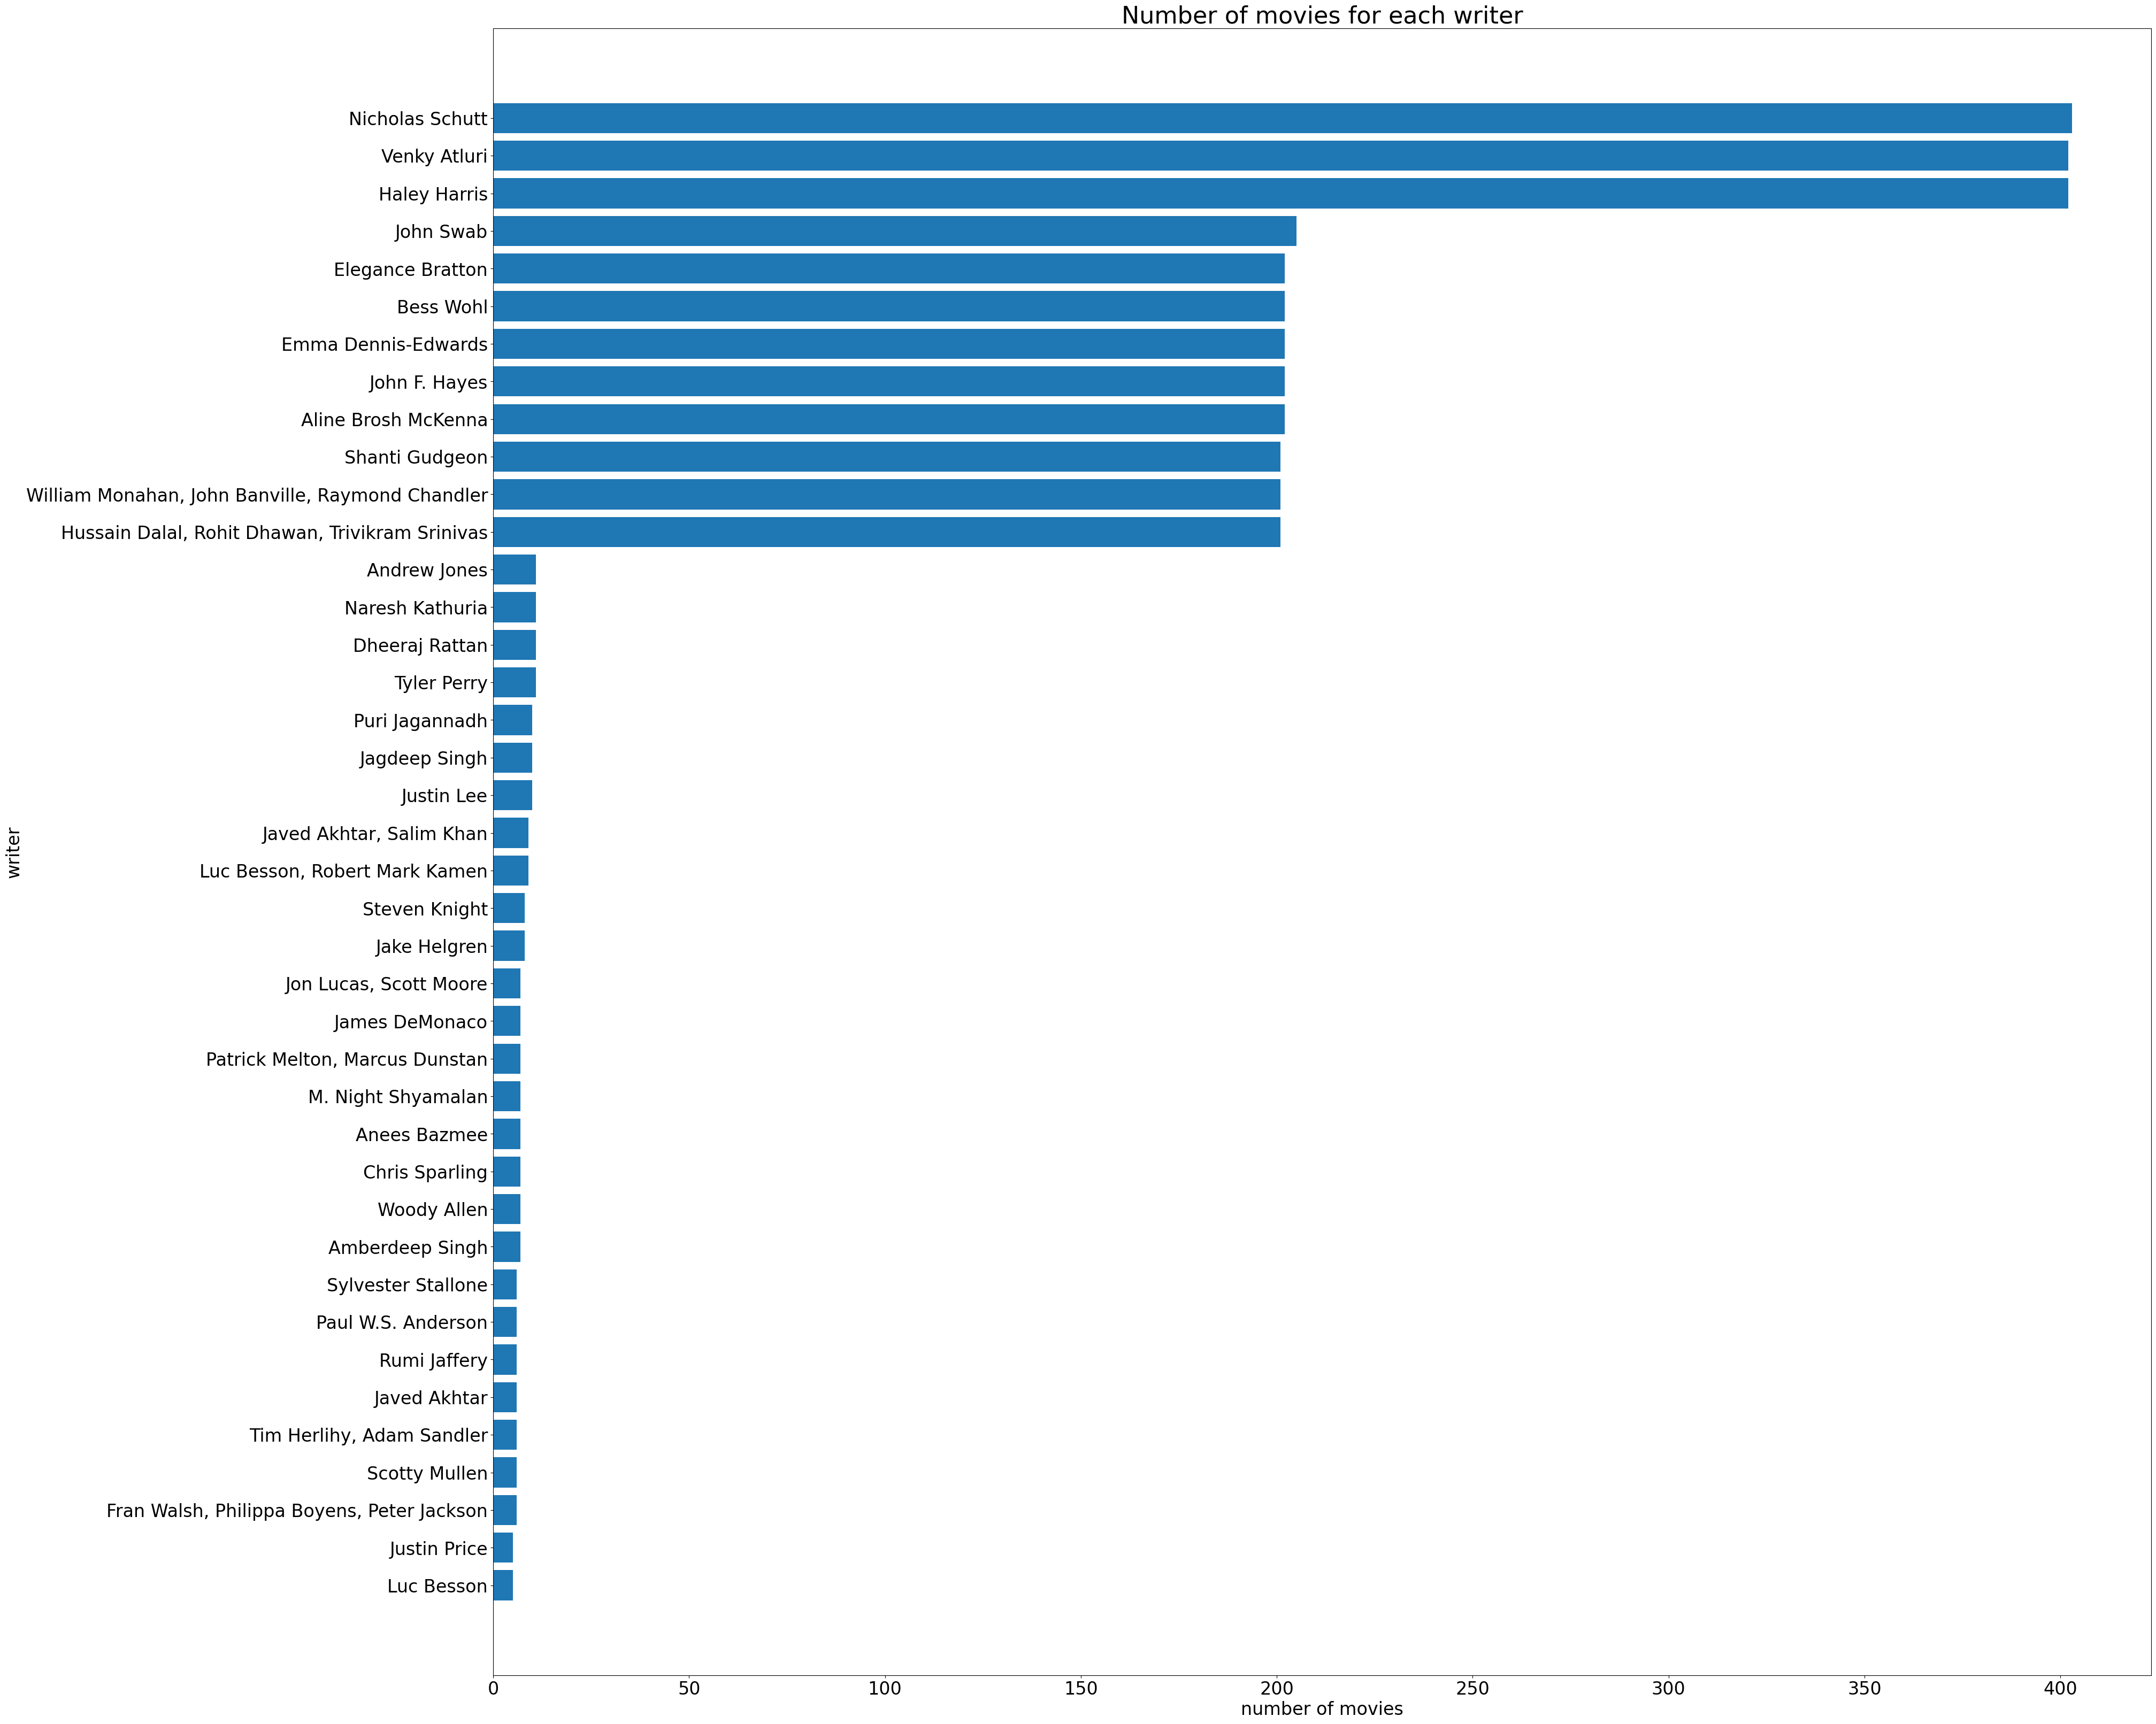

In [49]:
draw_barh('writer',40)

## 盒图

In [50]:
 def draw_box(attribute_name,x_label='counts',showFliers=True,data_draw=mov_data):
    sns.set_style("whitegrid")
    # operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
    sns.boxplot(x=attribute_name,data=data_draw,showfliers=showFliers)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=6)
    plt.ylabel(attribute_name, fontsize=20)
    plt.xlabel(x_label, fontsize=20)
    plt.show()

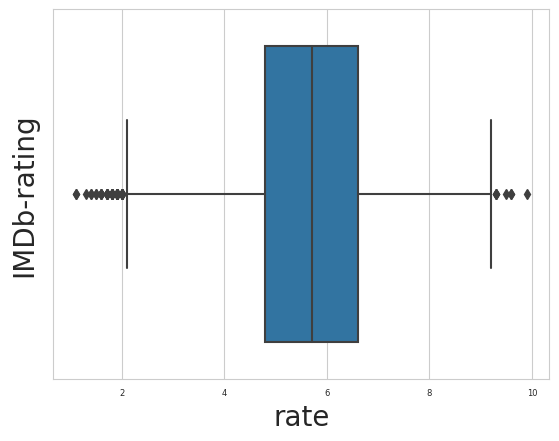

In [51]:
draw_box('IMDb-rating',x_label='rate')

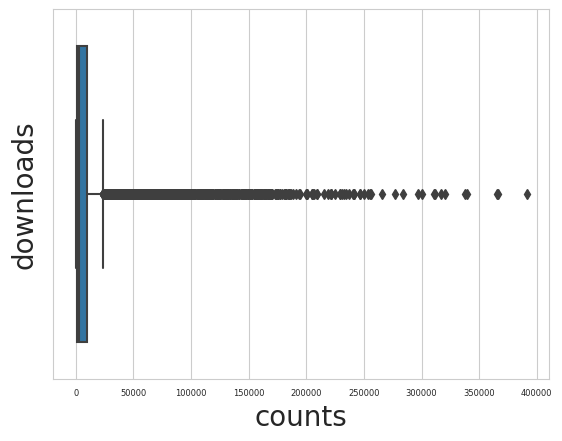

In [52]:
draw_box('downloads',showFliers=True)

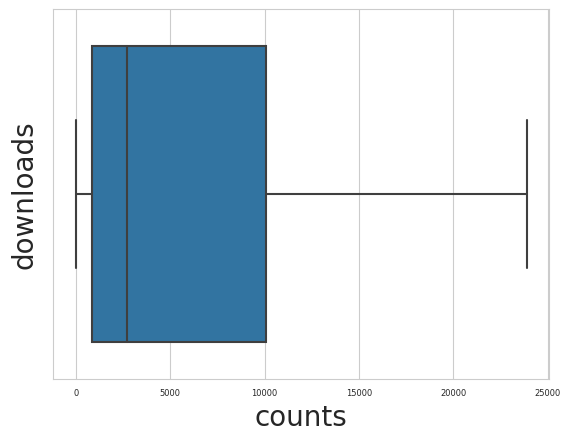

In [53]:
draw_box('downloads',showFliers=False)

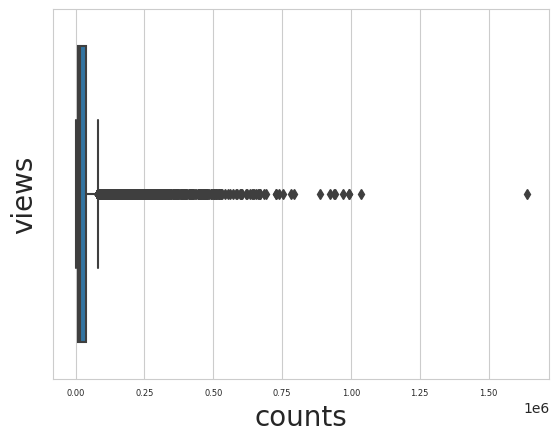

In [54]:
draw_box('views')

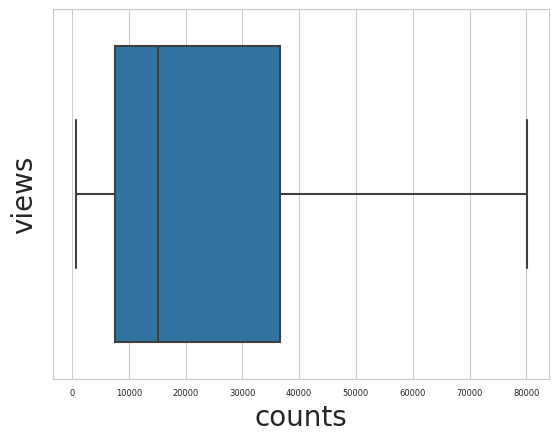

In [55]:
draw_box('views',showFliers=False)

# 3.数据缺失值处理

## 缺失值分析

In [56]:
dtype_uni_miss(mov_data)

dtype  \
IMDb-rating             float64   
appropriate_for          object   
director                 object   
downloads               float64   
id                       object   
industry                 object   
language                 object   
posted_date      datetime64[ns]   
release_date     datetime64[ns]   
run_time                 object   
storyline                object   
title                    object   
views                   float64   
writer                   object   

                                                               eg.  \
IMDb-rating                                                    4.8   
appropriate_for                                                  R   
director                                                 John Swab   
downloads                                                    304.0   
id                                                          372092   
industry                                       Hollywood / English   
language                                                   English   
posted_date                                    2023-02-20 00:00:00   
release_date                                   2023-01-28 00:00:00   
run_time                                                       105   
storyline        Doc\r\n facilitates a fragile truce between th...   
title                                                 Little Dixie   
views                                                       2794.0   
writer                                                   John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

In [57]:
cols, nulls = [], []

for col in mov_data:
    cols.append(col)
    null = mov_data[col].isna().sum()
    nulls.append(null)
    
df = pd.DataFrame(nulls, index=cols, columns=['num_null']).T
df

IMDb-rating  appropriate_for  director  downloads  id  industry  \
num_null          841             9476      1938          1   0         1   

          language  posted_date  release_date  run_time  storyline  title  \
num_null       546            1             1      1768       1701      1   

          views  writer  
num_null      1    2192

## 删除缺失值

In [58]:
from numpy import nan as NA

In [59]:
mov_data_cleaned = mov_data.dropna()
mov_data_cleaned

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      304.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
7              6.5               R             Benjamin Caron     1781.0   
8              6.9           PG-13                Ravi Kapoor      458.0   
...            ...             ...                        ...        ...   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20525          7.0               G               Guy Hamilton     2544.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20537          7.1       Not Rated                  Biren Nag     1932.0   
20540          7.0               G               Guy Hamilton     2544.0   

           id             industry                      language posted_date  \
0      372092  Hollywood / English                       English  2023-02-20   
1      372091  Hollywood / English                       English  2023-02-20   
2      343381  Hollywood / English                 English,Hindi  2021-04-20   
7      371751  Hollywood / English                       English  2023-02-13   
8      372042  Hollywood / English                       English  2023-02-18   
...       ...                  ...                           ...         ...   
20522   23825   Bollywood / Indian                         Hindi  1970-01-01   
20525   25548  Hollywood / English  English,German,Polish,French  1970-01-01   
20533    1173  Hollywood / English        Spanish,German,English  2016-05-26   
20537   23825   Bollywood / Indian                         Hindi  1970-01-01   
20540   25548  Hollywood / English  English,German,Polish,French  1970-01-01   

      release_date  run_time  \
0       2023-01-28       105   
1       2023-02-05        84   
2       2021-06-18  1h 47min   
7       2023-02-17       116   
8       2022-12-02        80   
...            ...       ...   
20522   1962-05-11       158   
20525   1969-09-17       132   
20533   1970-01-01        90   
20537   1962-05-11       158   
20540   1969-09-17       132   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
7      Motivations are suspect, and expectations are ...   
8      An\r\n unmotivated South Asian American rapper...   
...                                                  ...   
20522  After a lusty Thakur rapes a young girl, she k...   
20525  Historical reenactment of the air war in the e...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20537  After a lusty Thakur rapes a young girl, she k...   
20540  Historical reenactment of the air war in the e...   

                                            title    views  \
0                                    Little Dixie   2794.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
7                                         Sharper  18225.0   
8                                    Four Samosas   6912.0   
...                                           ...      ...   
20522                              Bees Saal Baad   6076.0   
20525                           Battle of Britain   9319.0   
20533                        Love at First Hiccup  36022.0   
20537                              Bees Saal Baad   6077.0   
20540                           Battle of Britain   9320.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
7                      Brian Gatewood, Alessan

appropriate_for

In [60]:
# def draw_comparison(attribute_name):
#     attribute_count = pd.DataFrame(mov_data[attribute_name].value_counts()).sort_values(by='count', ascending=True)
    
#     attribute_count_cleaned = attribute_count
#     attribute_count_cleaned['count_cleaned'] = [0] * len(attribute_count)
    
#     for level in list(attribute_count.index):
#         if level in list(mov_data_cleaned[attribute_name].value_counts().index):
#             attribute_count_cleaned.loc[[level], ['count_cleaned']] = mov_data_cleaned[attribute_name].value_counts().loc[[level]].values[0]
    
#     plt.figure(figsize=(40, 40))
#     plt.yticks(fontsize=24)
#     plt.xticks(fontsize=24)
#     plt.barh(attribute_count_cleaned.index, width=attribute_count_cleaned['count'], label='attribute_count')
#     plt.barh(attribute_count_cleaned.index, width=attribute_count_cleaned['count_cleaned'], label='attribute_count_cleaned')
#     plt.ylabel(attribute_name, fontsize=24)
#     plt.xlabel('number of movies', fontsize=24)
#     plt.title('Number of movies for each attribute', fontsize=32, loc='center')
#     plt.legend(fontsize=32, loc='lower right')
#     plt.show()

In [93]:
def draw_comparison(attribute_name, data_1=mov_data, data_2=mov_data_cleaned, top_n=None):
    """
    绘制属性对比图

    Args:
        attribute_name (str): 属性名称
        top_n (int, optional): 要展示的前n个属性。默认为None，表示展示所有属性。

    Returns:
        None
    """
    attribute_count = pd.DataFrame(data_1[attribute_name].value_counts()).sort_values(by='count', ascending=True)
    
    if top_n is not None:
#         attribute_count_cleaned = attribute_count_cleaned.iloc[-top_n:]
        attribute_count = attribute_count.iloc[-top_n:]
    
    attribute_count_cleaned = attribute_count
    attribute_count_cleaned['count_cleaned'] = [0] * len(attribute_count)
     
    
        
    for level in list(attribute_count.index):
        if level in list(data_2[attribute_name].value_counts().index):
            attribute_count_cleaned.loc[[level], ['count_cleaned']] = data_2[attribute_name].value_counts().loc[[level]].values[0]
   
    
    plt.figure(figsize=(40, 40))
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    plt.barh(attribute_count_cleaned.index, width=attribute_count_cleaned['count'], label='attribute_count')
    plt.barh(attribute_count_cleaned.index, width=attribute_count_cleaned['count_cleaned'], label='attribute_count_cleaned')
    plt.ylabel(attribute_name, fontsize=24)
    plt.xlabel('number of movies', fontsize=24)
    plt.title(f'Number of movies for each {attribute_name}', fontsize=32, loc='center')
    plt.legend(fontsize=32, loc='lower right')
    plt.show()


In [103]:
def draw_comparison_1(attribute_name, data_1=mov_data, data_2=mov_data_cleaned, top_n=None):
    """
    绘制属性对比图

    Args:
        attribute_name (str): 属性名称
        top_n (int, optional): 要展示的前n个属性。默认为None，表示展示所有属性。

    Returns:
        None
    """
    attribute_count = pd.DataFrame(data_1[attribute_name].value_counts()).sort_values(by='count', ascending=True)
    
    if top_n is not None:
#         attribute_count_cleaned = attribute_count_cleaned.iloc[-top_n:]
        attribute_count = attribute_count.iloc[-top_n:]
    
    attribute_count_cleaned = attribute_count
    attribute_count_cleaned['count_cleaned'] = [0] * len(attribute_count)
     
    
        
    for level in list(attribute_count.index):
        if level in list(data_2[attribute_name].value_counts().index):
            attribute_count_cleaned.loc[[level], ['count_cleaned']] = data_2[attribute_name].value_counts().loc[[level]].values[0]
   
    
    plt.figure(figsize=(40, 40))
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    plt.barh(y=list(range(len(attribute_count_cleaned))), tick_label=attribute_count_cleaned.index, width=attribute_count_cleaned['count'], label='attribute_count',height=0.4)
    plt.barh(y=[d+0.42 for d in list(range(len(attribute_count_cleaned)))], tick_label=attribute_count_cleaned.index, width=attribute_count_cleaned['count_cleaned'], height=0.4, label='attribute_count_cleaned')
    plt.ylabel(attribute_name, fontsize=24)
    plt.xlabel('number of movies', fontsize=24)
    plt.title(f'Number of movies for each {attribute_name}', fontsize=32, loc='center')
    plt.legend(fontsize=32, loc='lower right')
    plt.show()


In [62]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).sort_values(by='count', ascending=True)
appropriate_count

count
appropriate_for       
18+                  1
Drama                1
TV-13                1
MA-17                1
Drama, Romance       1
Passed               3
TV-Y7-FV             3
NC-17                4
Approved             9
TV-Y                25
TV-Y7               45
TV-G                99
TV-PG              115
Unrated            132
G                  152
TV-MA              406
TV-14              694
PG                 886
PG-13             1968
Not Rated         2142
R                 4384

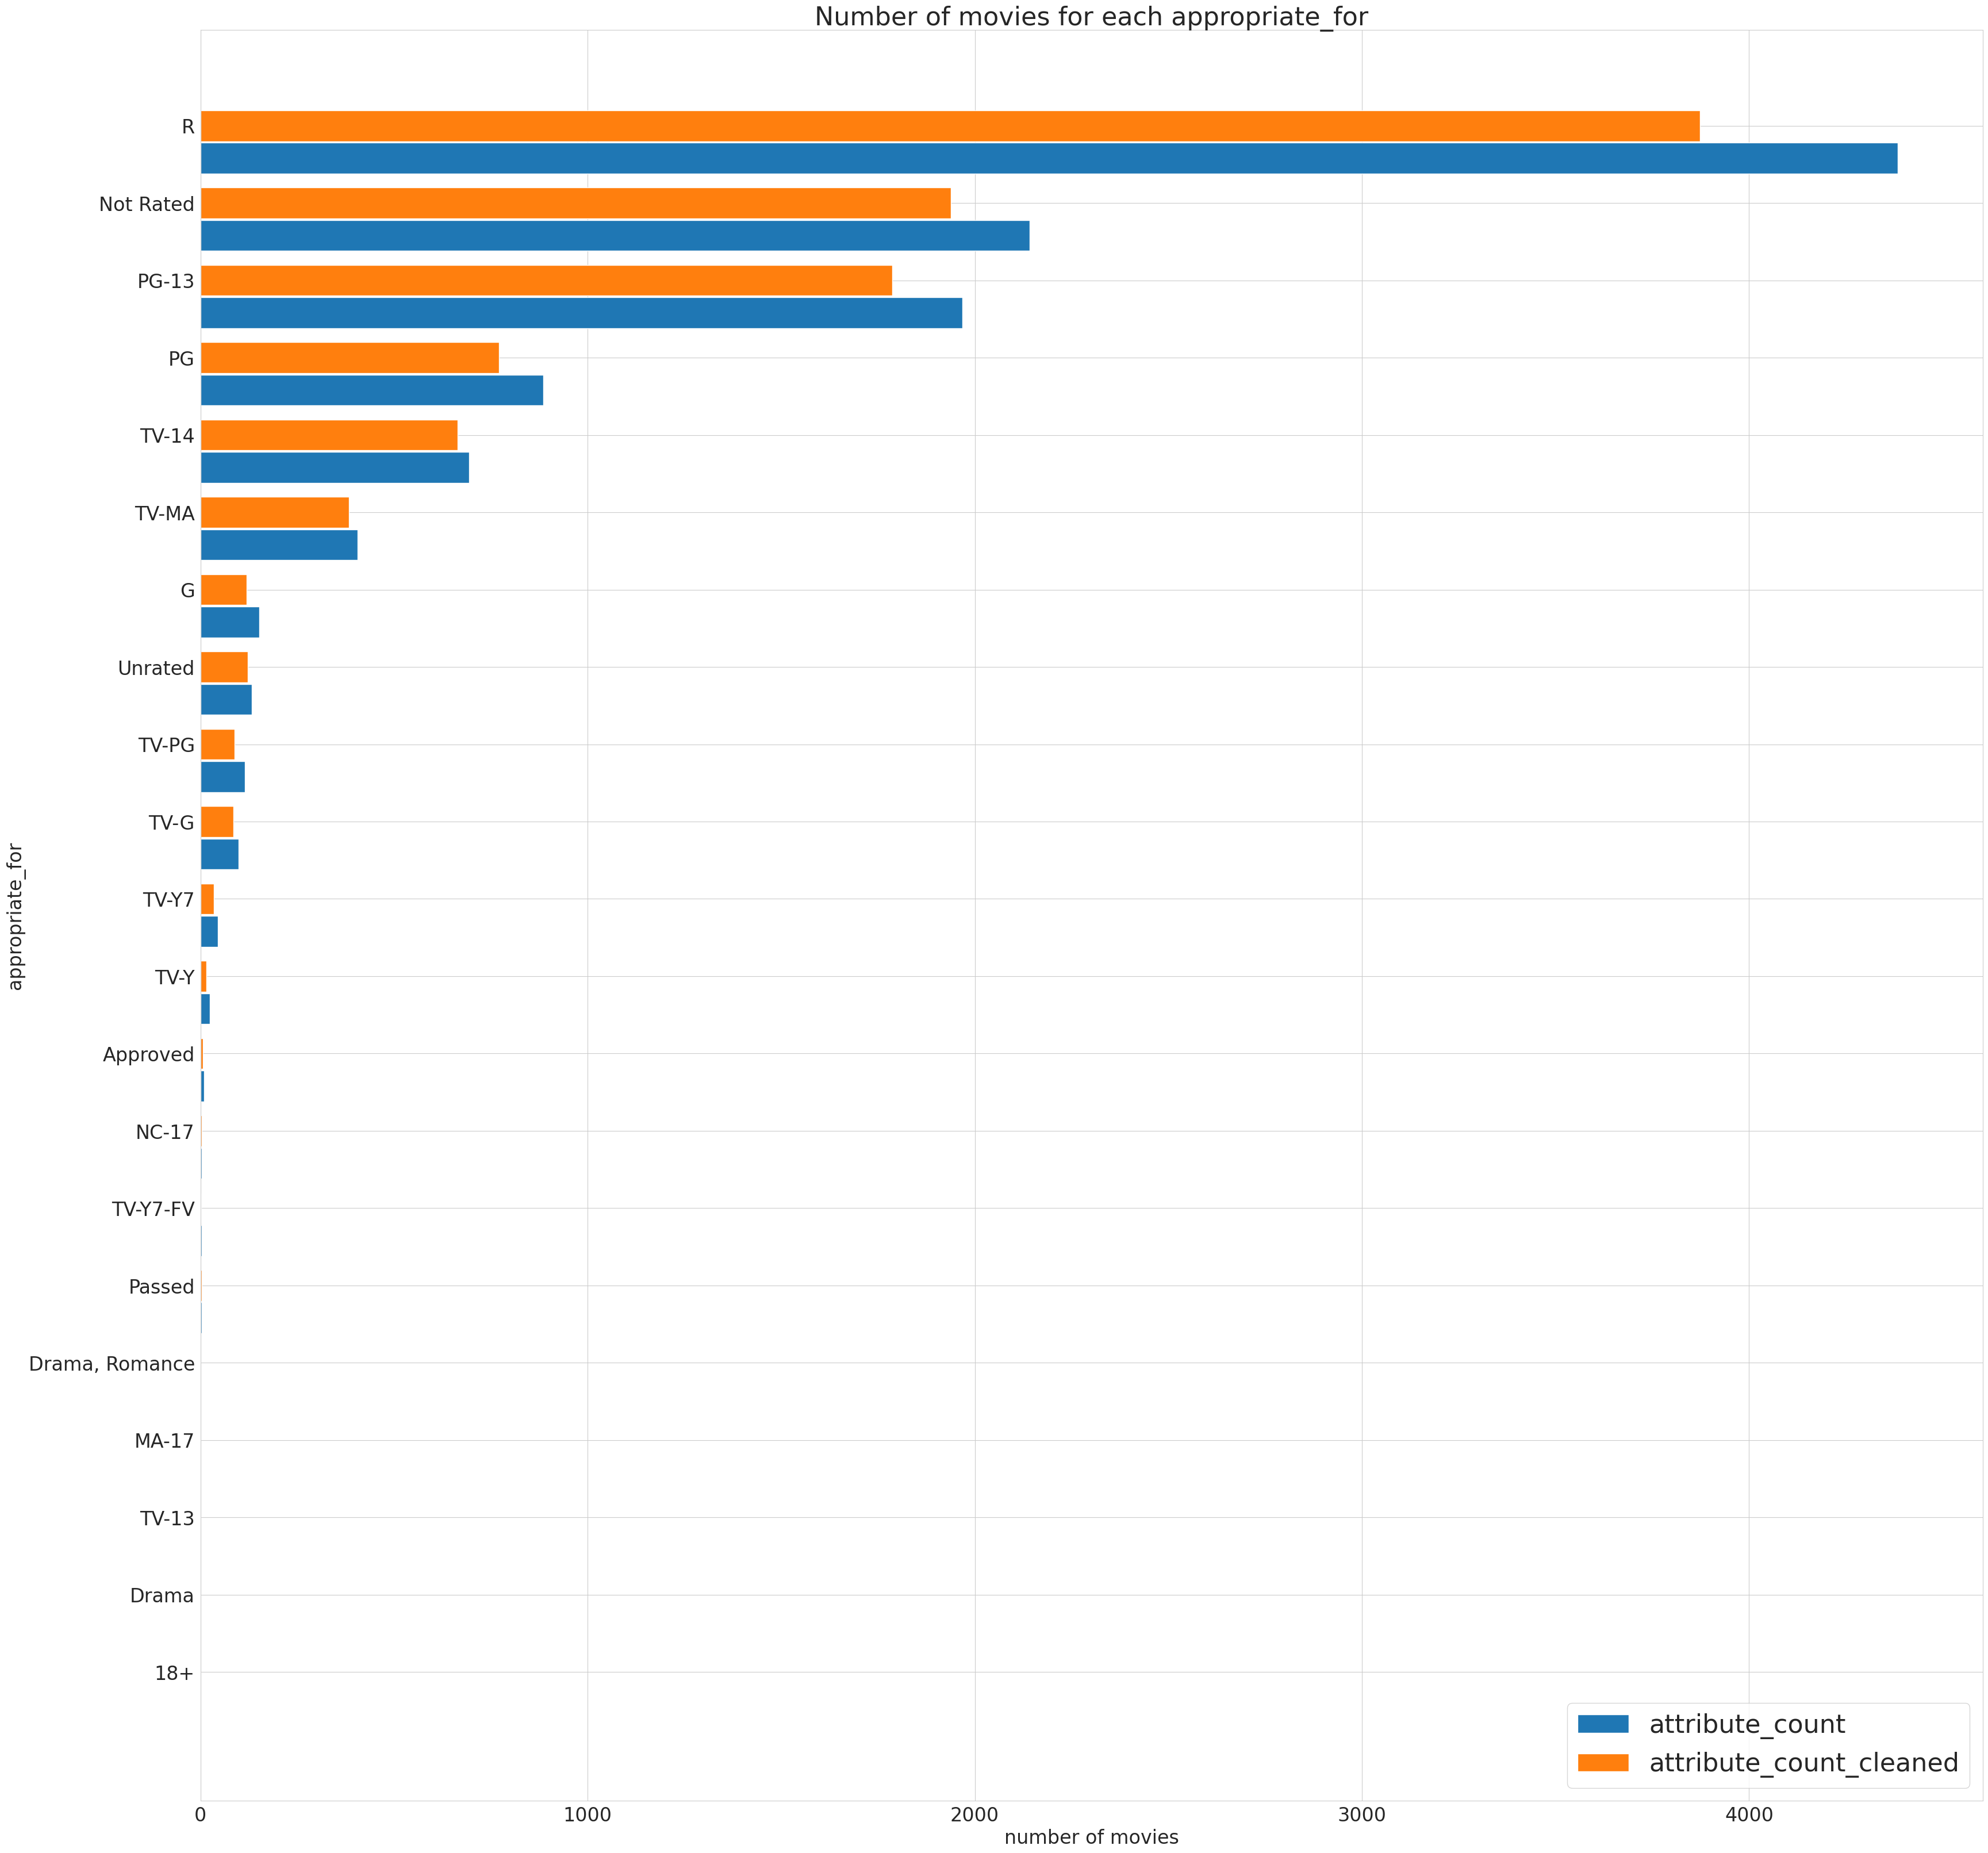

In [104]:
draw_comparison_1('appropriate_for')

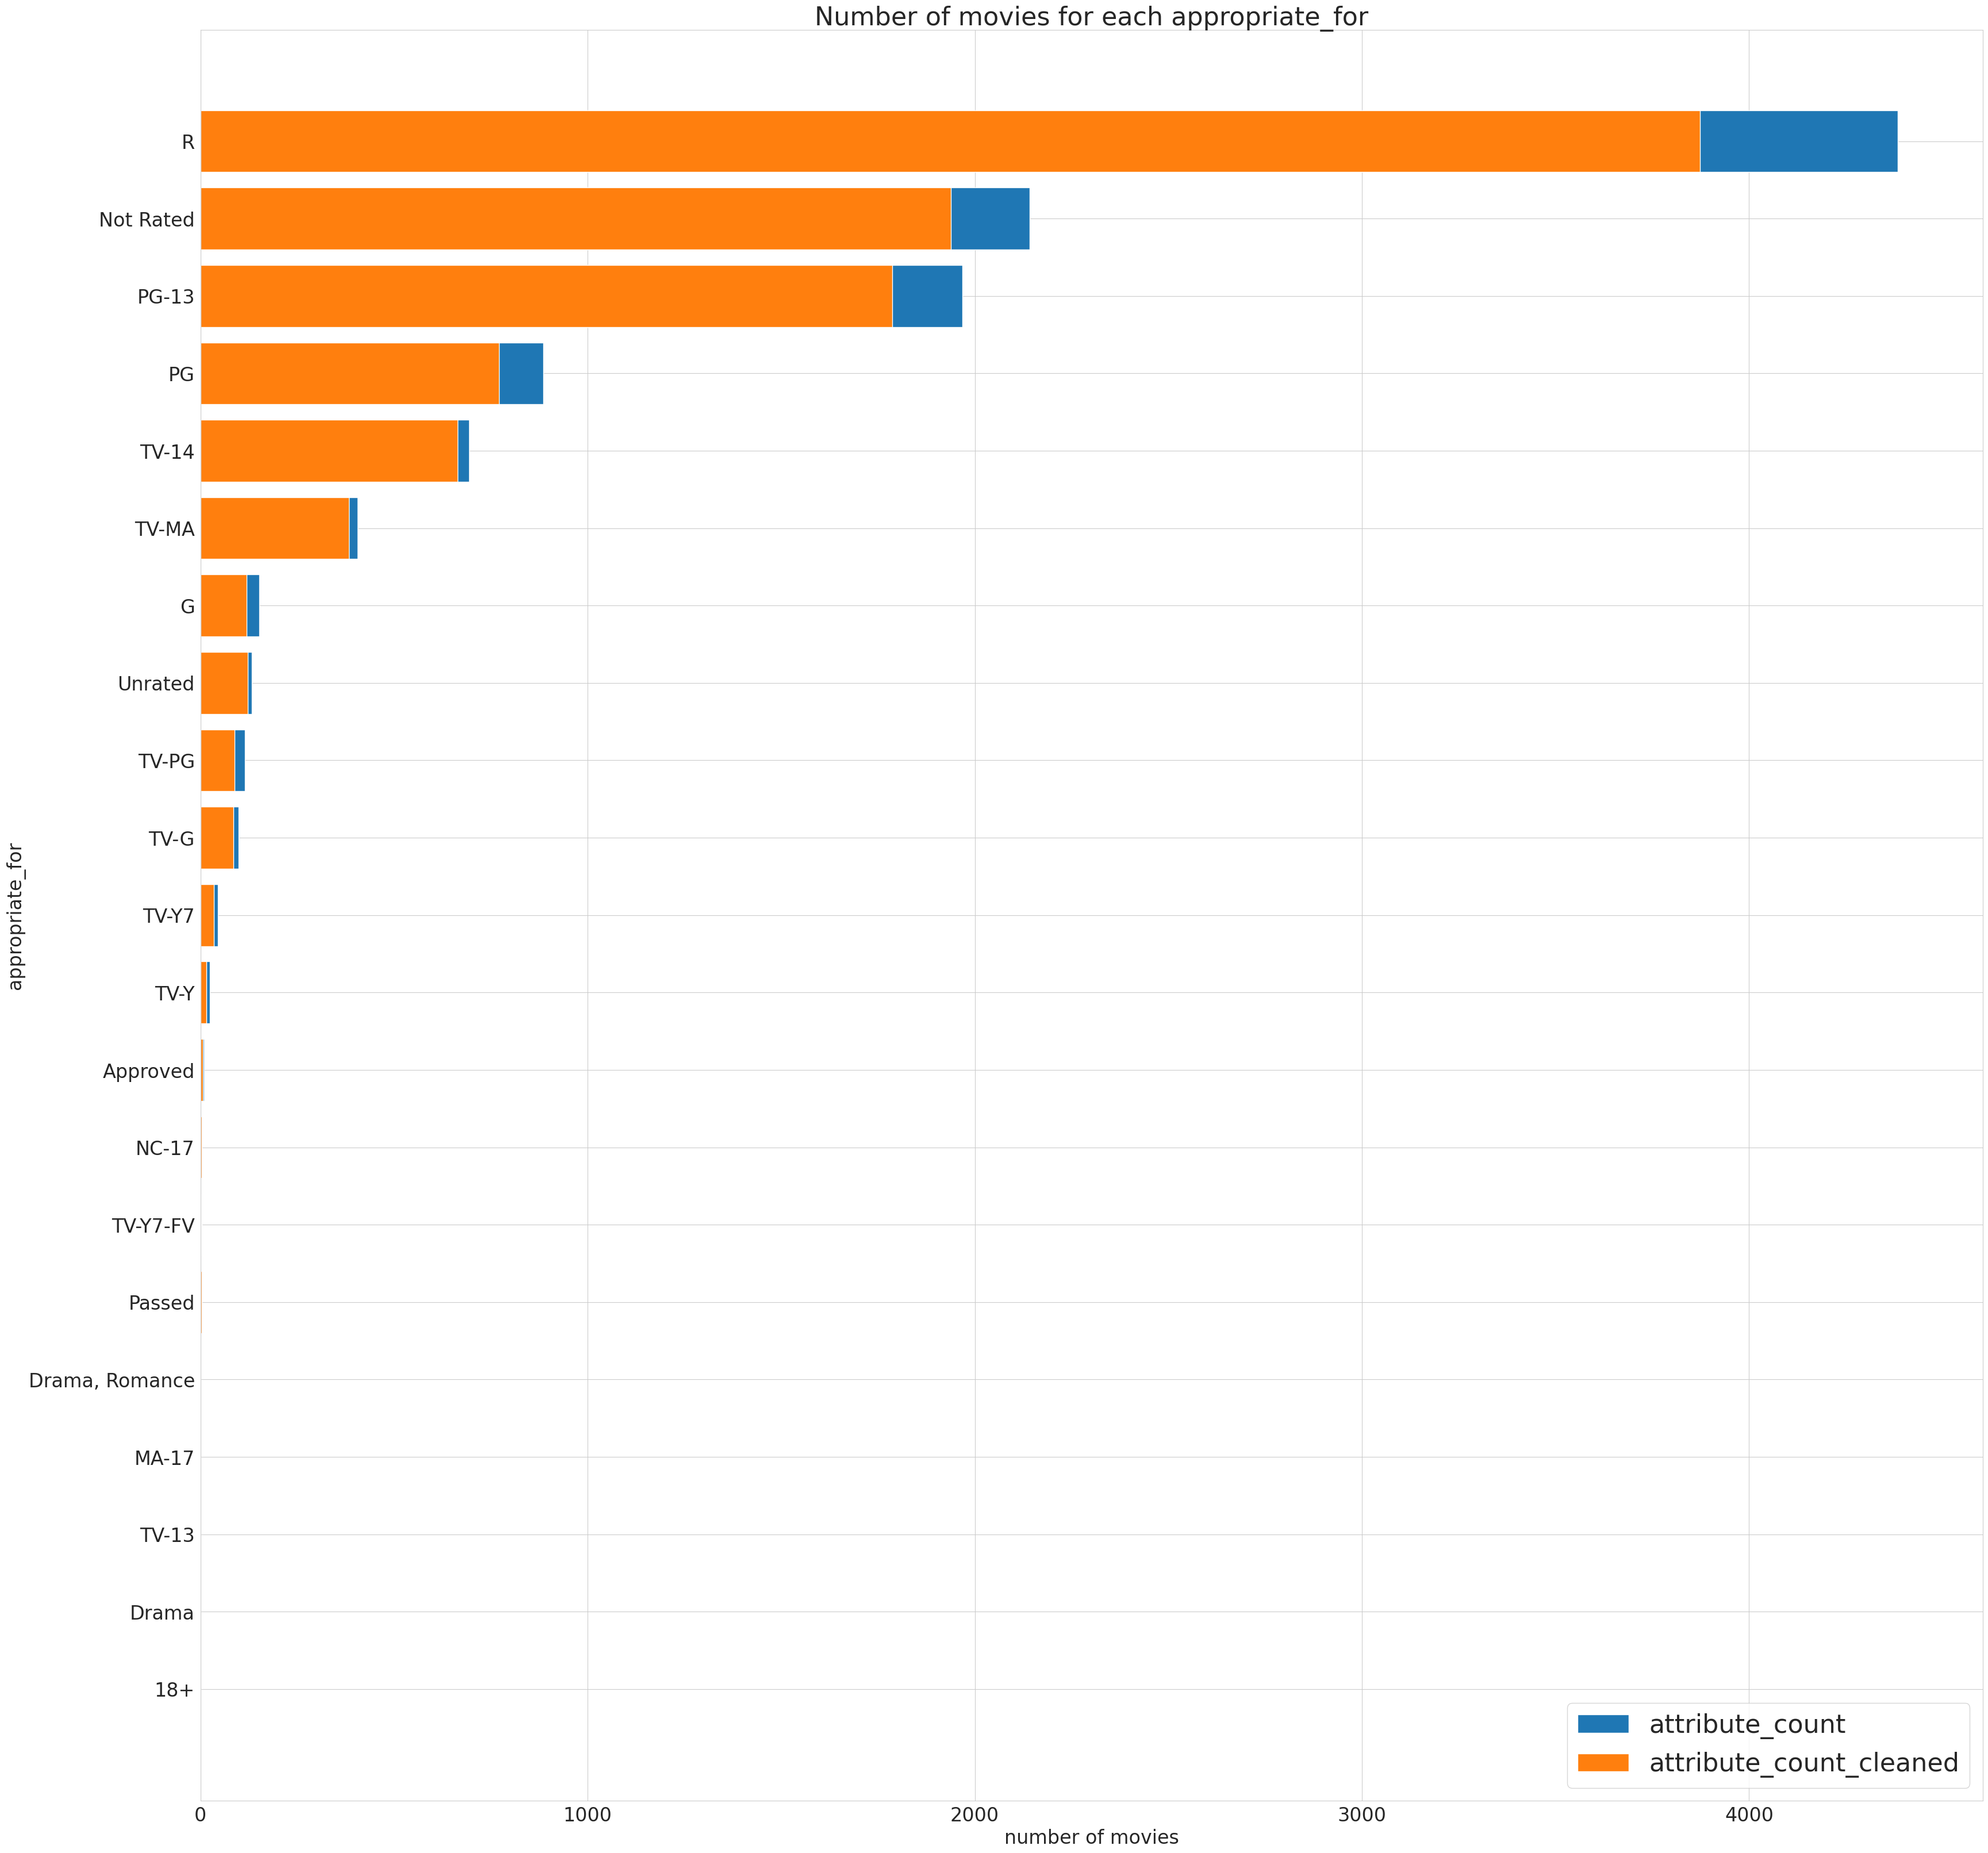

In [63]:
draw_comparison('appropriate_for')

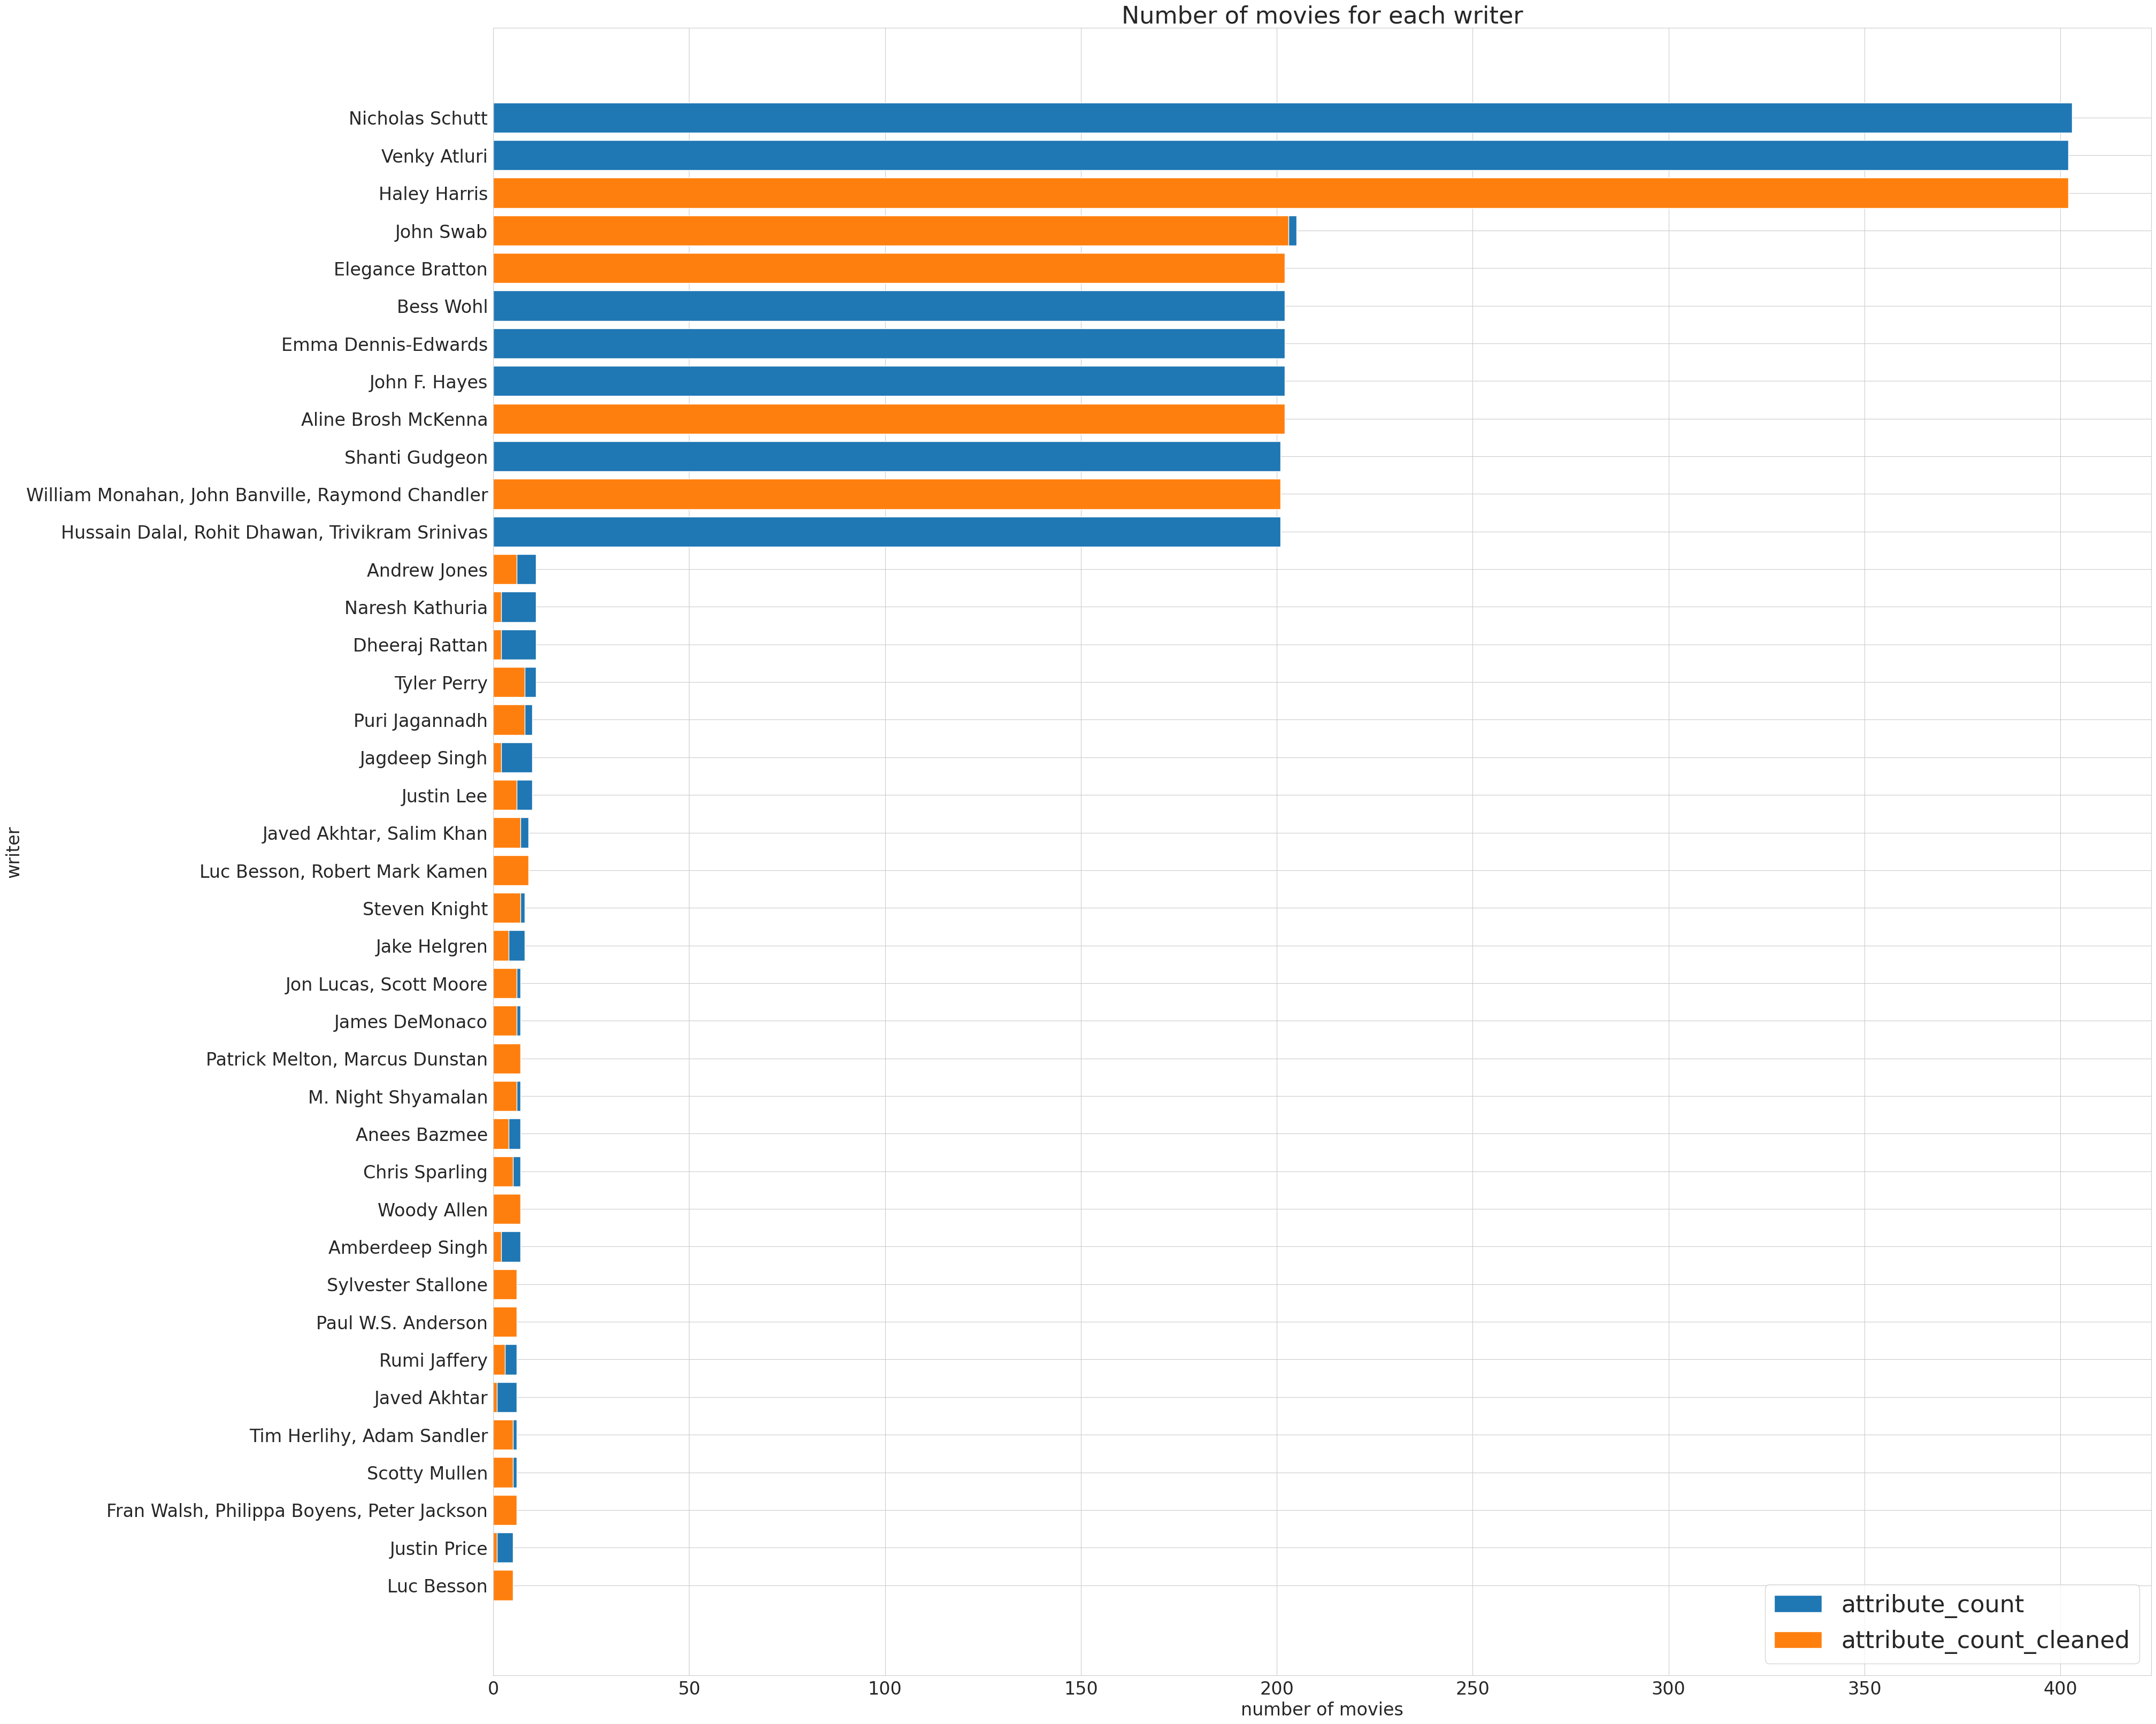

In [64]:
draw_comparison('writer',top_n=40)

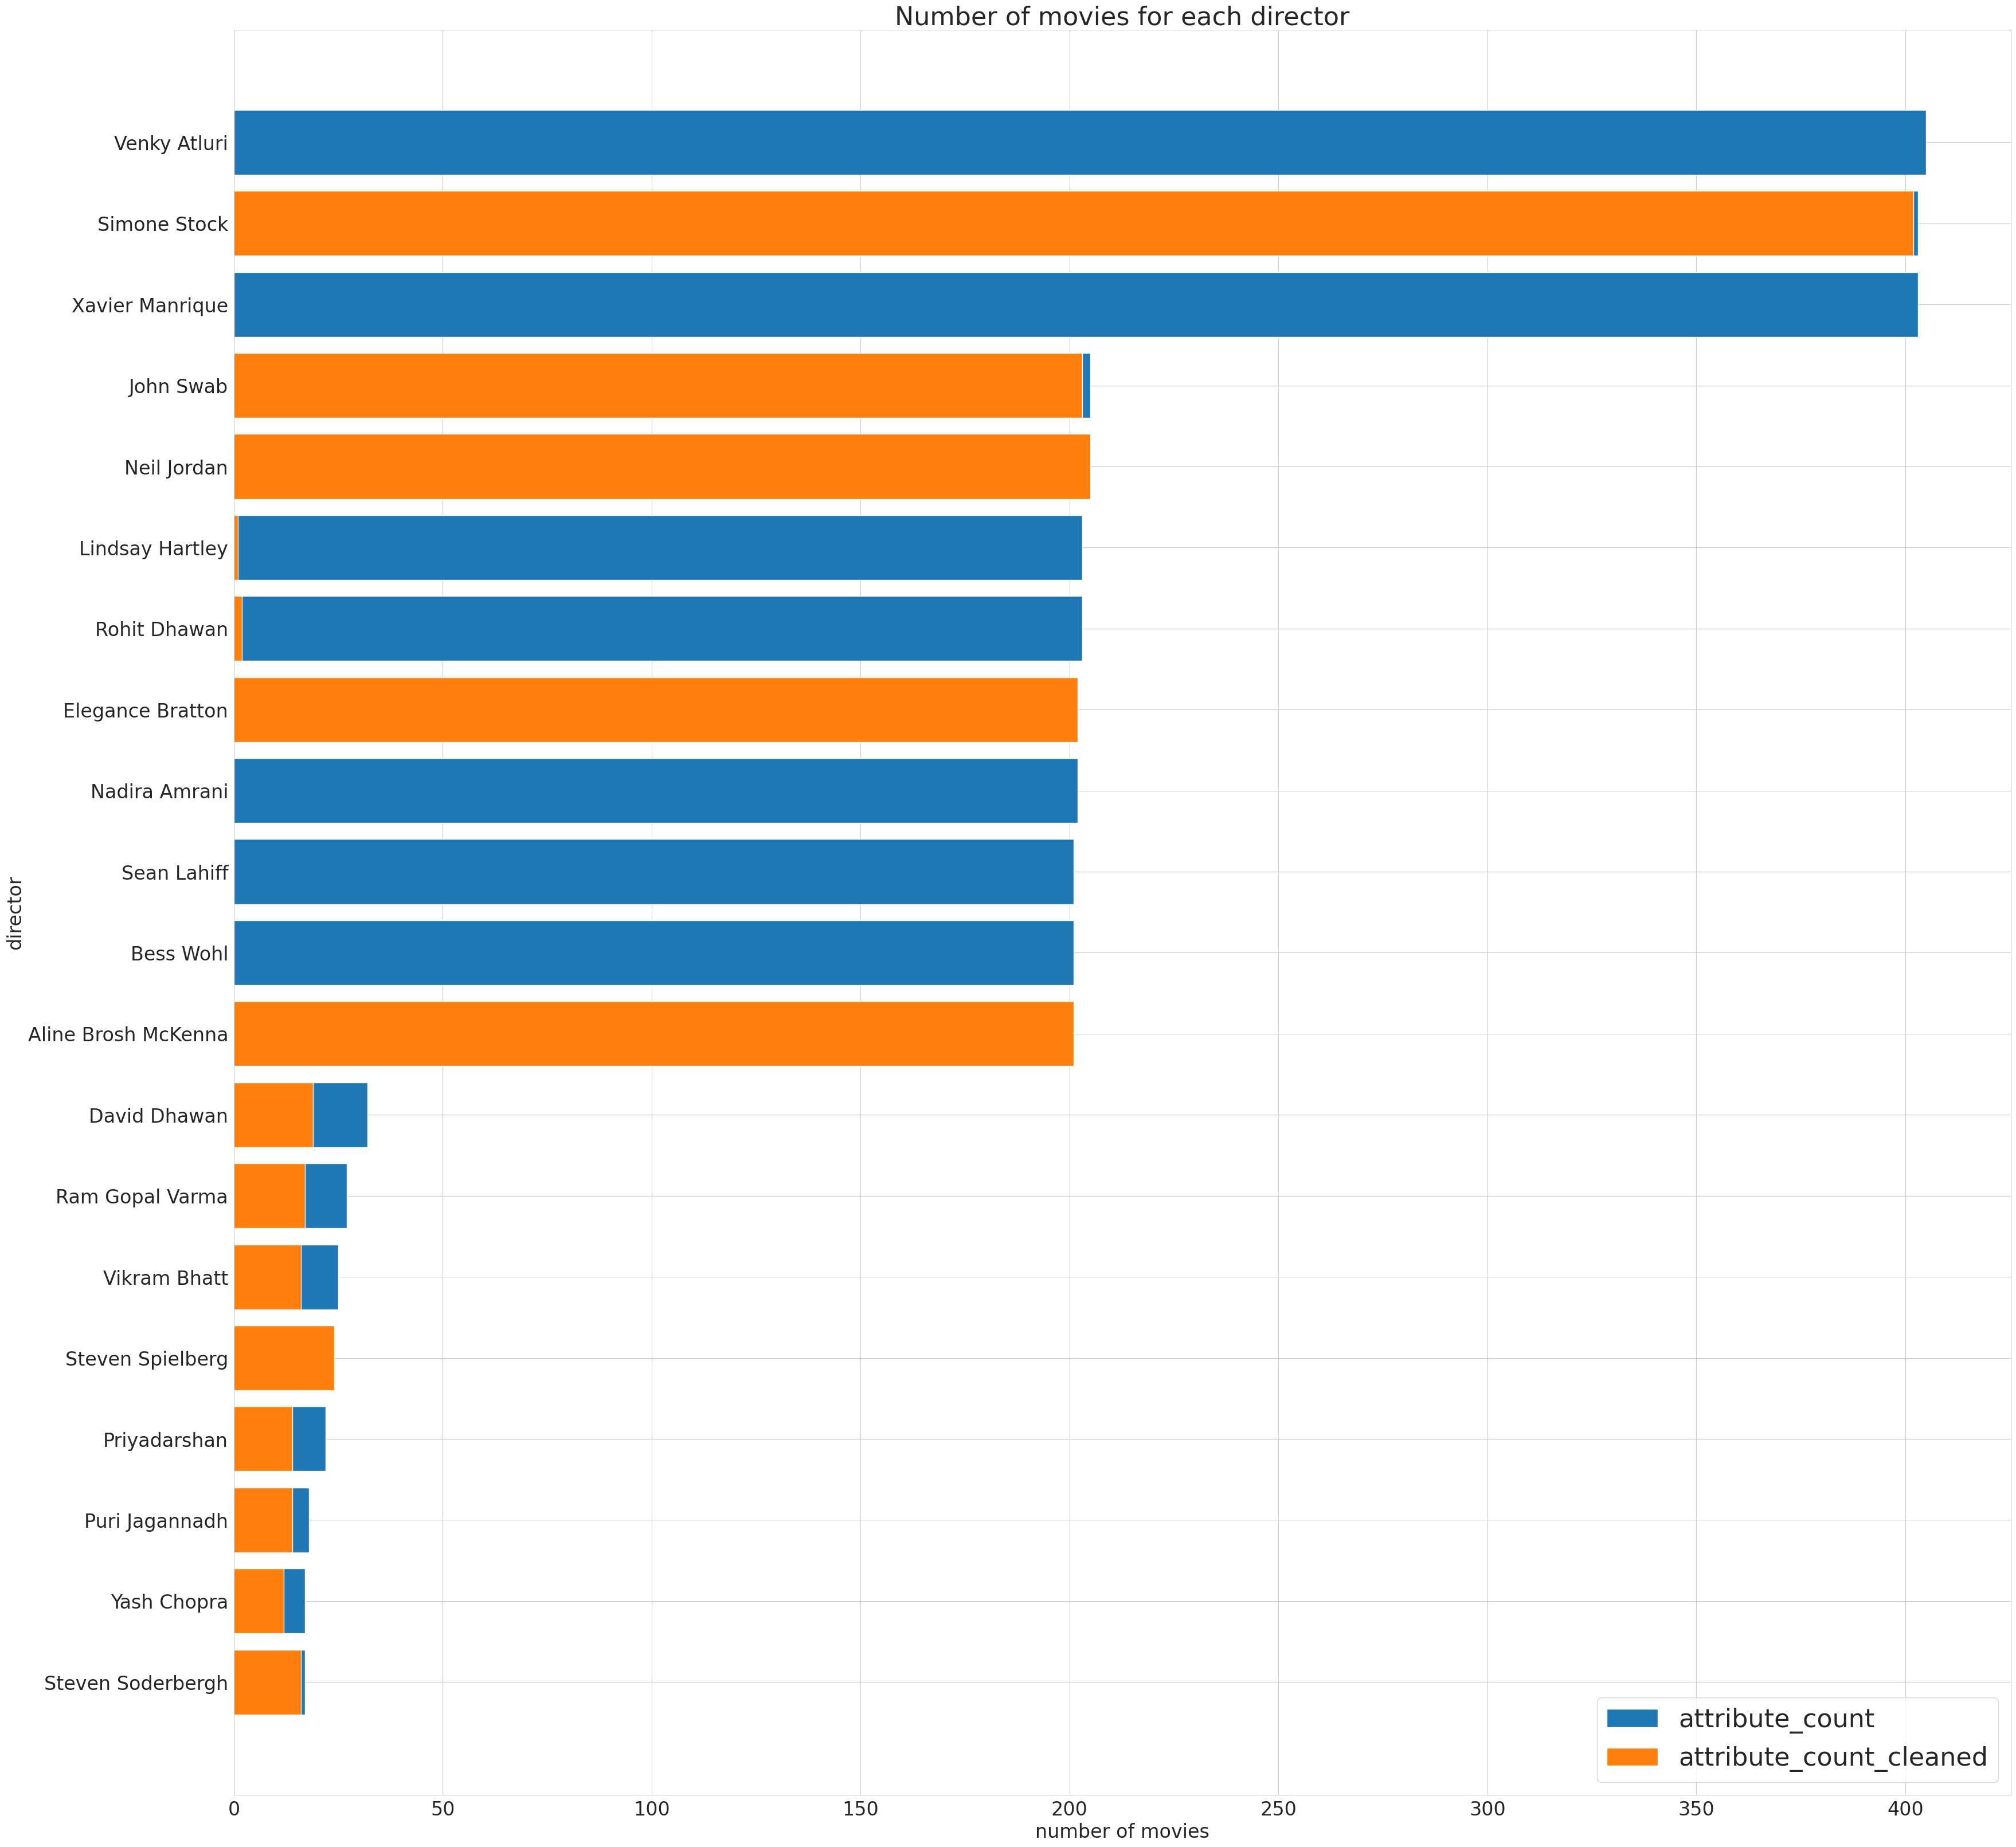

In [65]:
draw_comparison('director',top_n=20)

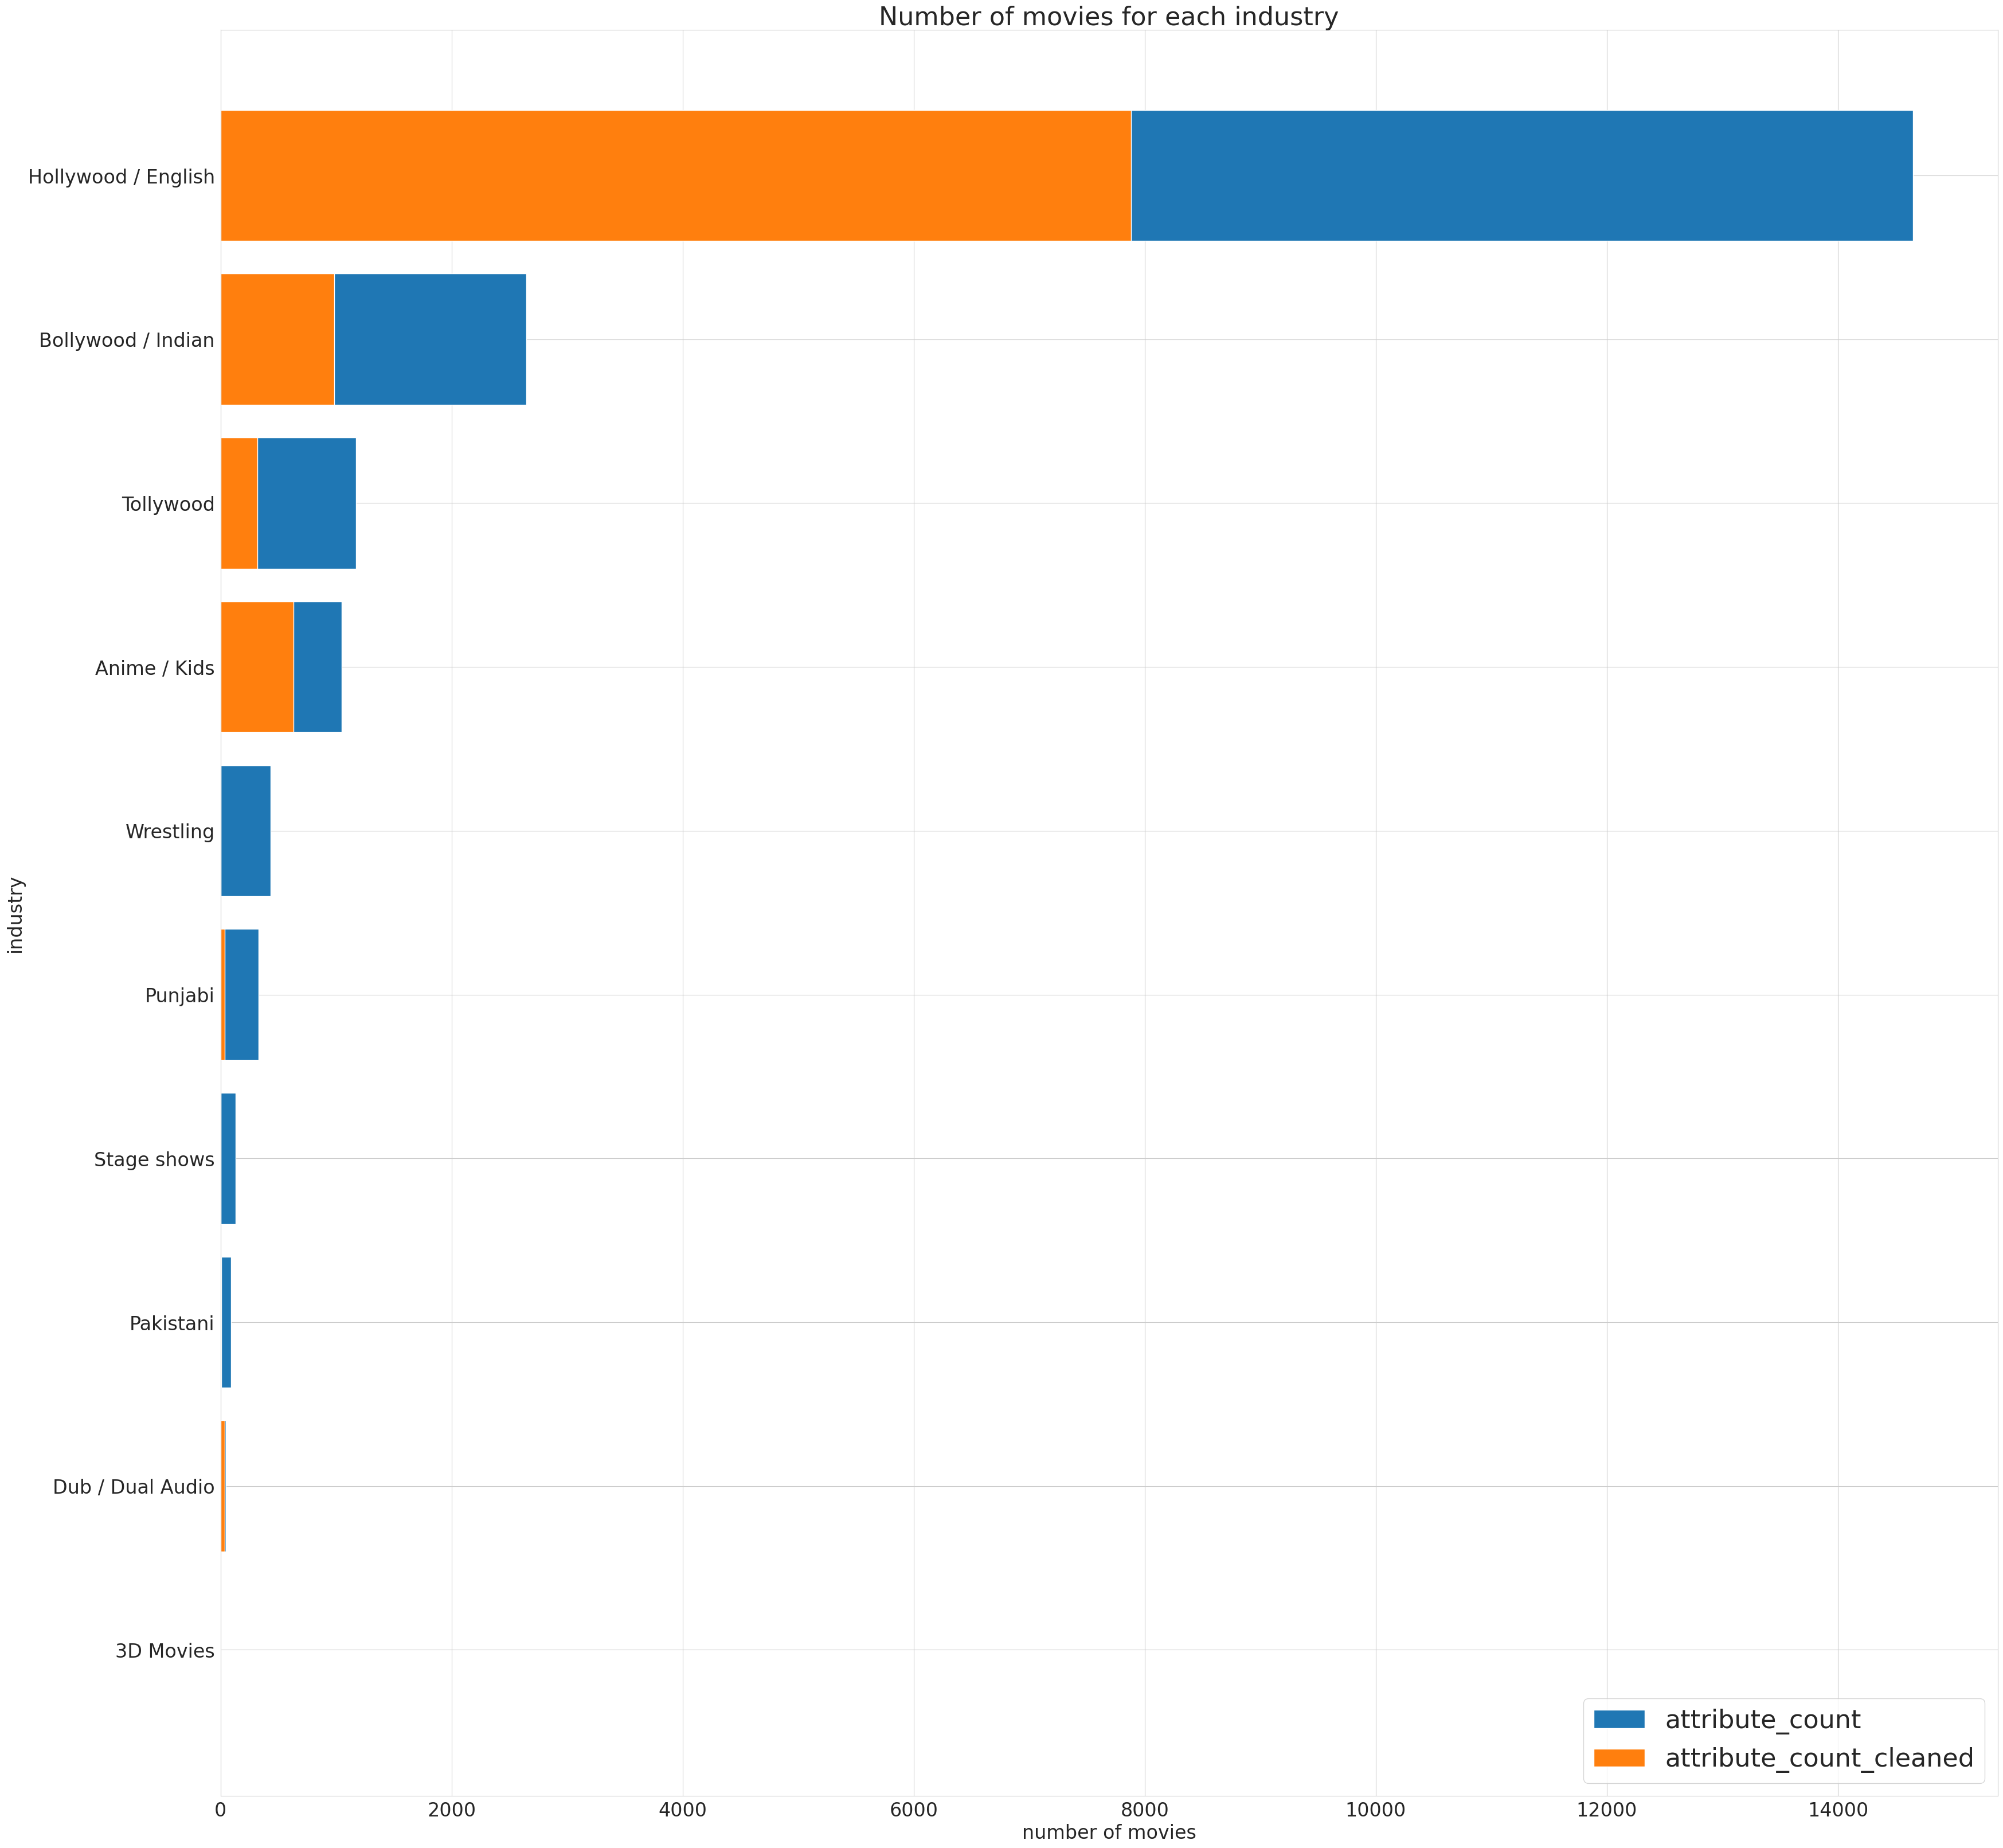

In [66]:
draw_comparison('industry')

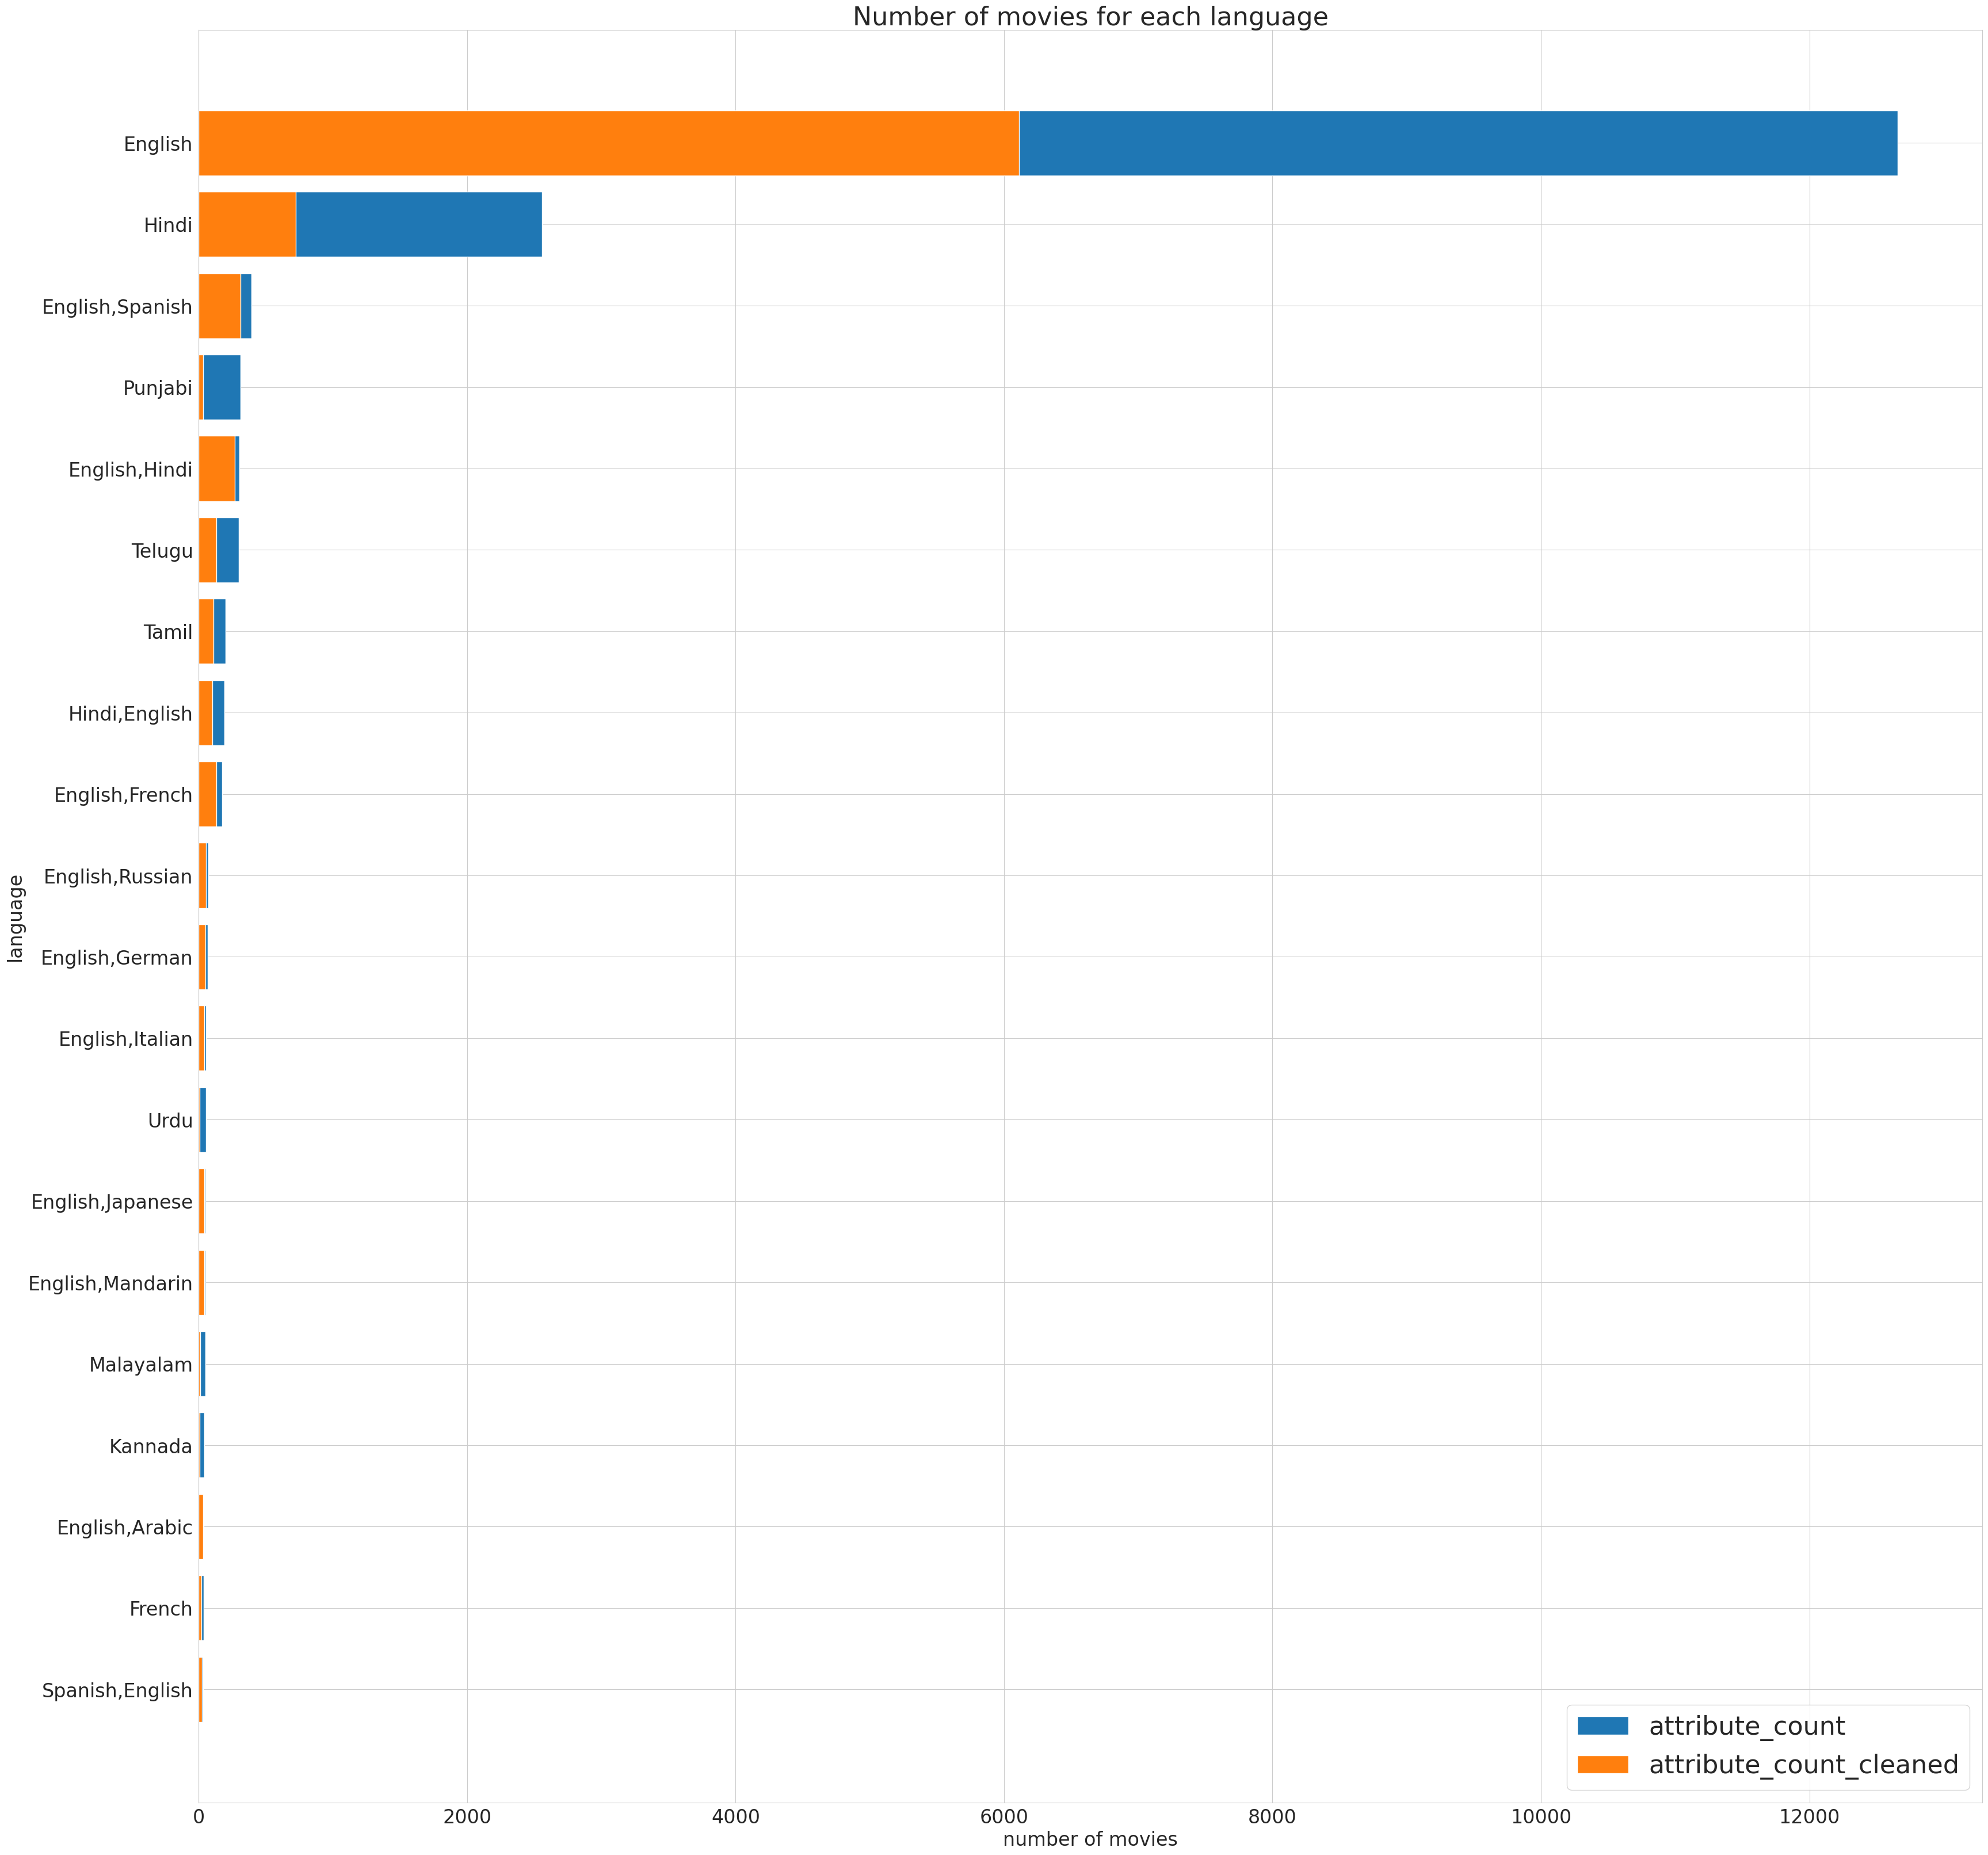

In [67]:
draw_comparison('language',top_n=20)

In [68]:
#  def draw_box_comparison(attribute_name,x_label='counts',showFliers=True,data_1=mov_data,data_2=mov_data):

#     sns.set_style("whitegrid")
#     # operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
#     sns.boxplot(x=attribute_name,data=data_1,showfliers=showFliers)
#     sns.boxplot(x=attribute_name,data=data_2,showfliers=showFliers,color='red')
#     plt.yticks(fontsize=16)
#     plt.xticks(fontsize=6)
#     plt.ylabel(attribute_name, fontsize=20)
#     plt.xlabel(x_label, fontsize=20)
#     plt.show()

数值属性的对比

In [69]:
def draw_box_comparison(attribute_name,showFliers=True,data_1=mov_data,data_2=mov_data):
# Assuming your datasets are stored in DataFrames named mov_data and mov_data_cleaned
    attribute_data = data_1[attribute_name]
    attribute_data_cleaned = data_2[attribute_name]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[attribute_data, attribute_data_cleaned], showfliers=showFliers, palette=['skyblue', 'salmon'])
    plt.title(attribute_name+' Box Plot Comparison')
    plt.xlabel('Dataset')
    plt.ylabel(attribute_name)
    plt.xticks(ticks=[0, 1], labels=[attribute_name, attribute_name+'_cleaned'])
    plt.show()



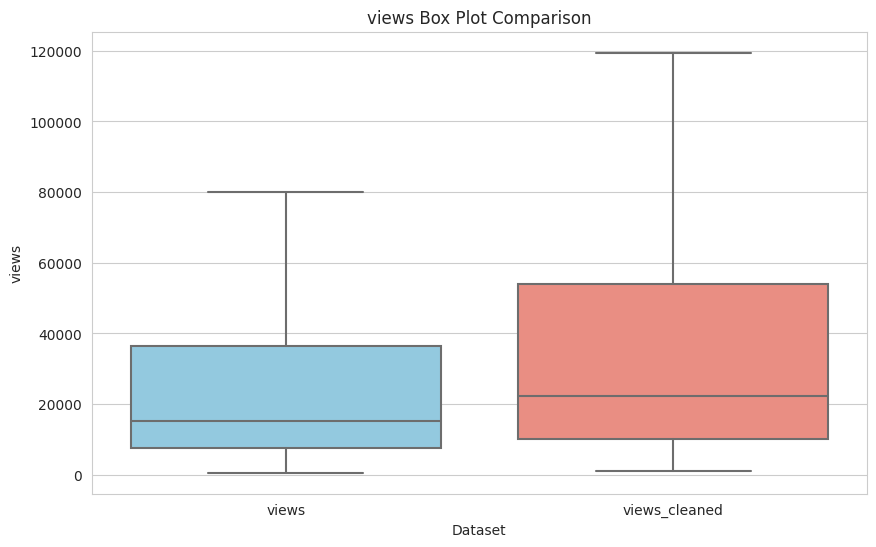

In [70]:
draw_box_comparison('views',showFliers=False,data_1=mov_data,data_2=mov_data_cleaned)

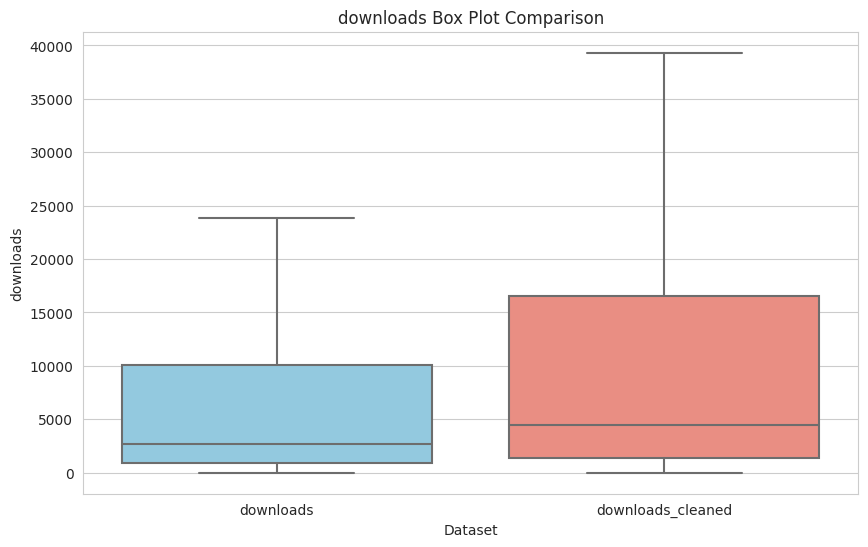

In [71]:
draw_box_comparison('downloads',showFliers=False,data_1=mov_data,data_2=mov_data_cleaned)

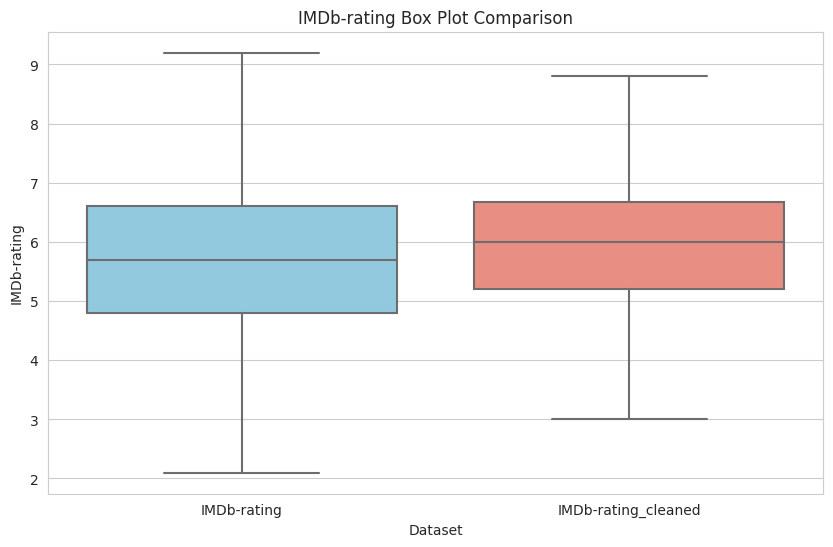

In [72]:
draw_box_comparison('IMDb-rating',showFliers=False,data_1=mov_data,data_2=mov_data_cleaned)

## 将缺失值替换成频率最高的值
记为HF--Highest Frequency

In [73]:
import copy
HF = {}
mov_data_HF_replaced = copy.deepcopy(mov_data)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
# HF['language'] = 'English'

# 取每一列的频率最高值
HF

{'IMDb-rating': 6.6,
 'appropriate_for': 'R',
 'director': 'Venky Atluri',
 'downloads': 75.0,
 'id': '372090',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': Timestamp('2023-02-13 00:00:00'),
 'release_date': Timestamp('1970-01-01 00:00:00'),
 'run_time': '93',
 'storyline': 'The life of a young man and his struggles against the privatization of education.',
 'title': 'The Girl Who Escaped: The Kara Robinson Story',
 'views': 6259.0,
 'writer': 'Nicholas Schutt'}

In [74]:
mov_data.isna().sum()

IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            546
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

In [75]:
# 代替空值
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [76]:
mov_data_HF_replaced.head(10)

IMDb-rating appropriate_for            director  downloads      id  \
0          4.8               R           John Swab      304.0  372092   
1          6.4           TV-PG         Paul Ziller       73.0  372091   
2          5.2               R        Ben Wheatley     1427.0  343381   
3          8.1               R        Venky Atluri     1549.0  372090   
4          4.6               R        Shaji Kailas      657.0  372089   
5          5.4               R  Srinivas Gavireddy      746.0  372088   
6          6.6           TV-PG        Venky Atluri     5332.0  372059   
7          6.5               R      Benjamin Caron     1781.0  371751   
8          6.9           PG-13         Ravi Kapoor      458.0  372042   
9          4.2               R        Danny LeGare     1965.0  372041   

              industry       language posted_date release_date  run_time  \
0  Hollywood / English        English  2023-02-20   2023-01-28       105   
1  Hollywood / English        English  2023-02-20   2023-02-05        84   
2  Hollywood / English  English,Hindi  2021-04-20   2021-06-18  1h 47min   
3            Tollywood          Hindi  2023-02-20   2023-02-17       139   
4            Tollywood          Hindi  2023-02-20   2023-01-26       122   
5            Tollywood          Hindi  2023-02-20   2021-11-26       131   
6            Wrestling        English  2023-02-19   2023-02-18       200   
7  Hollywood / English        English  2023-02-13   2023-02-17       116   
8  Hollywood / English        English  2023-02-18   2022-12-02        80   
9  Hollywood / English        English  2023-02-18   2023-02-07        80   

                                           storyline  \
0  Doc\r\n facilitates a fragile truce between th...   
1  Caterer\r\n Goldy Berry reunites with detectiv...   
2  As the world searches for a cure to a disastro...   
3  The life of a young man and his struggles agai...   
4  A man named Kalidas gets stranded due to the p...   
5  Bagaram,\r\n after inheriting his grandfather'...   
6  Undisputed\r\n WWE Universal title: Reigns vs ...   
7  Motivations are suspect, and expectations are ...   
8  An\r\n unmotivated South Asian American rapper...   
9  A\r\n family moves back to a farm in the mothe...   

                                        title    views  \
0                                Little Dixie   2794.0   
1  Grilling Season: A Curious Caterer Mystery   1002.0   
2                                In the Earth  14419.0   
3                                      Vaathi   4878.0   
4                                       Alone   2438.0   
5                           Anubhavinchu Raja   2940.0   
6                     WWE Elimination Chamber  11978.0   
7                                     Sharper  18225.0   
8                                Four Samosas   6912.0   
9                               Blood Harvest   9710.0   

                                          writer  
0                                      John Swab  
1                         John Christian Plummer  
2                                   Ben Wheatley  
3                                   Venky Atluri  
4                               Rajesh Jayaraman  
5             Srinivas Gavireddy, Mayukh Adithya  
6                                Nicholas Schutt  
7              Brian Gatewood, Alessandro Tanaka  
8                                    Ravi Kapoor  
9  Michael Hultquist, Danny LeGare, Seth Metoyer

In [77]:

def draw_comparison_2(attribute_name, data_1=mov_data, data_2=mov_data_cleaned, top_n=None):
    """
    绘制属性对比图

    Args:
        attribute_name (str): 属性名称
        top_n (int, optional): 要展示的前n个属性。默认为None，表示展示所有属性。

    Returns:
        None
    """
    attribute_count = pd.DataFrame(data_1[attribute_name].value_counts()).sort_values(by='count', ascending=True)
    
    if top_n is not None:
        attribute_count = attribute_count.iloc[-top_n:]
    
    attribute_count_cleaned = attribute_count.copy()
    attribute_count_cleaned['count_cleaned'] = 0
    
    for level in attribute_count.index:
        if level in data_2[attribute_name].value_counts().index:
            attribute_count_cleaned.loc[level, 'count_cleaned'] = data_2[attribute_name].value_counts().loc[level]
    
    # Create separate subplots for the two attributes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot the first attribute
    ax1.barh(attribute_count.index, width=attribute_count['count'], label='attribute_count')
    ax1.set_ylabel(attribute_name, fontsize=14)
    ax1.set_xlabel('Number of movies', fontsize=14)
    ax1.set_title(f'Number of movies for each {attribute_name}', fontsize=16)
    ax1.legend(loc='lower right')
    
    # Plot the second attribute
    ax2.barh(attribute_count_cleaned.index, width=attribute_count_cleaned['count_cleaned'], label='attribute_count_cleaned', color='orange')
    ax2.set_ylabel(attribute_name, fontsize=14)
    ax2.set_xlabel('Number of movies', fontsize=14)
    ax2.set_title(f'Number of cleaned movies for each {attribute_name}', fontsize=16)
    ax2.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()




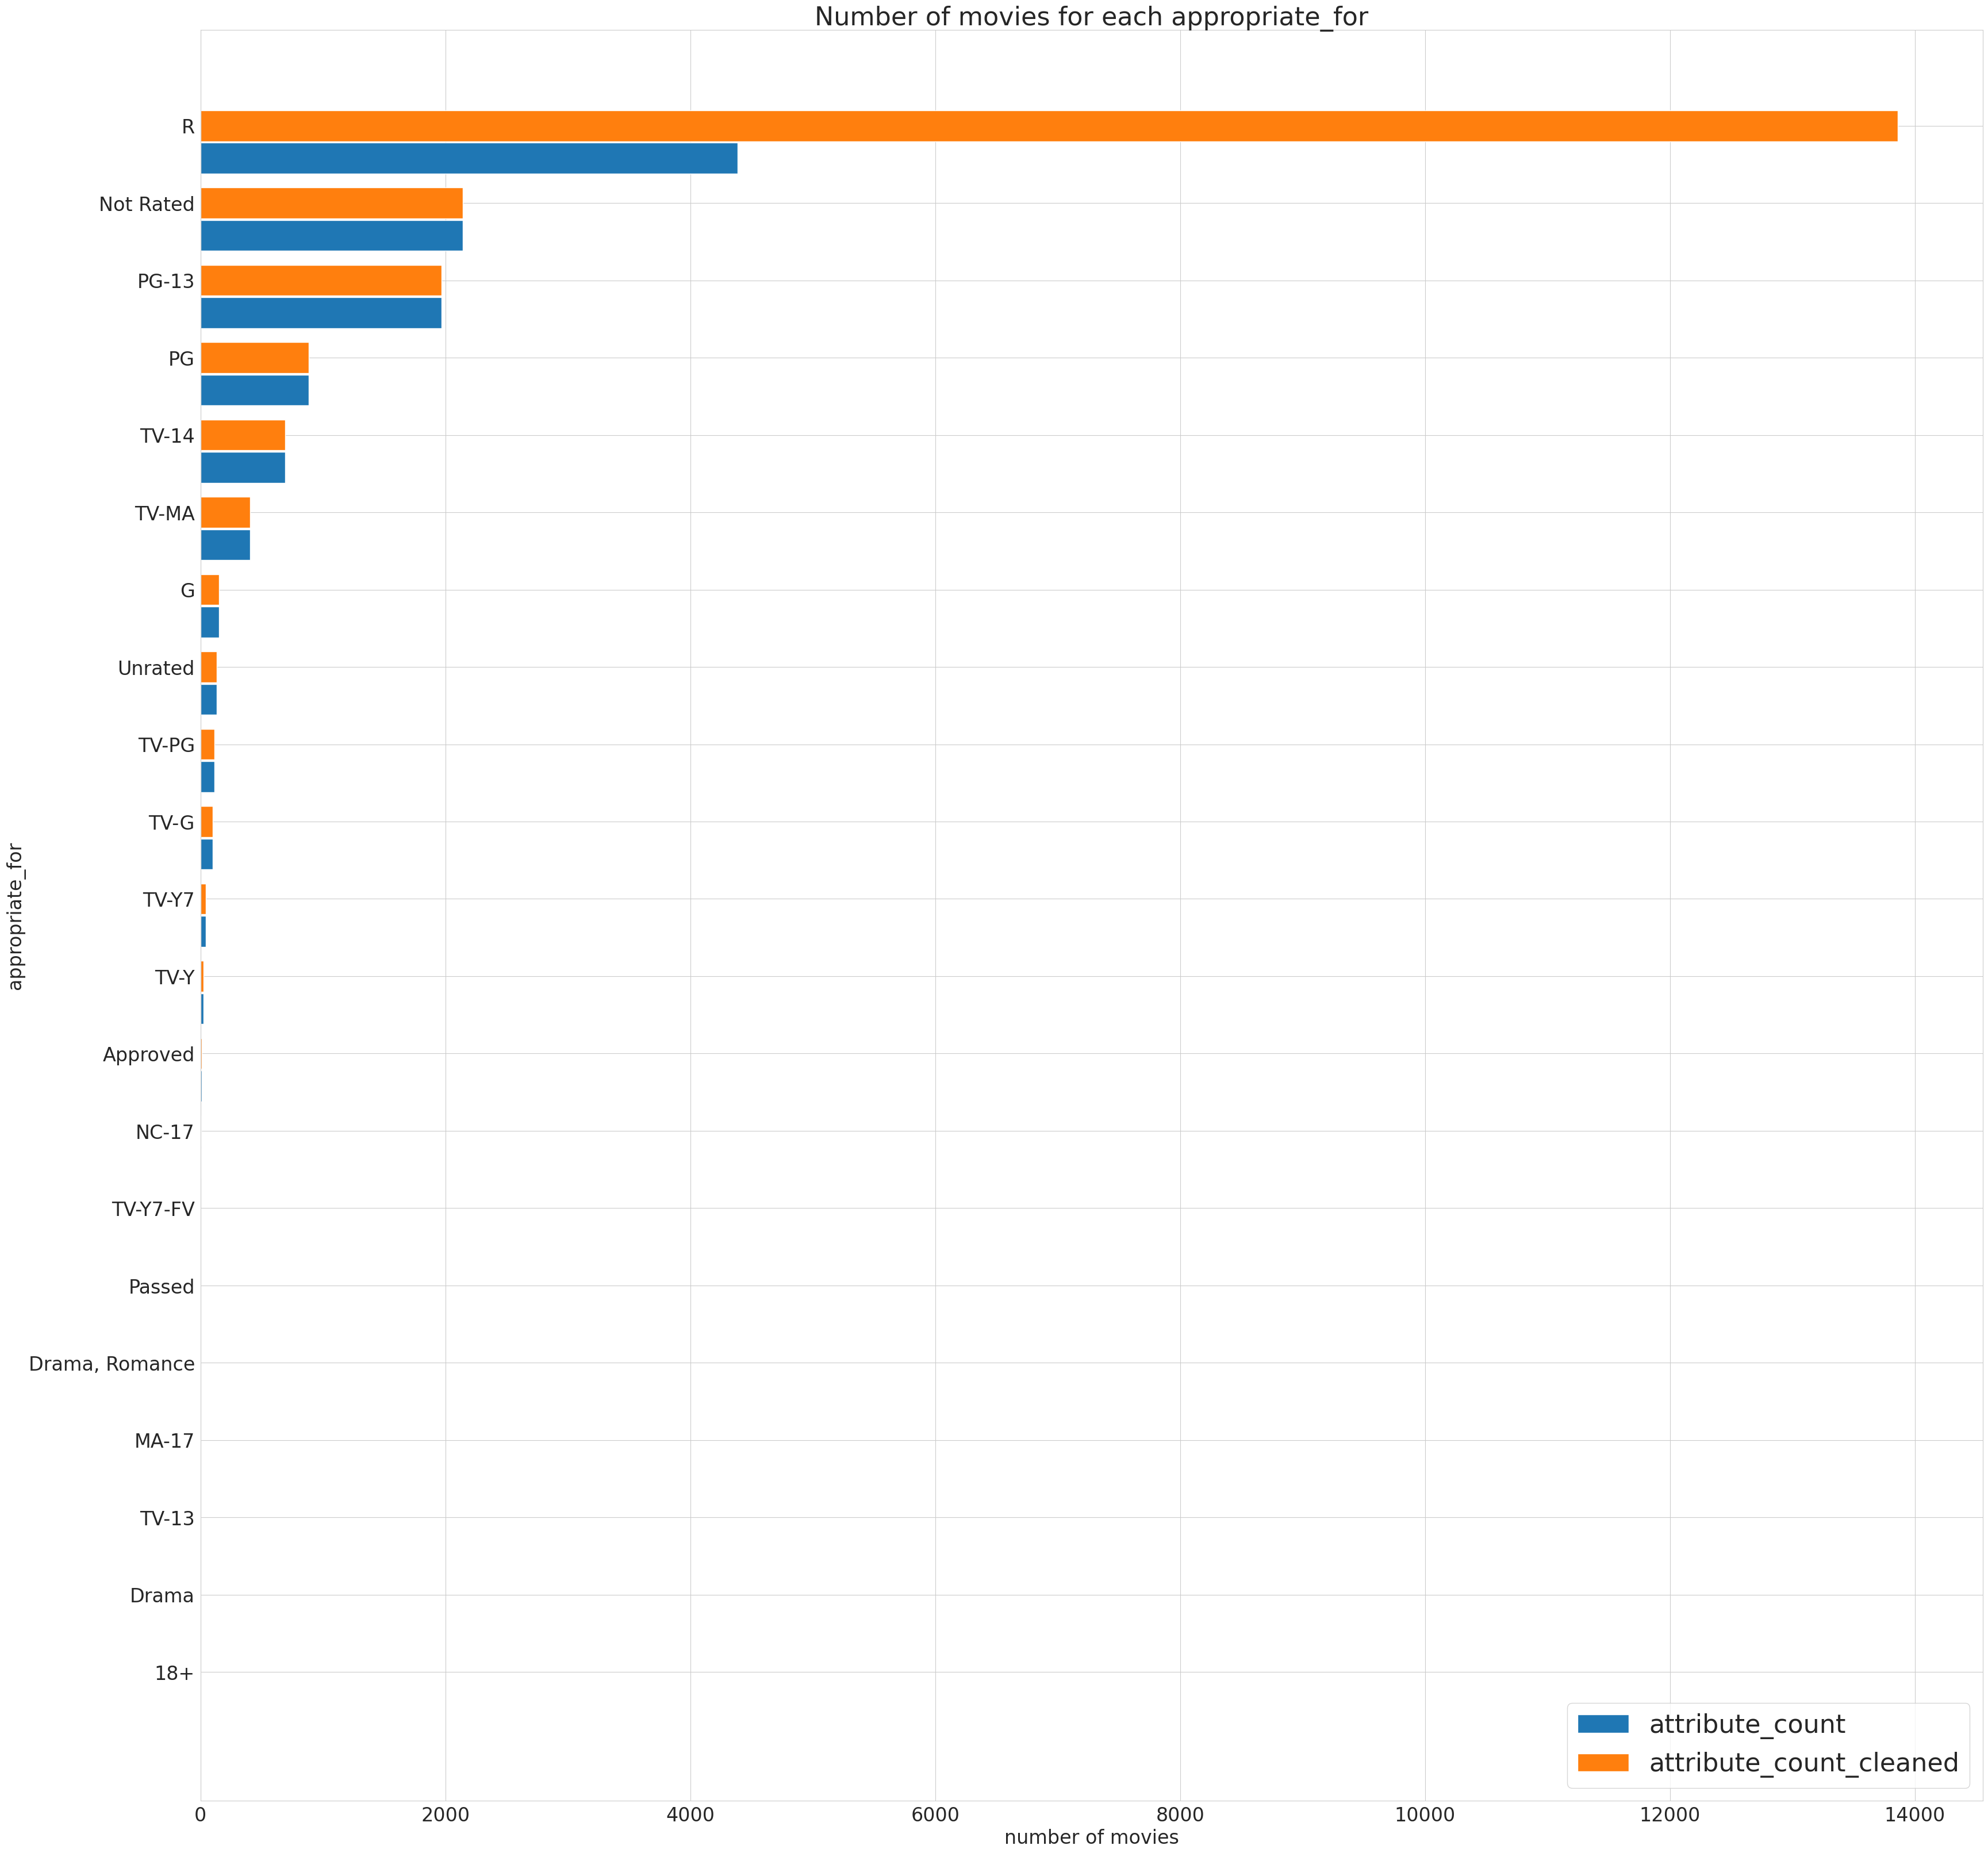

In [105]:
draw_comparison_1('appropriate_for',data_2=mov_data_HF_replaced)

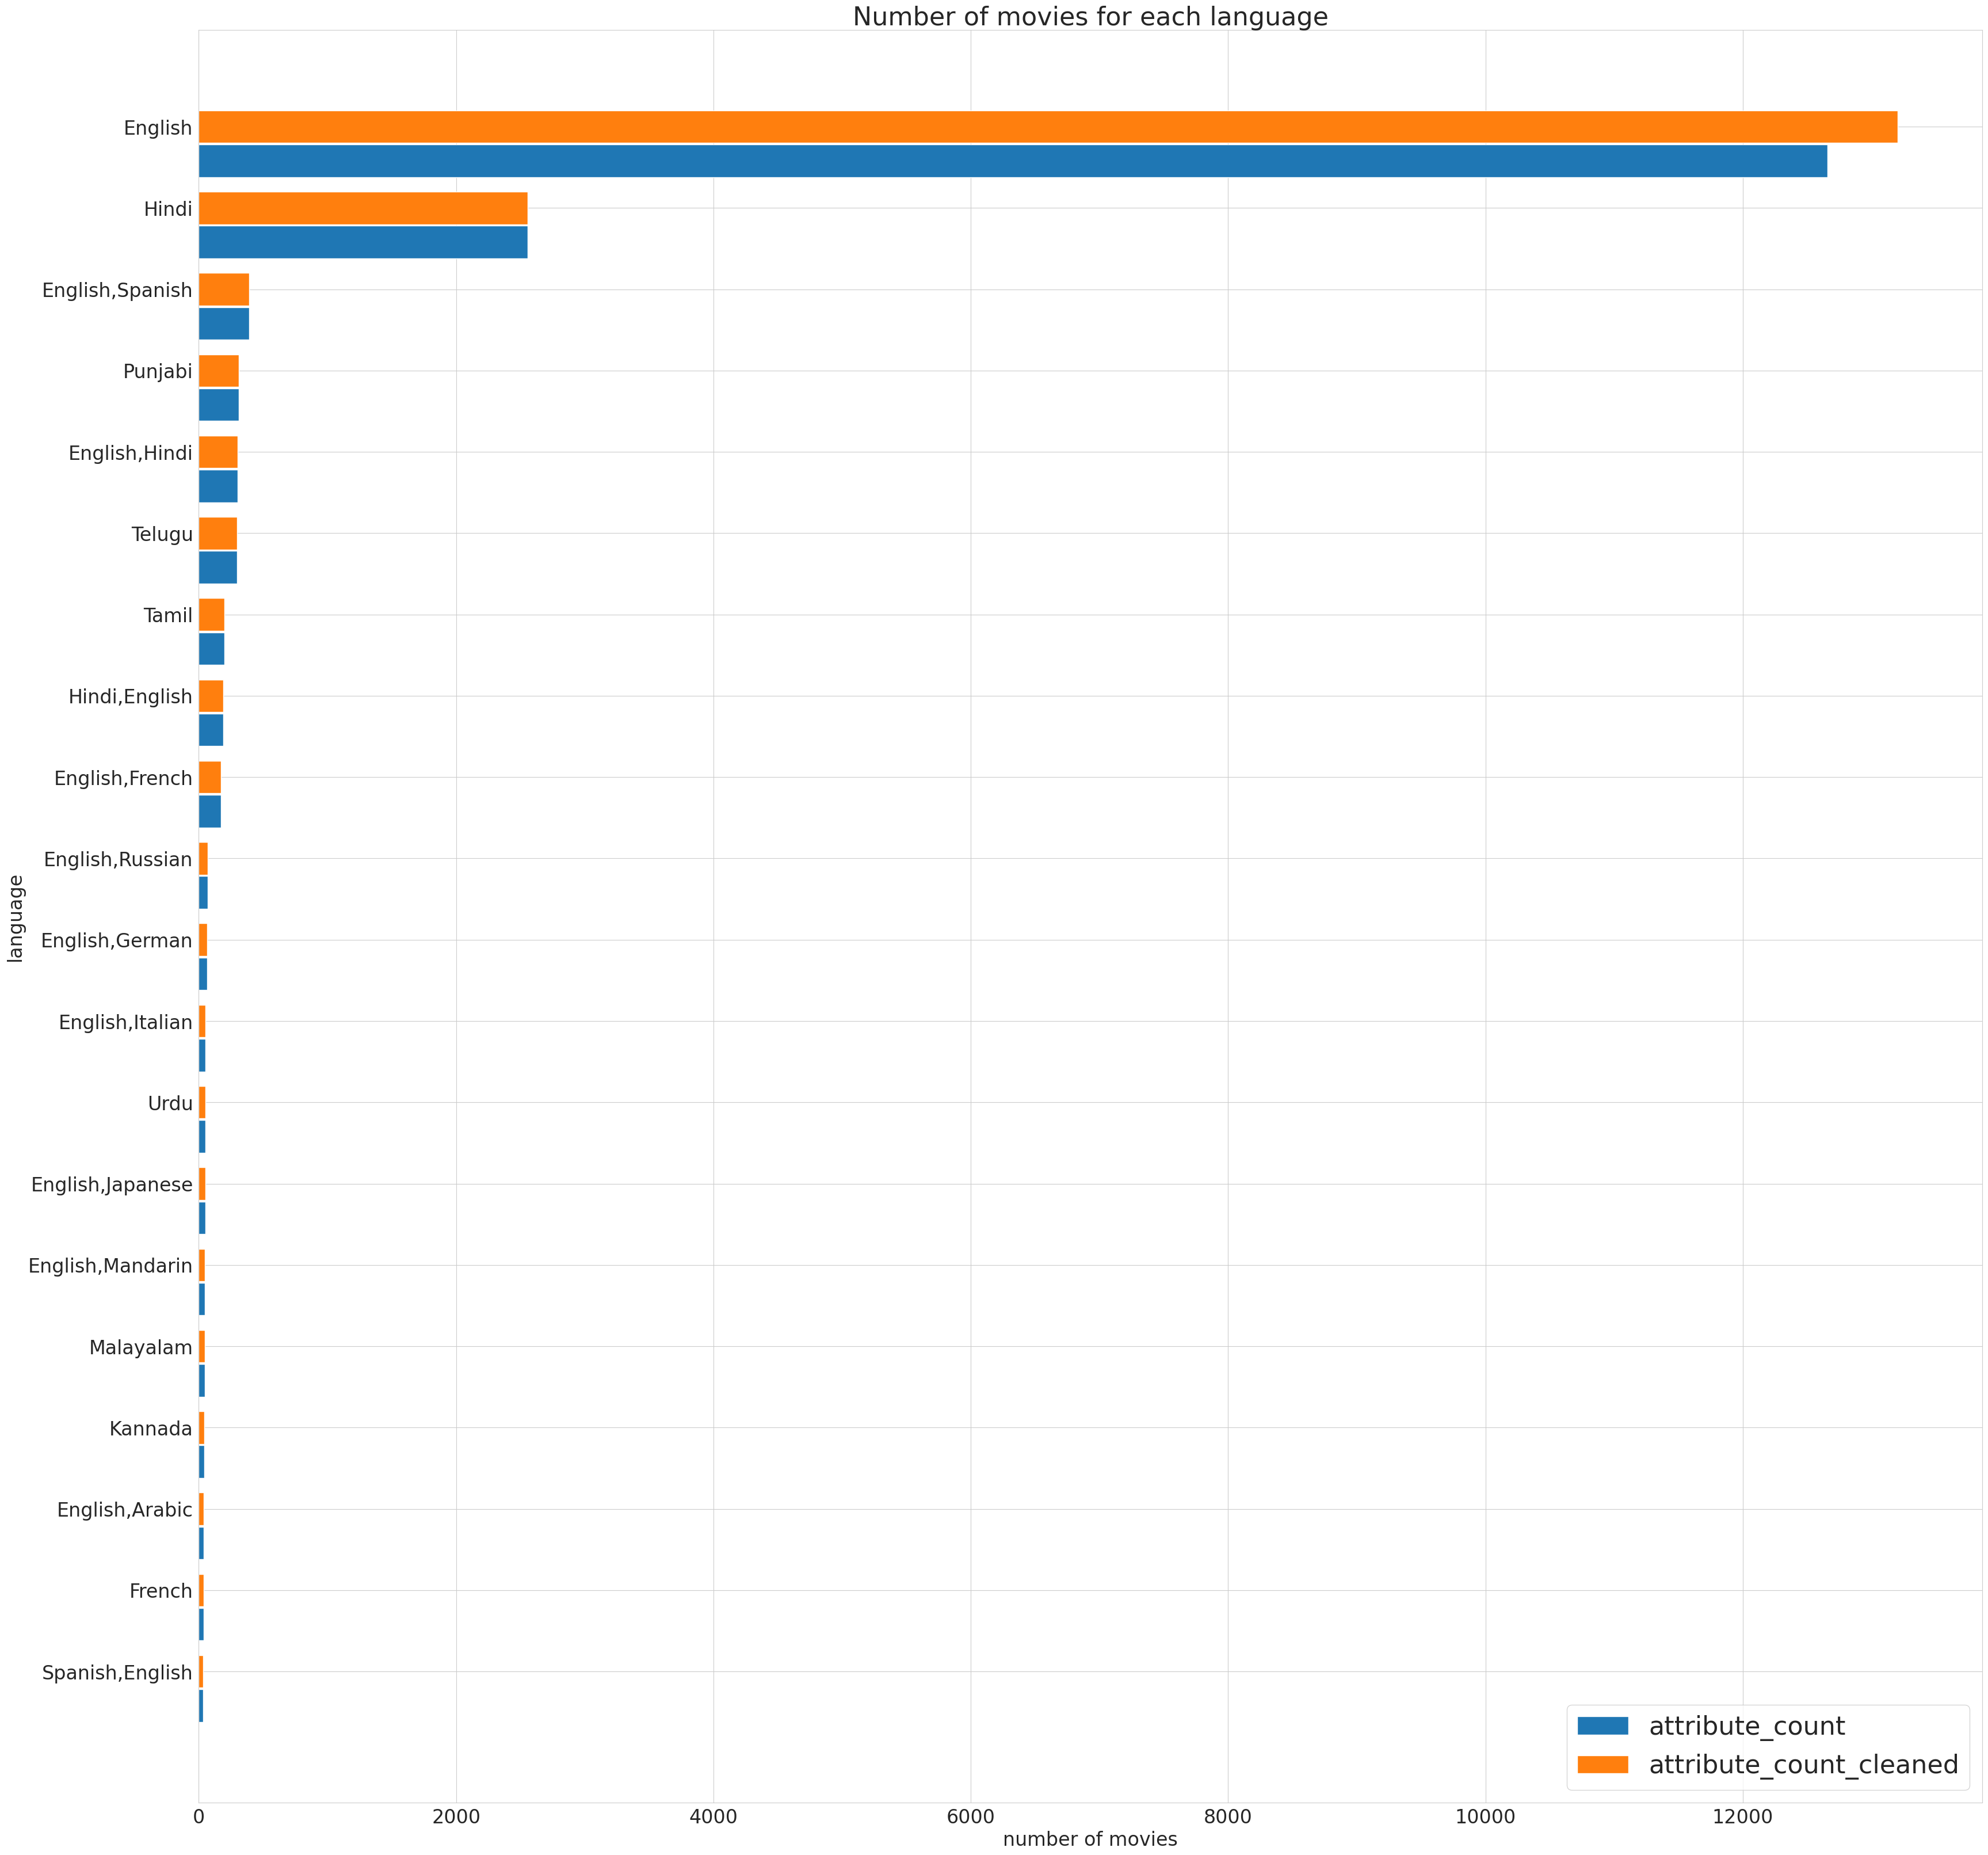

In [111]:
draw_comparison_1('language', data_2=mov_data_HF_replaced,top_n=20)

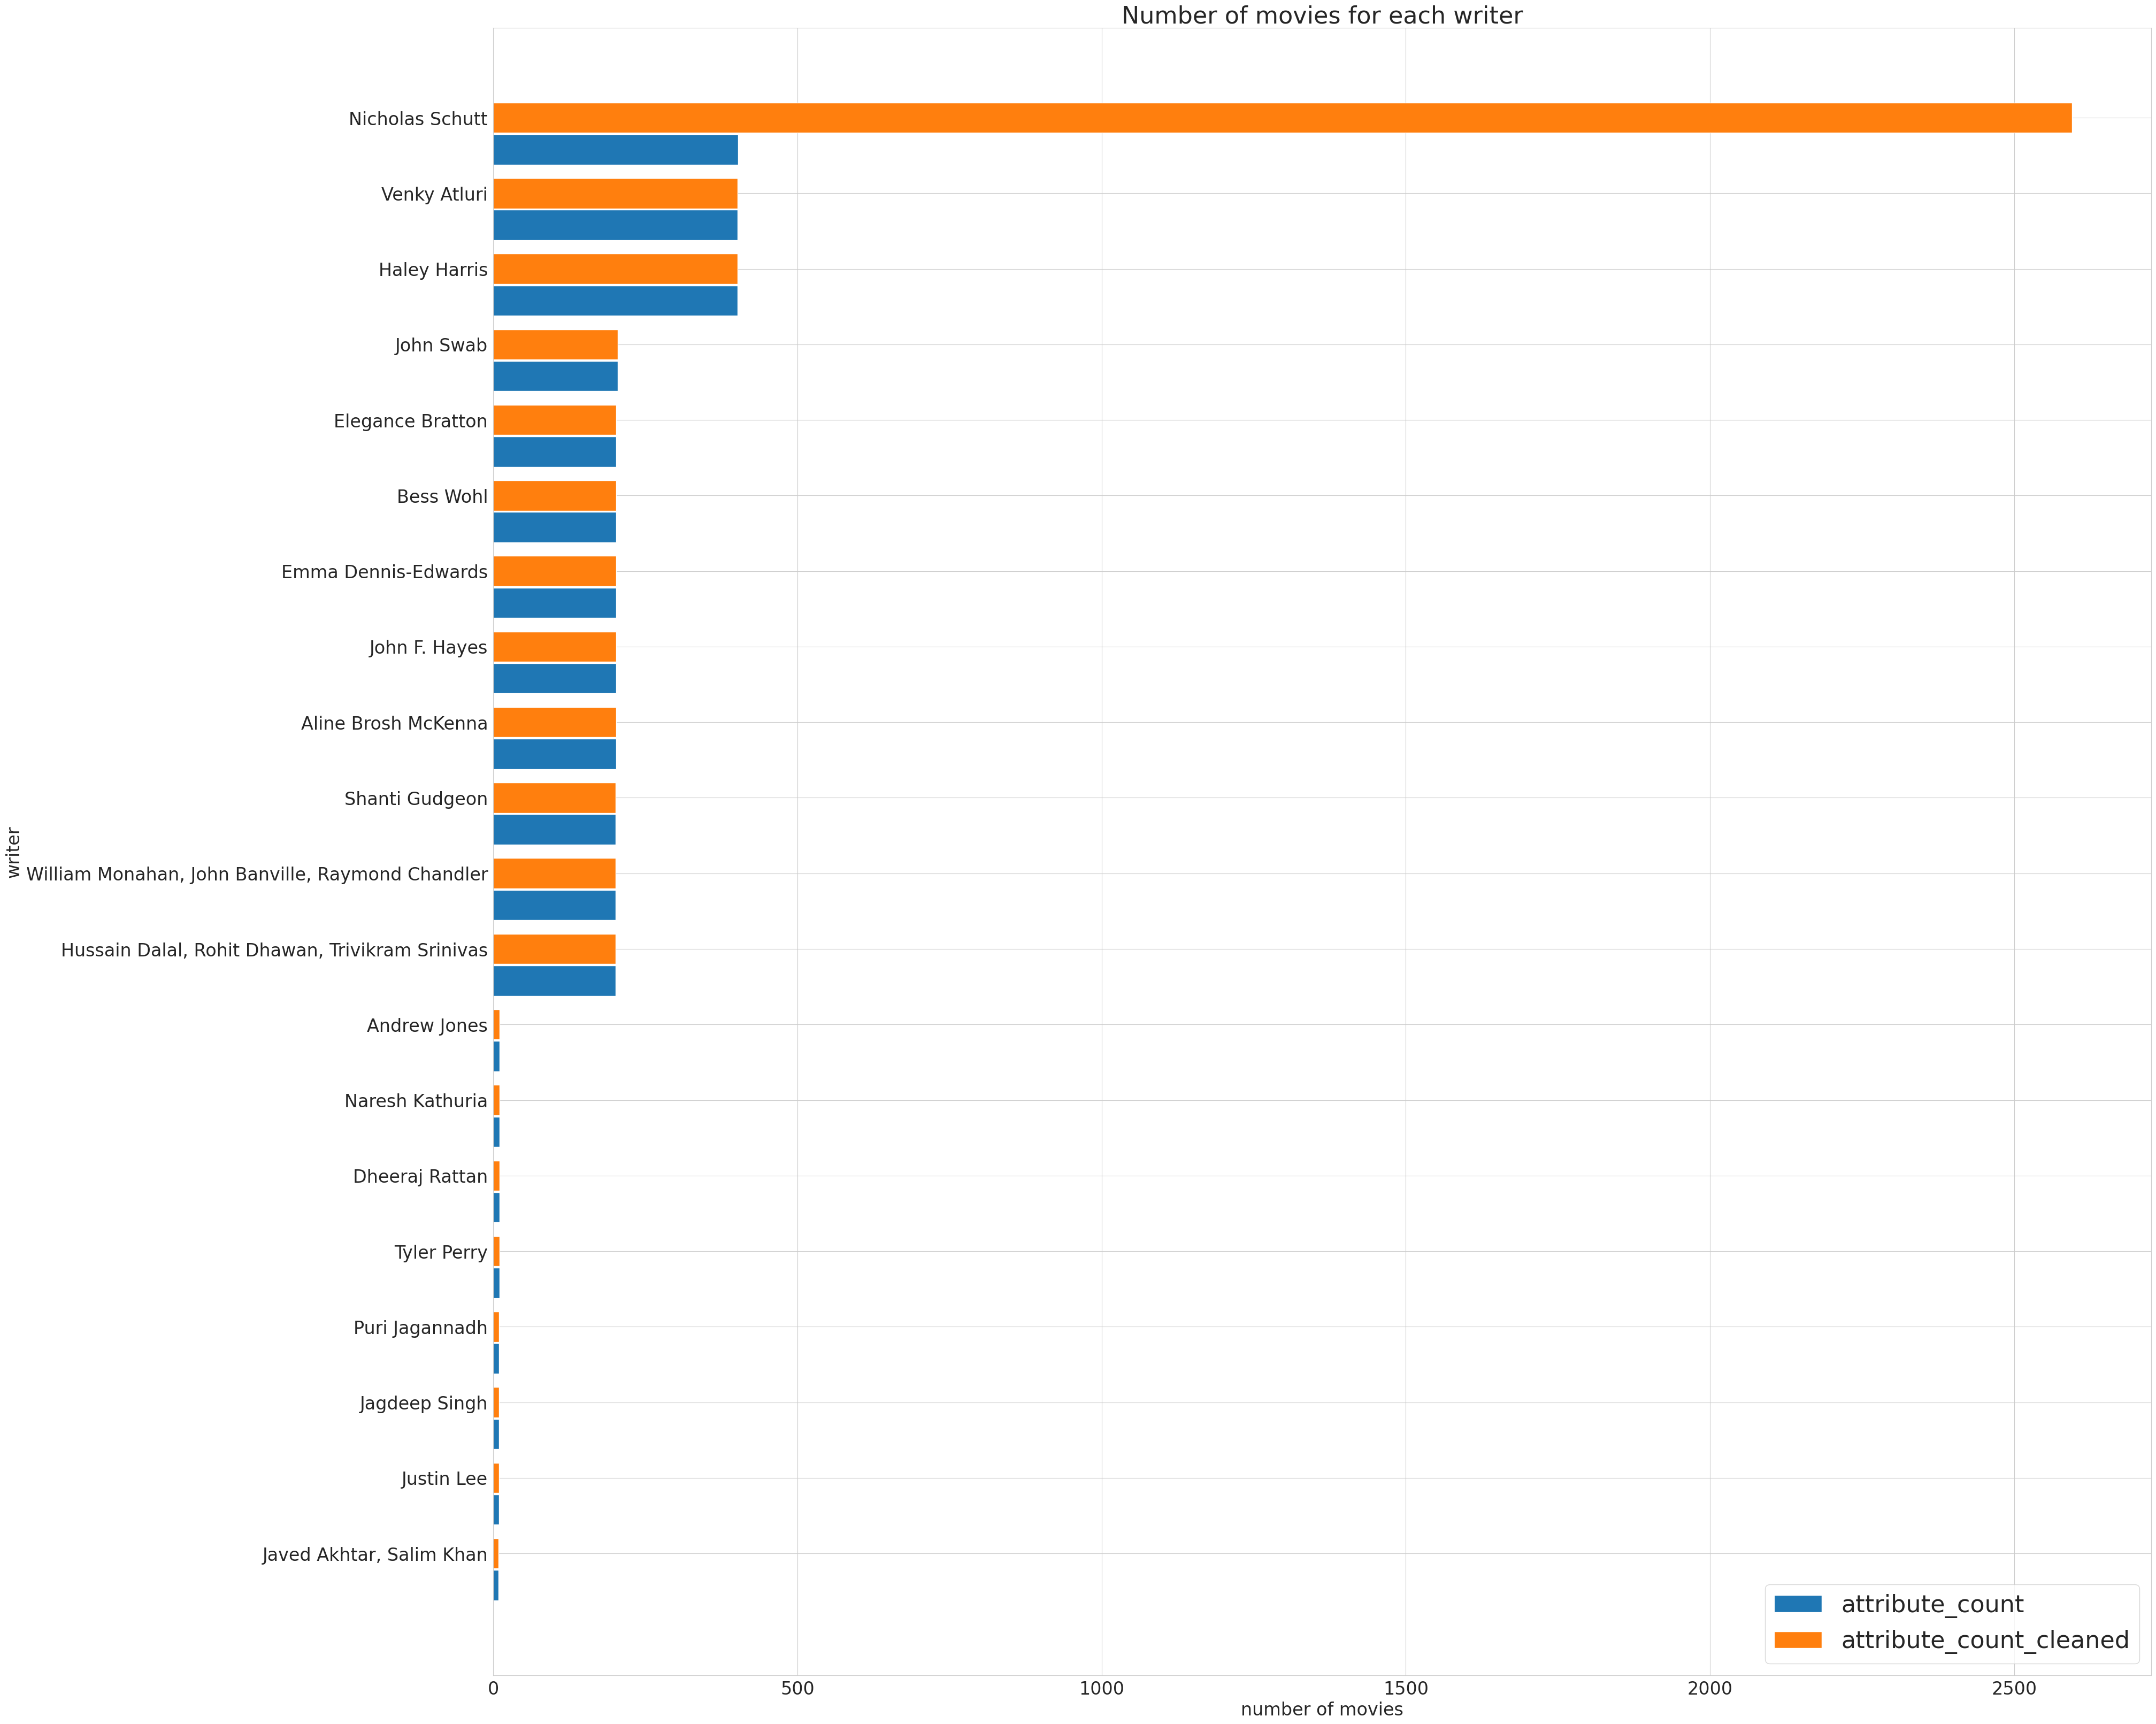

In [112]:
draw_comparison_1('writer',data_2=mov_data_HF_replaced,top_n=20)

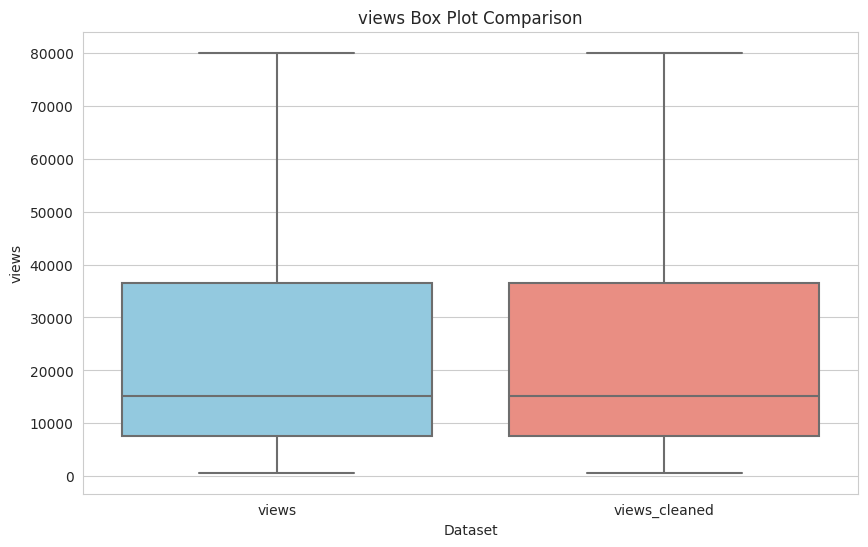

In [82]:
draw_box_comparison('views',showFliers=False,data_1=mov_data,data_2=mov_data_HF_replaced)

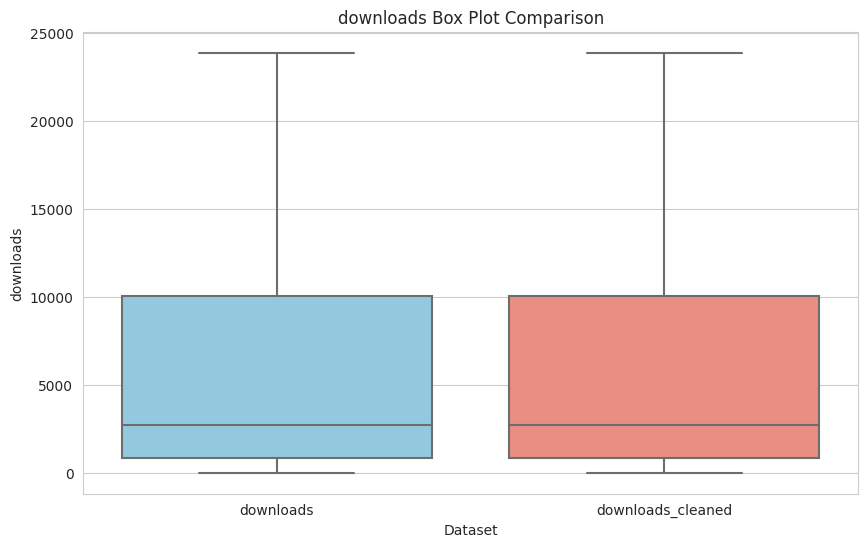

In [83]:
draw_box_comparison('downloads',showFliers=False,data_1=mov_data,data_2=mov_data_HF_replaced)

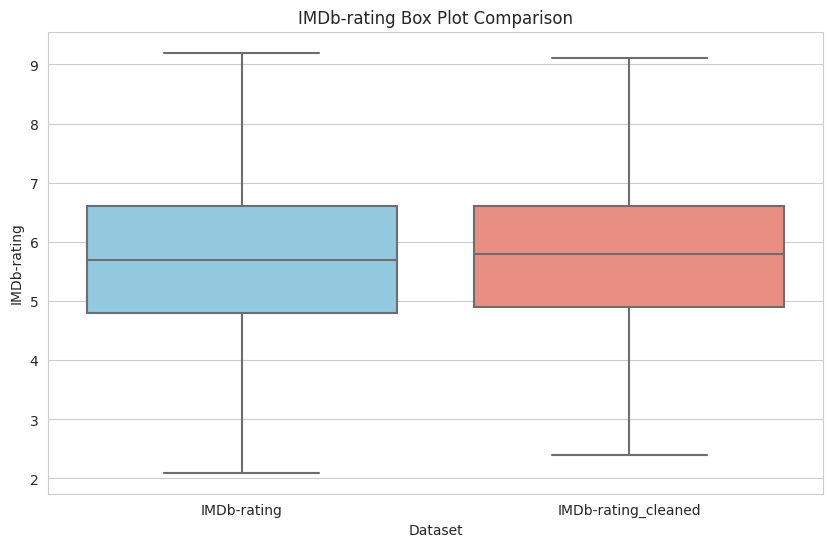

In [84]:
draw_box_comparison('IMDb-rating',showFliers=False,data_1=mov_data,data_2=mov_data_HF_replaced)

## 通过属性的相关关系来填补缺失值

In [85]:
mov_data_attr_corr = copy.deepcopy(mov_data)

In [86]:
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

IMDb-rating      director  downloads      id             industry  \
0          4.8     John Swab      304.0  372092  Hollywood / English   
1          6.4   Paul Ziller       73.0  372091  Hollywood / English   
2          5.2  Ben Wheatley     1427.0  343381  Hollywood / English   
3          8.1  Venky Atluri     1549.0  372090            Tollywood   
4          4.6  Shaji Kailas      657.0  372089            Tollywood   

        language posted_date release_date  run_time  \
0        English  2023-02-20   2023-01-28       105   
1        English  2023-02-20   2023-02-05        84   
2  English,Hindi  2021-04-20   2021-06-18  1h 47min   
3          Hindi  2023-02-20   2023-02-17       139   
4          Hindi  2023-02-20   2023-01-26       122   

                                           storyline  ...  \
0  Doc\r\n facilitates a fragile truce between th...  ...   
1  Caterer\r\n Goldy Berry reunites with detectiv...  ...   
2  As the world searches for a cure to a disastro...  ...   
3  The life of a young man and his struggles agai...  ...   
4  A man named Kalidas gets stranded due to the p...  ...   

  appropriate_for_TV-13  appropriate_for_TV-14 appropriate_for_TV-G  \
0                 False                  False                False   
1                 False                  False                False   
2                 False                  False                False   
3                 False                  False                False   
4                 False                  False                False   

   appropriate_for_TV-MA  appropriate_for_TV-PG  appropriate_for_TV-Y  \
0                  False                  False                 False   
1                  False                   True                 False   
2                  False                  False                 False   
3                  False                  False                 False   
4                  False                  False                 False   

   appropriate_for_TV-Y7  appropriate_for_TV-Y7-FV  appropriate_for_Unrated  \
0                  False                     False                    False   
1                  False                     False                    False   
2                  False                     False                    False   
3                  False                     False                    False   
4                  False                     False                    False   

   appropriate_for_nan  
0                False  
1                False  
2                False  
3                 True  
4                 True  

[5 rows x 34 columns]

In [116]:
df_coded.corr(method='spearman', numeric_only=True)

IMDb-rating  downloads     views  \
IMDb-rating                        1.000000   0.055112  0.014251   
downloads                          0.055112   1.000000  0.932468   
views                              0.014251   0.932468  1.000000   
appropriate_for_Approved           0.023950   0.010468  0.008640   
appropriate_for_Drama             -0.005219  -0.005535 -0.001526   
appropriate_for_Drama, Romance     0.007588   0.004985  0.007899   
appropriate_for_G                  0.041430   0.052592  0.031512   
appropriate_for_MA-17             -0.006480   0.003614  0.003000   
appropriate_for_NC-17              0.008884   0.009131  0.010189   
appropriate_for_Not Rated         -0.030294   0.313128  0.313190   
appropriate_for_PG                 0.042933   0.066343  0.066869   
appropriate_for_PG-13              0.094077   0.143987  0.148471   
appropriate_for_Passed             0.019590   0.004211  0.000530   
appropriate_for_R                  0.035372   0.008365  0.006465   
appropriate_for_TV-13             -0.012301   0.006711  0.009146   
appropriate_for_TV-14              0.062572  -0.100569 -0.075212   
appropriate_for_TV-G               0.022403  -0.039781 -0.035488   
appropriate_for_TV-MA             -0.028109  -0.001295  0.025848   
appropriate_for_TV-PG              0.012746   0.004771  0.007788   
appropriate_for_TV-Y               0.000050   0.025847  0.023056   
appropriate_for_TV-Y7              0.009807   0.023954  0.024461   
appropriate_for_TV-Y7-FV          -0.001535  -0.001365 -0.001946   
appropriate_for_Unrated           -0.045874   0.024269  0.032467   
appropriate_for_nan               -0.108043  -0.287122 -0.303708   

                                appropriate_for_Approved  \
IMDb-rating                                     0.023950   
downloads                                       0.010468   
views                                           0.008640   
appropriate_for_Approved                        1.000000   
appropriate_for_Drama                          -0.000146   
appropriate_for_Drama, Romance                 -0.000146   
appropriate_for_G                              -0.001807   
appropriate_for_MA-17                          -0.000146   
appropriate_for_NC-17                          -0.000292   
appropriate_for_Not Rated                      -0.007141   
appropriate_for_PG                             -0.004444   
appropriate_for_PG-13                          -0.006813   
appropriate_for_Passed                         -0.000253   
appropriate_for_R                              -0.010902   
appropriate_for_TV-13                          -0.000146   
appropriate_for_TV-14                          -0.003914   
appropriate_for_TV-G                           -0.001457   
appropriate_for_TV-MA                          -0.002972   
appropriate_for_TV-PG                          -0.001570   
appropriate_for_TV-Y                           -0.000731   
appropriate_for_TV-Y7                          -0.000981   
appropriate_for_TV-Y7-FV                       -0.000253   
appropriate_for_Unrated                        -0.001683   
appropriate_for_nan                            -0.019366   

                                appropriate_for_Drama  \
IMDb-rating                                 -0.005219   
downloads                                   -0.005535   
views                                       -0.001526   
appropriate_for_Approved                    -0.000146   
appropriate_for_Drama                        1.000000   
appropriate_for_Drama, Romance              -0.000049   
appropriate_for_G                           -0.000602   
appropriate_for_MA-17                       -0.000049   
appropriate_for_NC-17                       -0.000097   
appropriate_for_Not Rated                   -0.002380   
appropriate_for_PG                          -0.001481   
appropriate_for_PG-13                       -0.002270   
appropriate_for_Passed                      -0.000084   
appropriate_for_R               

Text(0.5, 1.0, 'Correlation Analysis')

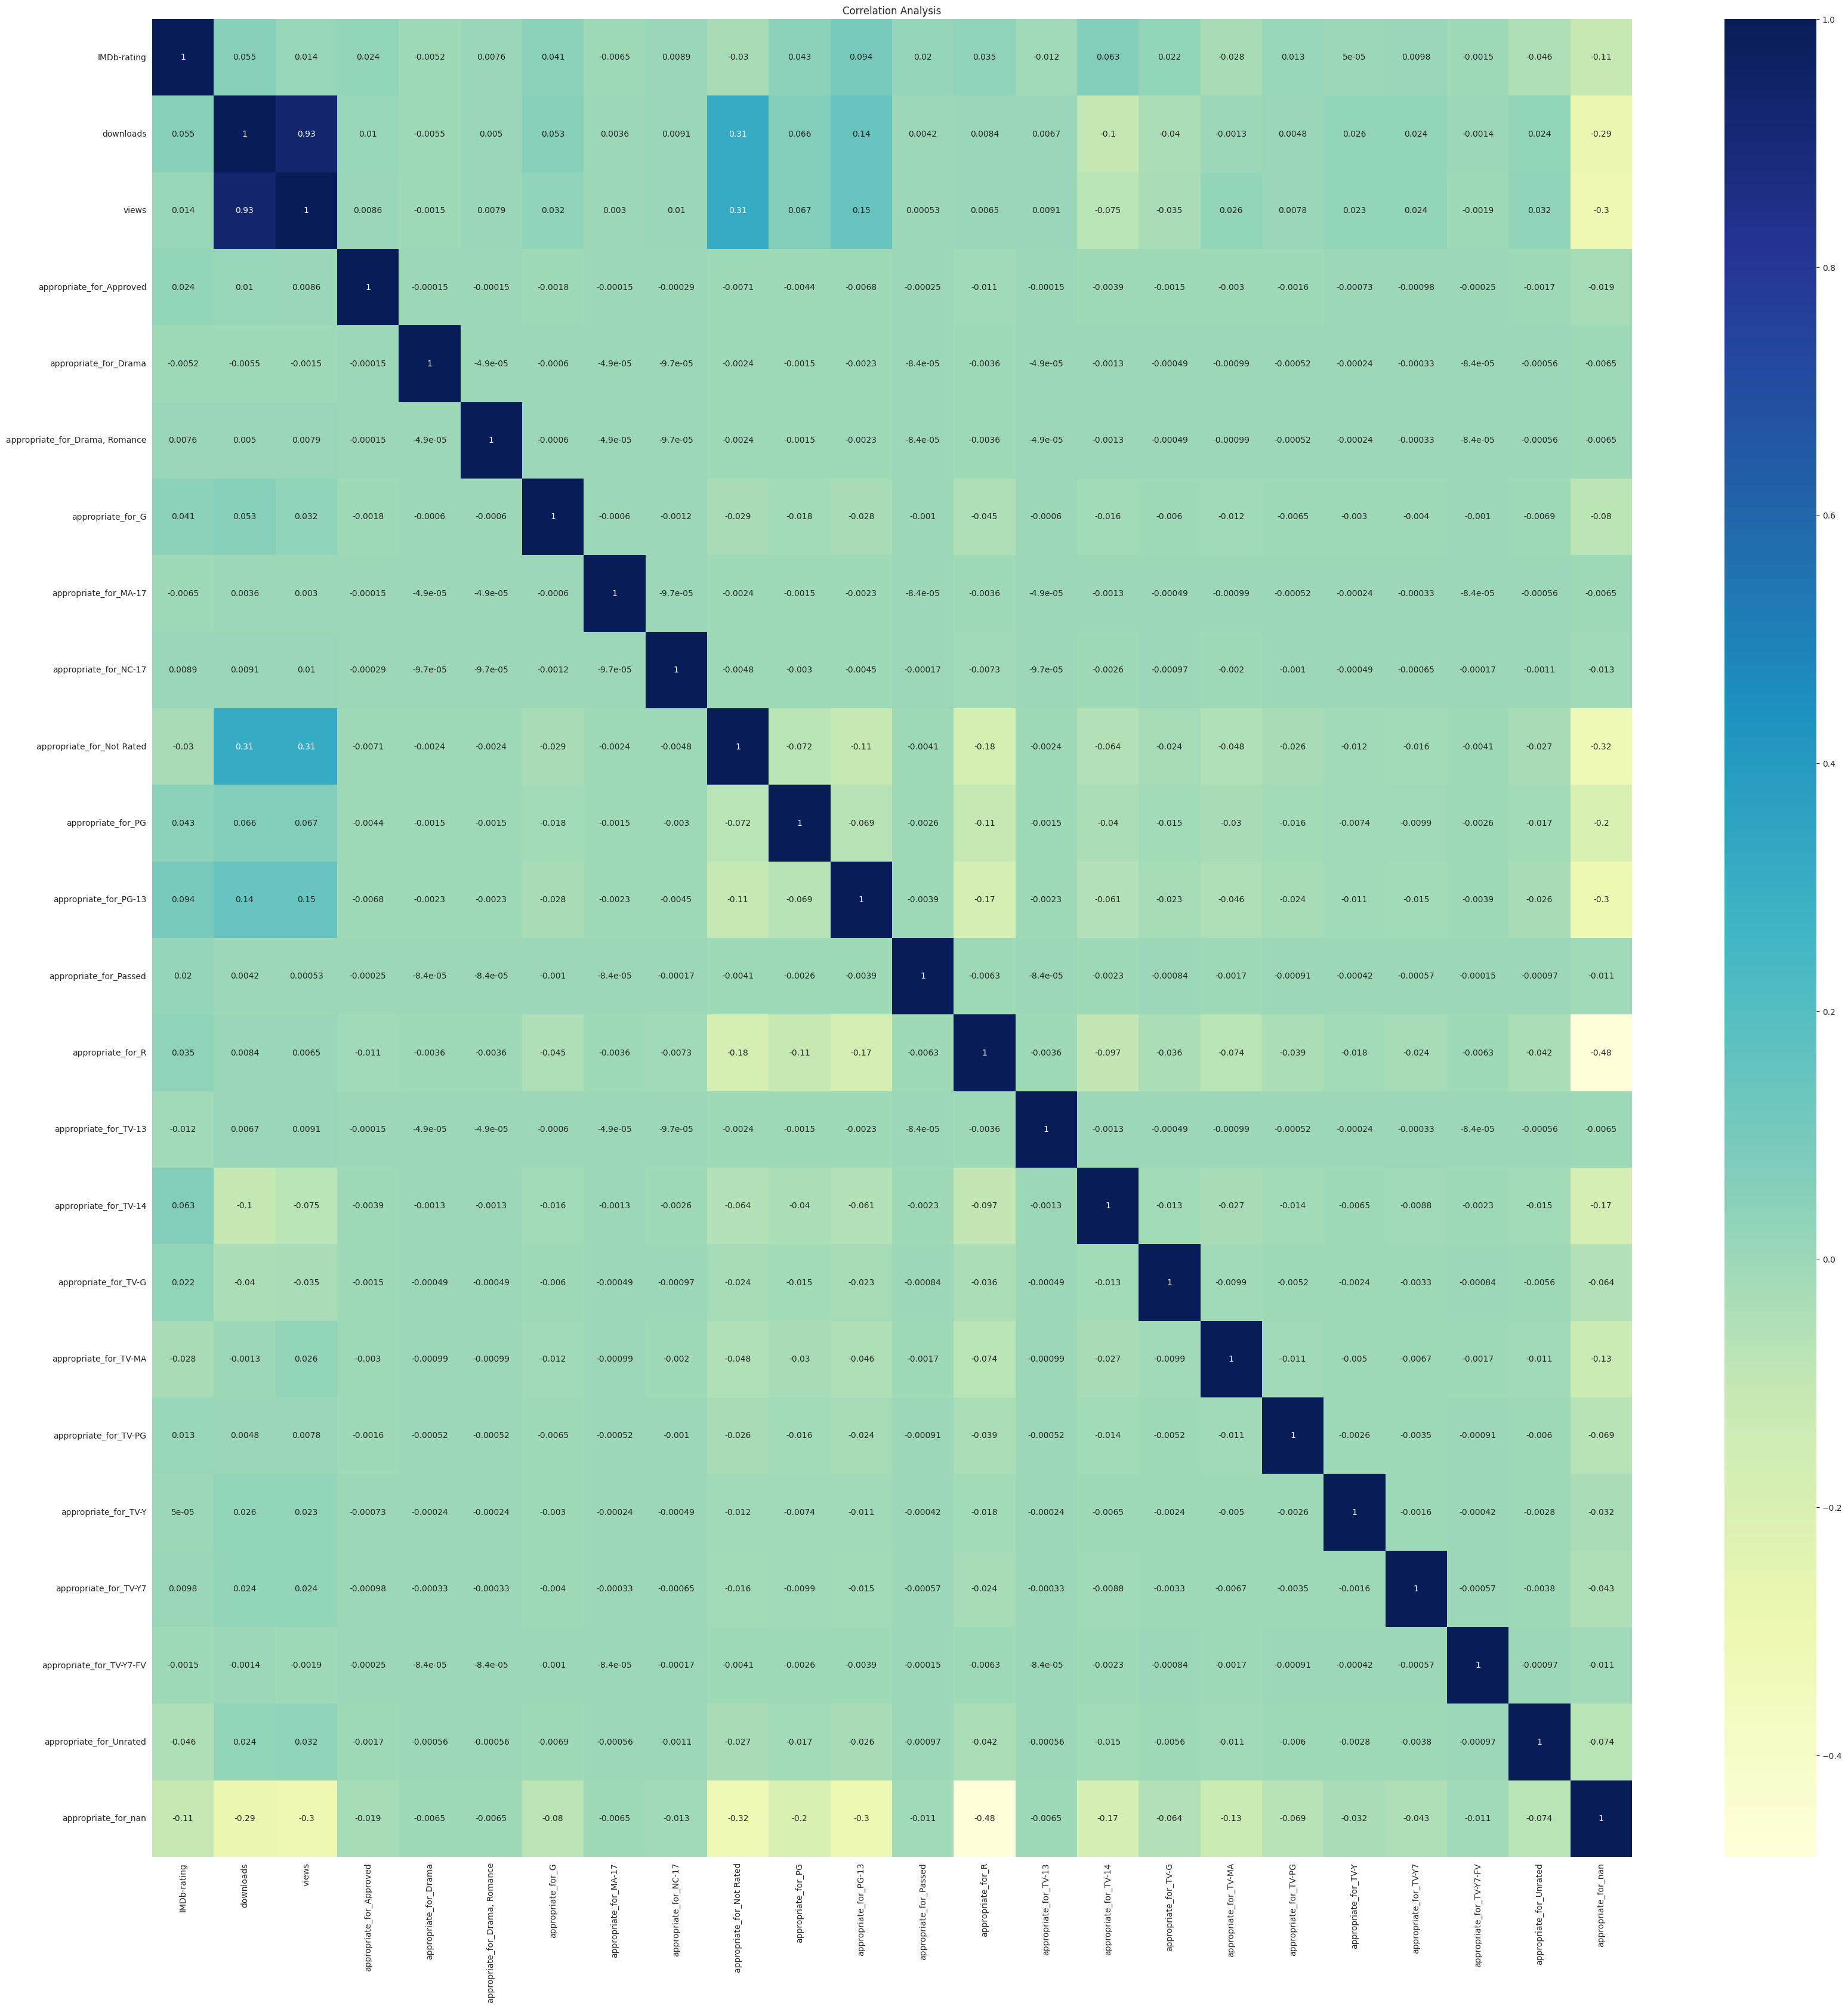

In [118]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_coded.corr(method='spearman', numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')

In [121]:
def Correlation_analysis(dataset=mov_data_attr_corr, attribute_name='appropriate_for'):
    df_coded = pd.get_dummies(dataset, columns=[attribute_name], dummy_na=True, drop_first=True)
    df_coded.head()

    plt.figure(figsize=(40, 40))
    sns.heatmap(df_coded.corr(method='spearman', numeric_only=True), cmap='YlGnBu', annot=True)
    plt.title('Correlation Analysis')

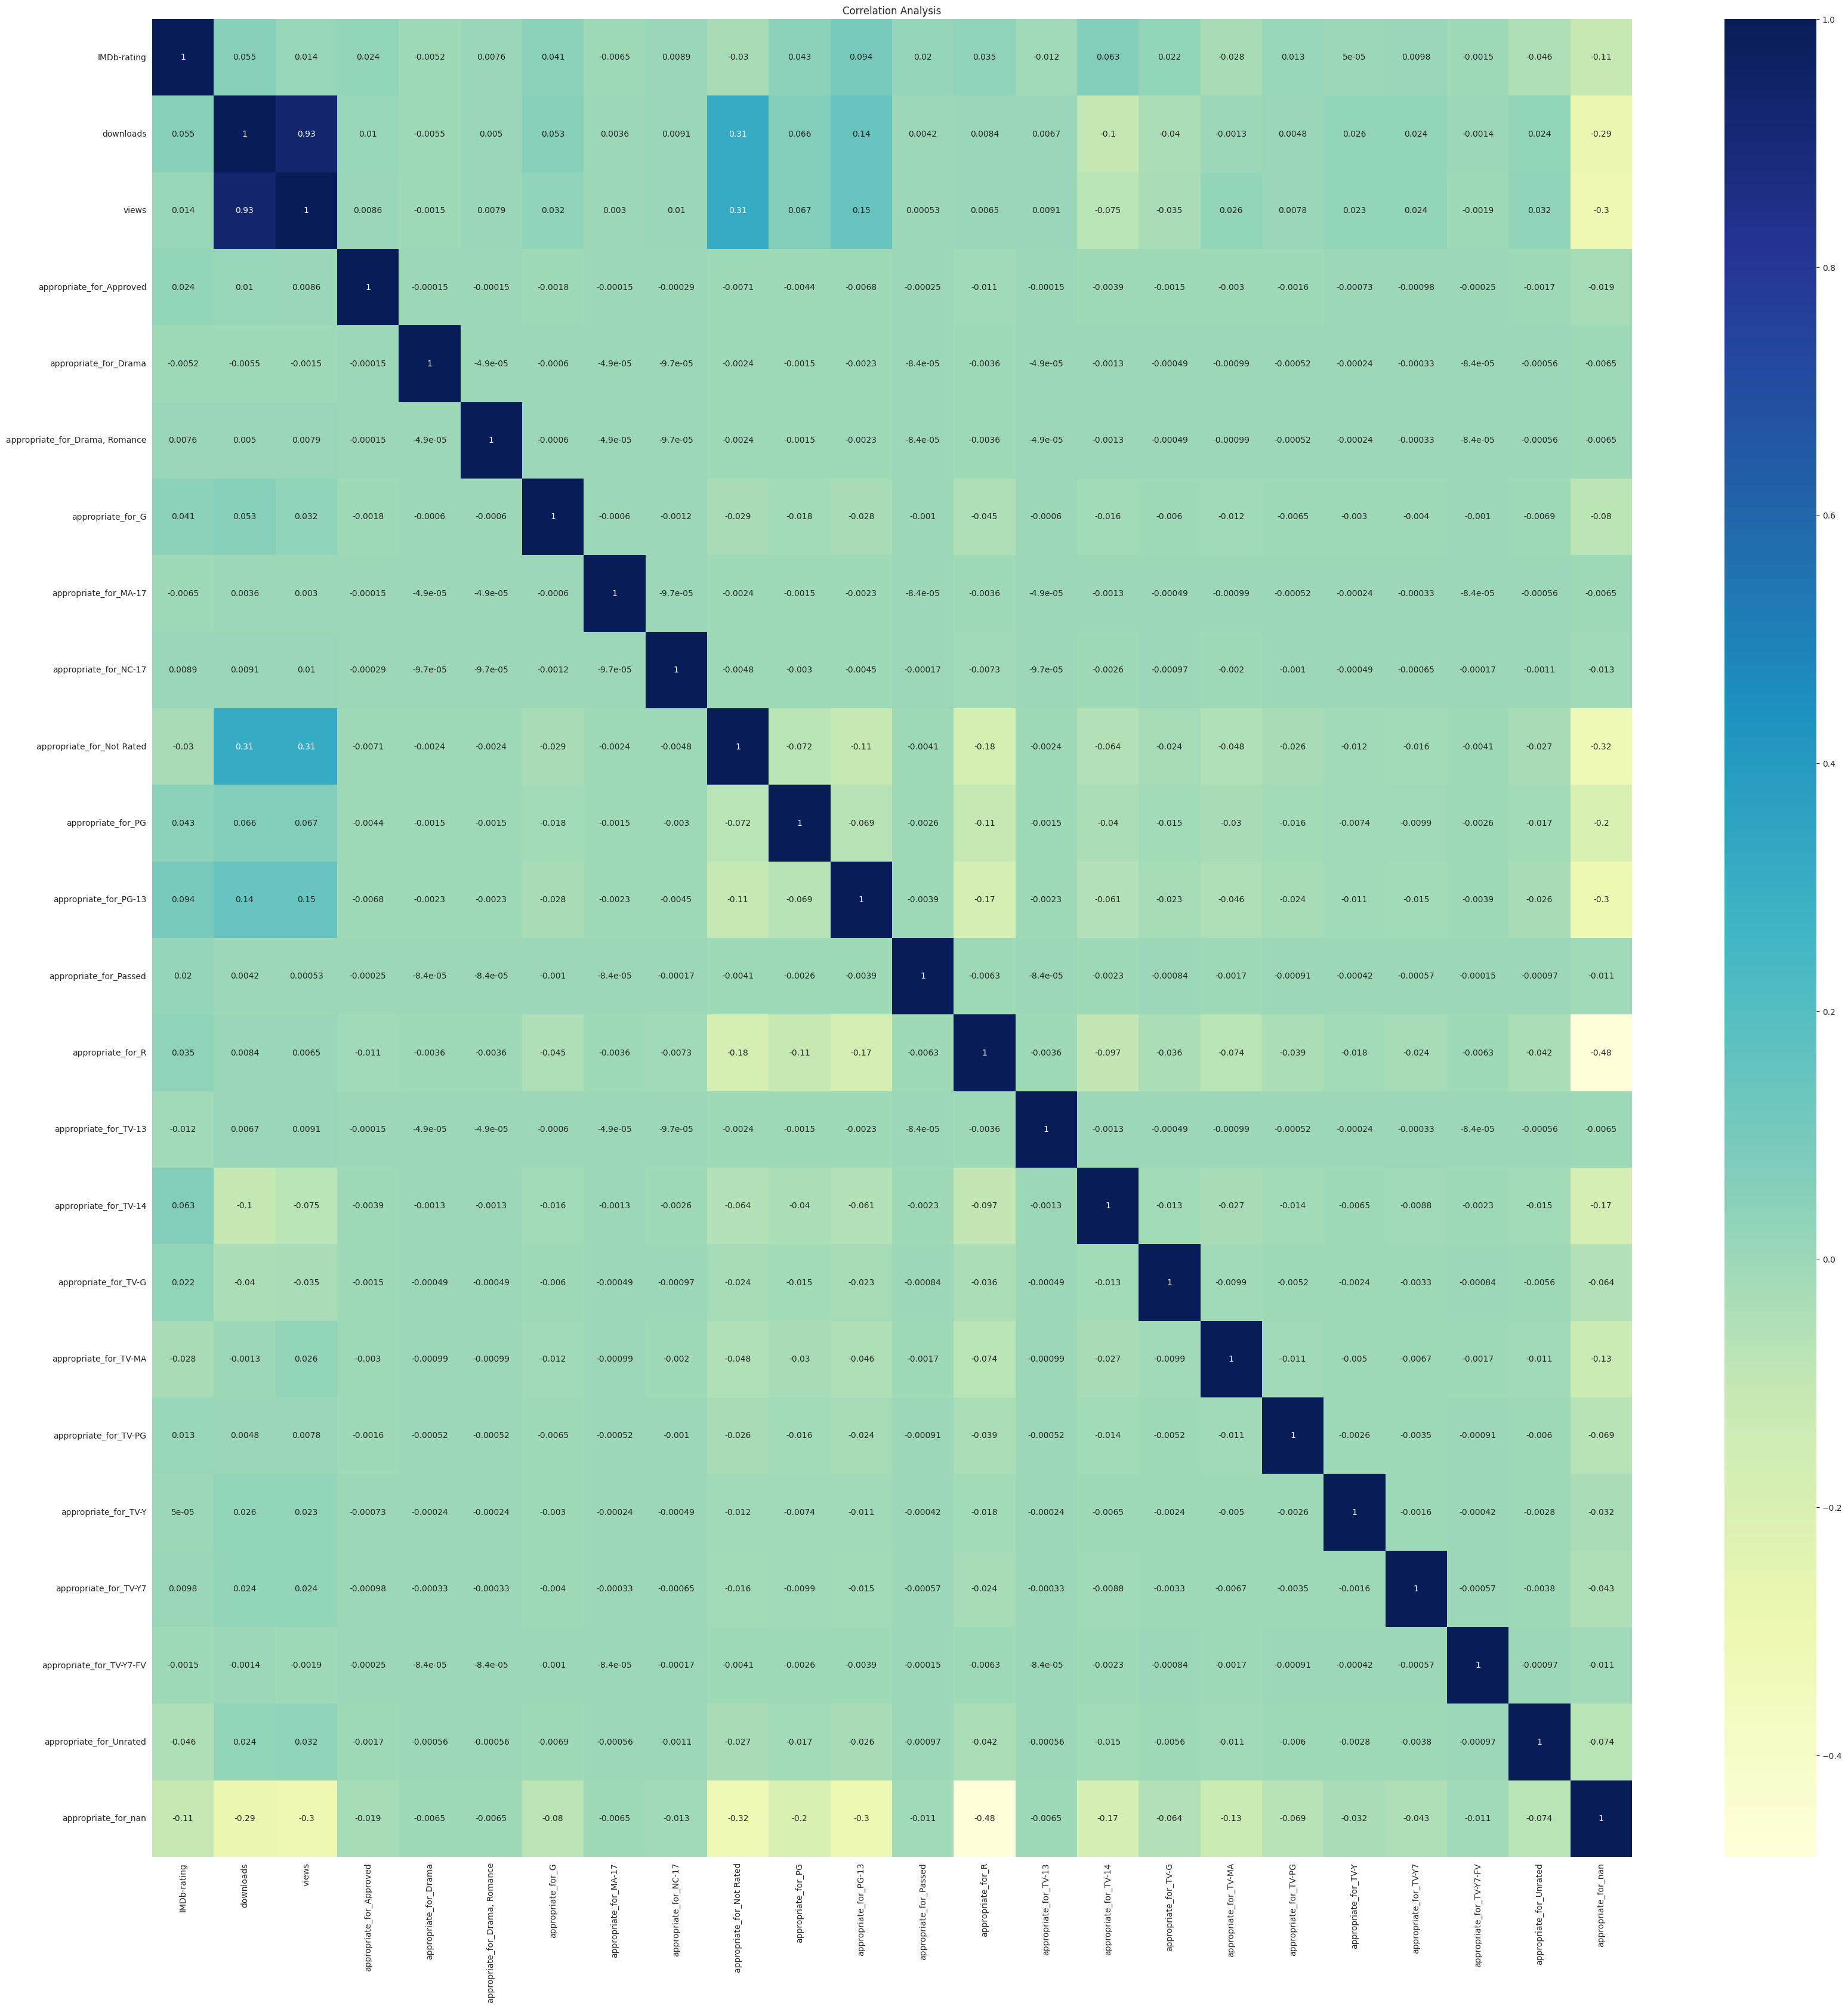

In [122]:
Correlation_analysis(attribute_name='appropriate_for')

可以看出，appropriate_for属性间的相关性较弱，与其他数值属性的相关性也较弱，因此不适合使用相关关系对空值进行填充。

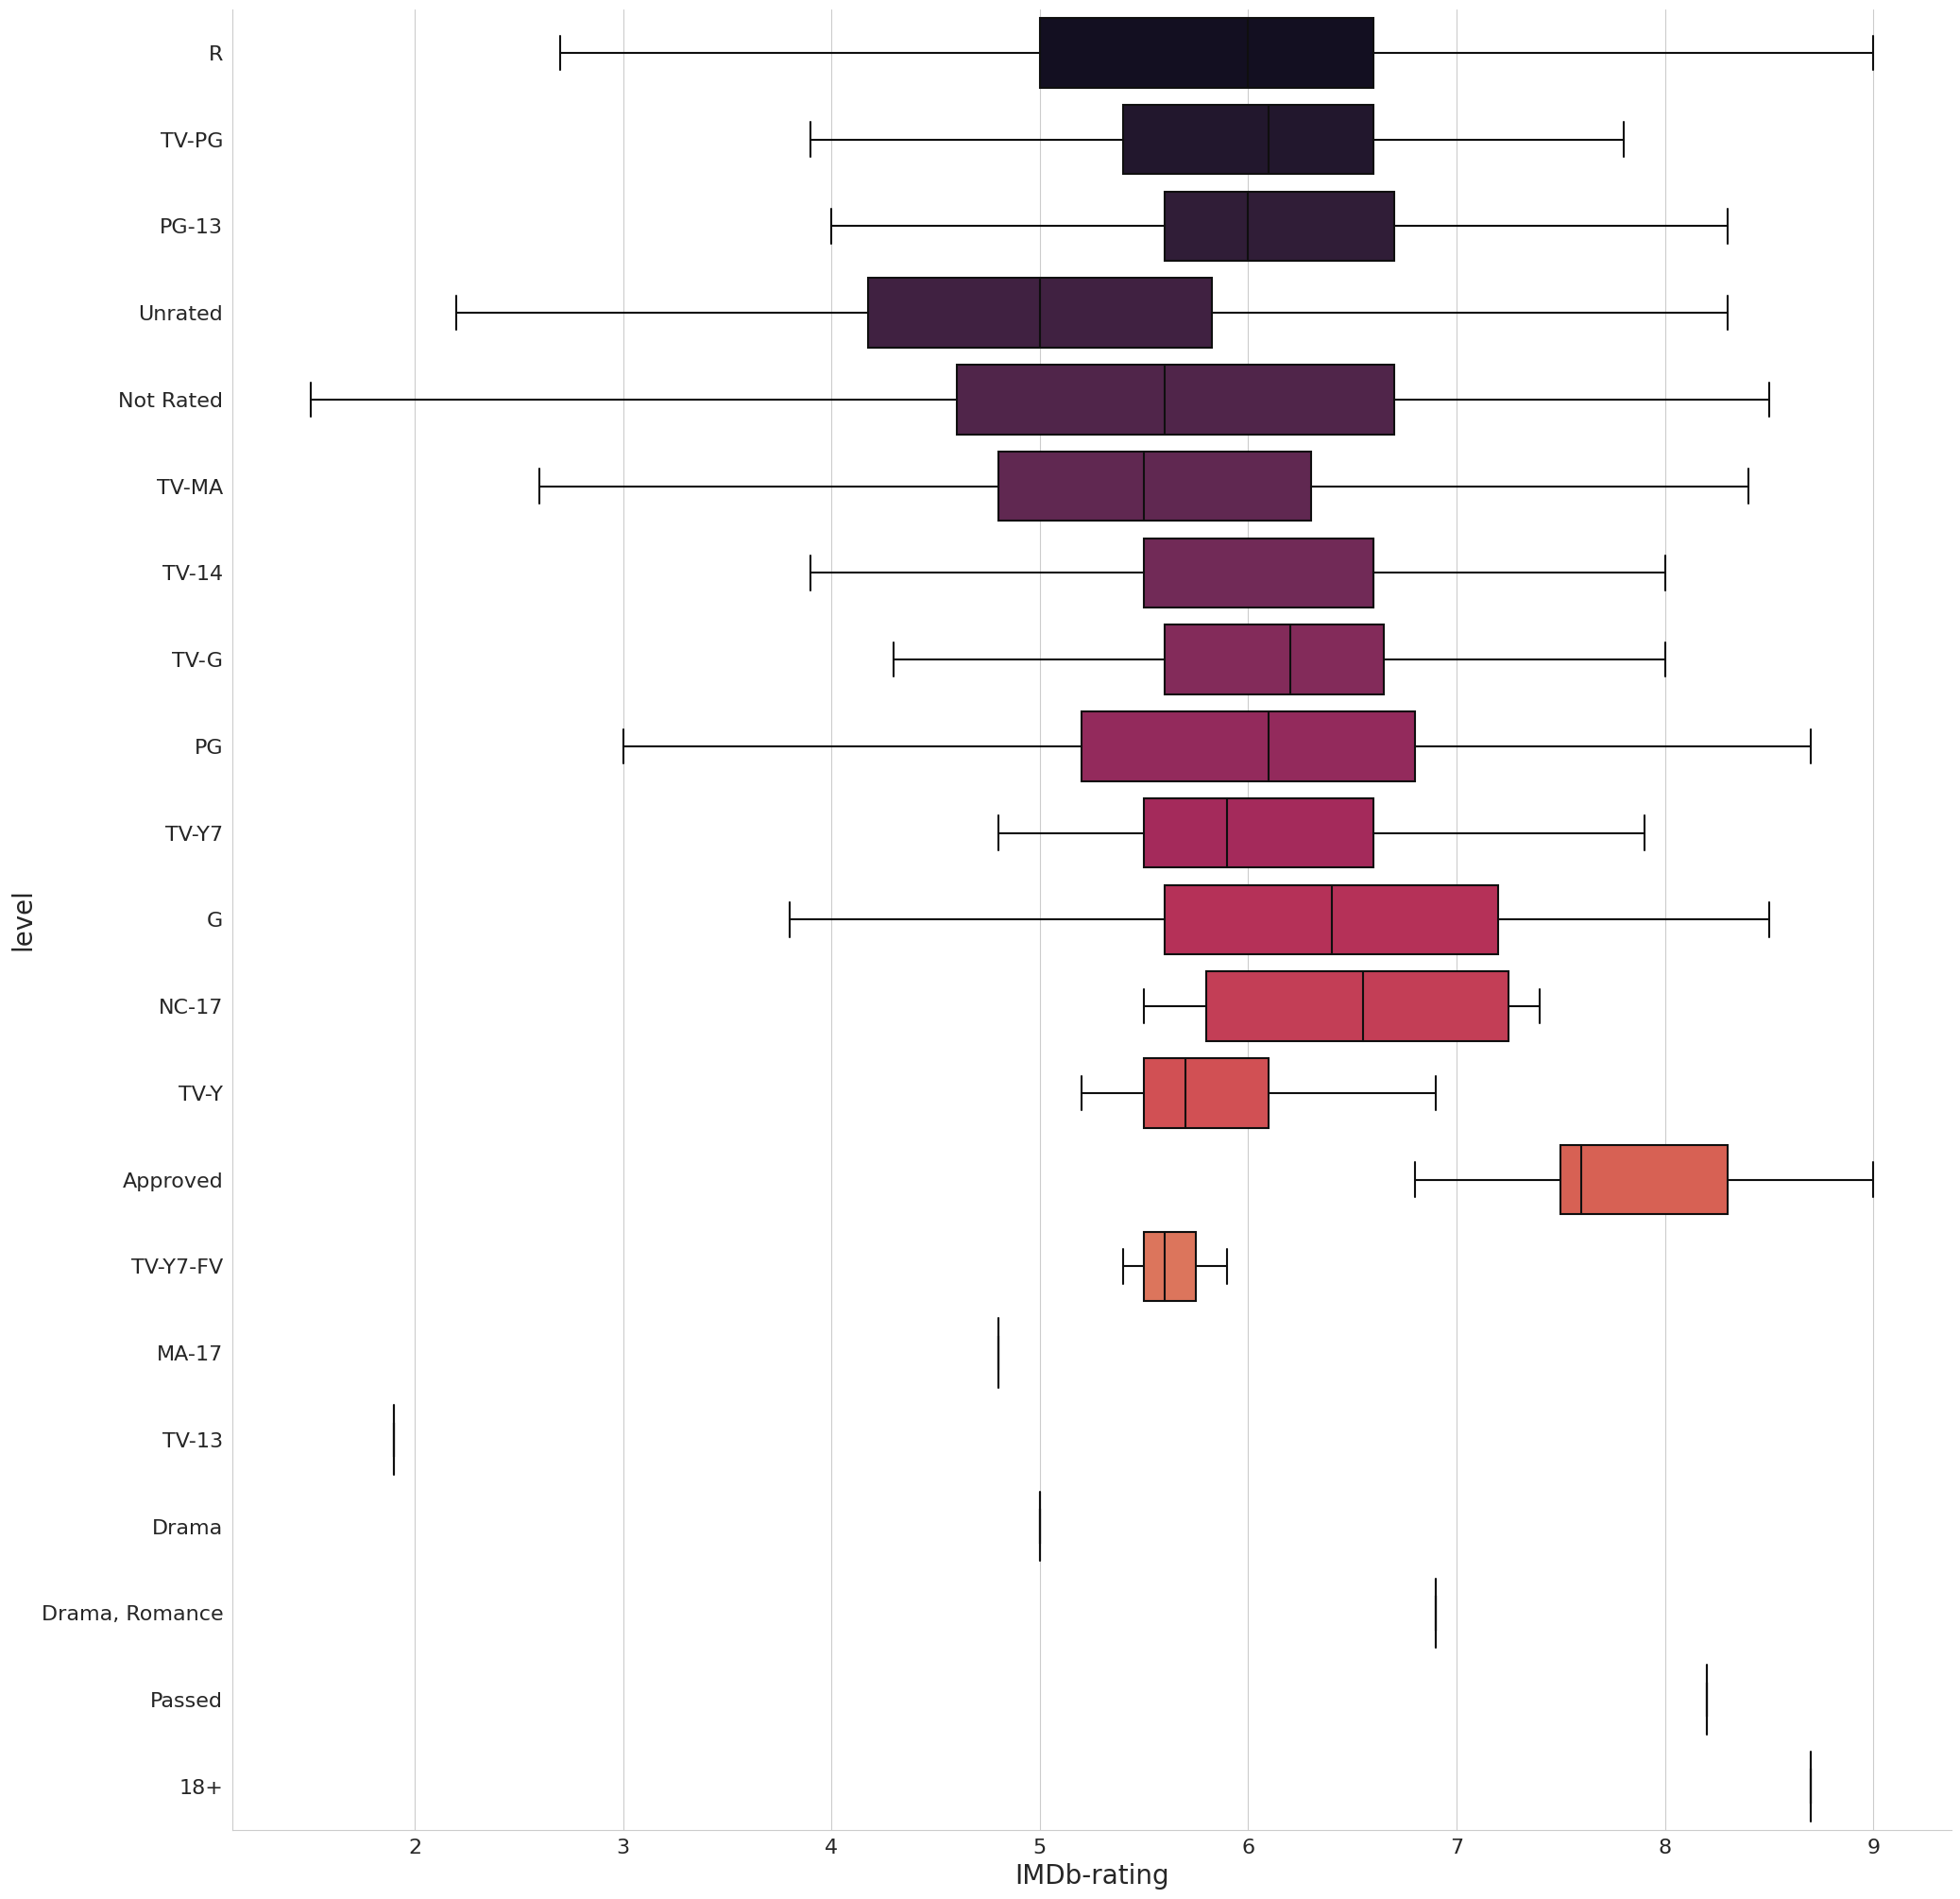

In [123]:
sns.set_style("whitegrid")
level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket', sym='')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('level', fontsize=20, )
plt.xlabel('IMDb-rating', fontsize=20)
plt.show()

In [124]:
df1 = mov_data_attr_corr.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

avg
appropriate_for          
18+              8.700000
Approved         7.411111
Drama            5.000000
Drama, Romance   6.900000
G                6.336842
MA-17            4.800000
NC-17            6.500000
Not Rated        5.592997
PG               5.974179
PG-13            6.077863
Passed           8.200000
R                5.805686
TV-13            1.900000
TV-14            6.023775
TV-G             6.076768
TV-MA            5.477833
TV-PG            5.922807
TV-Y             5.708000
TV-Y7            5.964444
TV-Y7-FV         5.633333
Unrated          5.002273

In [127]:
mov_data_attr_corr = mov_data.copy()  # 创建一个副本以避免在原始DataFrame上直接修改
for i in range(len(mov_data_attr_corr)):
    if pd.isna(mov_data_attr_corr['appropriate_for'].iloc[i]):  # 使用pd.isna来检查NA值
        rate = mov_data_attr_corr['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr.loc[i, 'appropriate_for'] = df1.index[idx]  # 使用.loc来确保在原始DataFrame上赋值

# 计算'appropriate_for'属性的值的计数
value_counts = mov_data_attr_corr['appropriate_for'].value_counts()
print(value_counts)


appropriate_for
R                 4579
Not Rated         2357
PG-13             2355
MA-17             2181
18+               1468
TV-MA             1266
PG                 886
TV-14              880
Drama              753
Unrated            533
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-G                99
TV-Y7               45
TV-Y7-FV             3
Name: count, dtype: int64


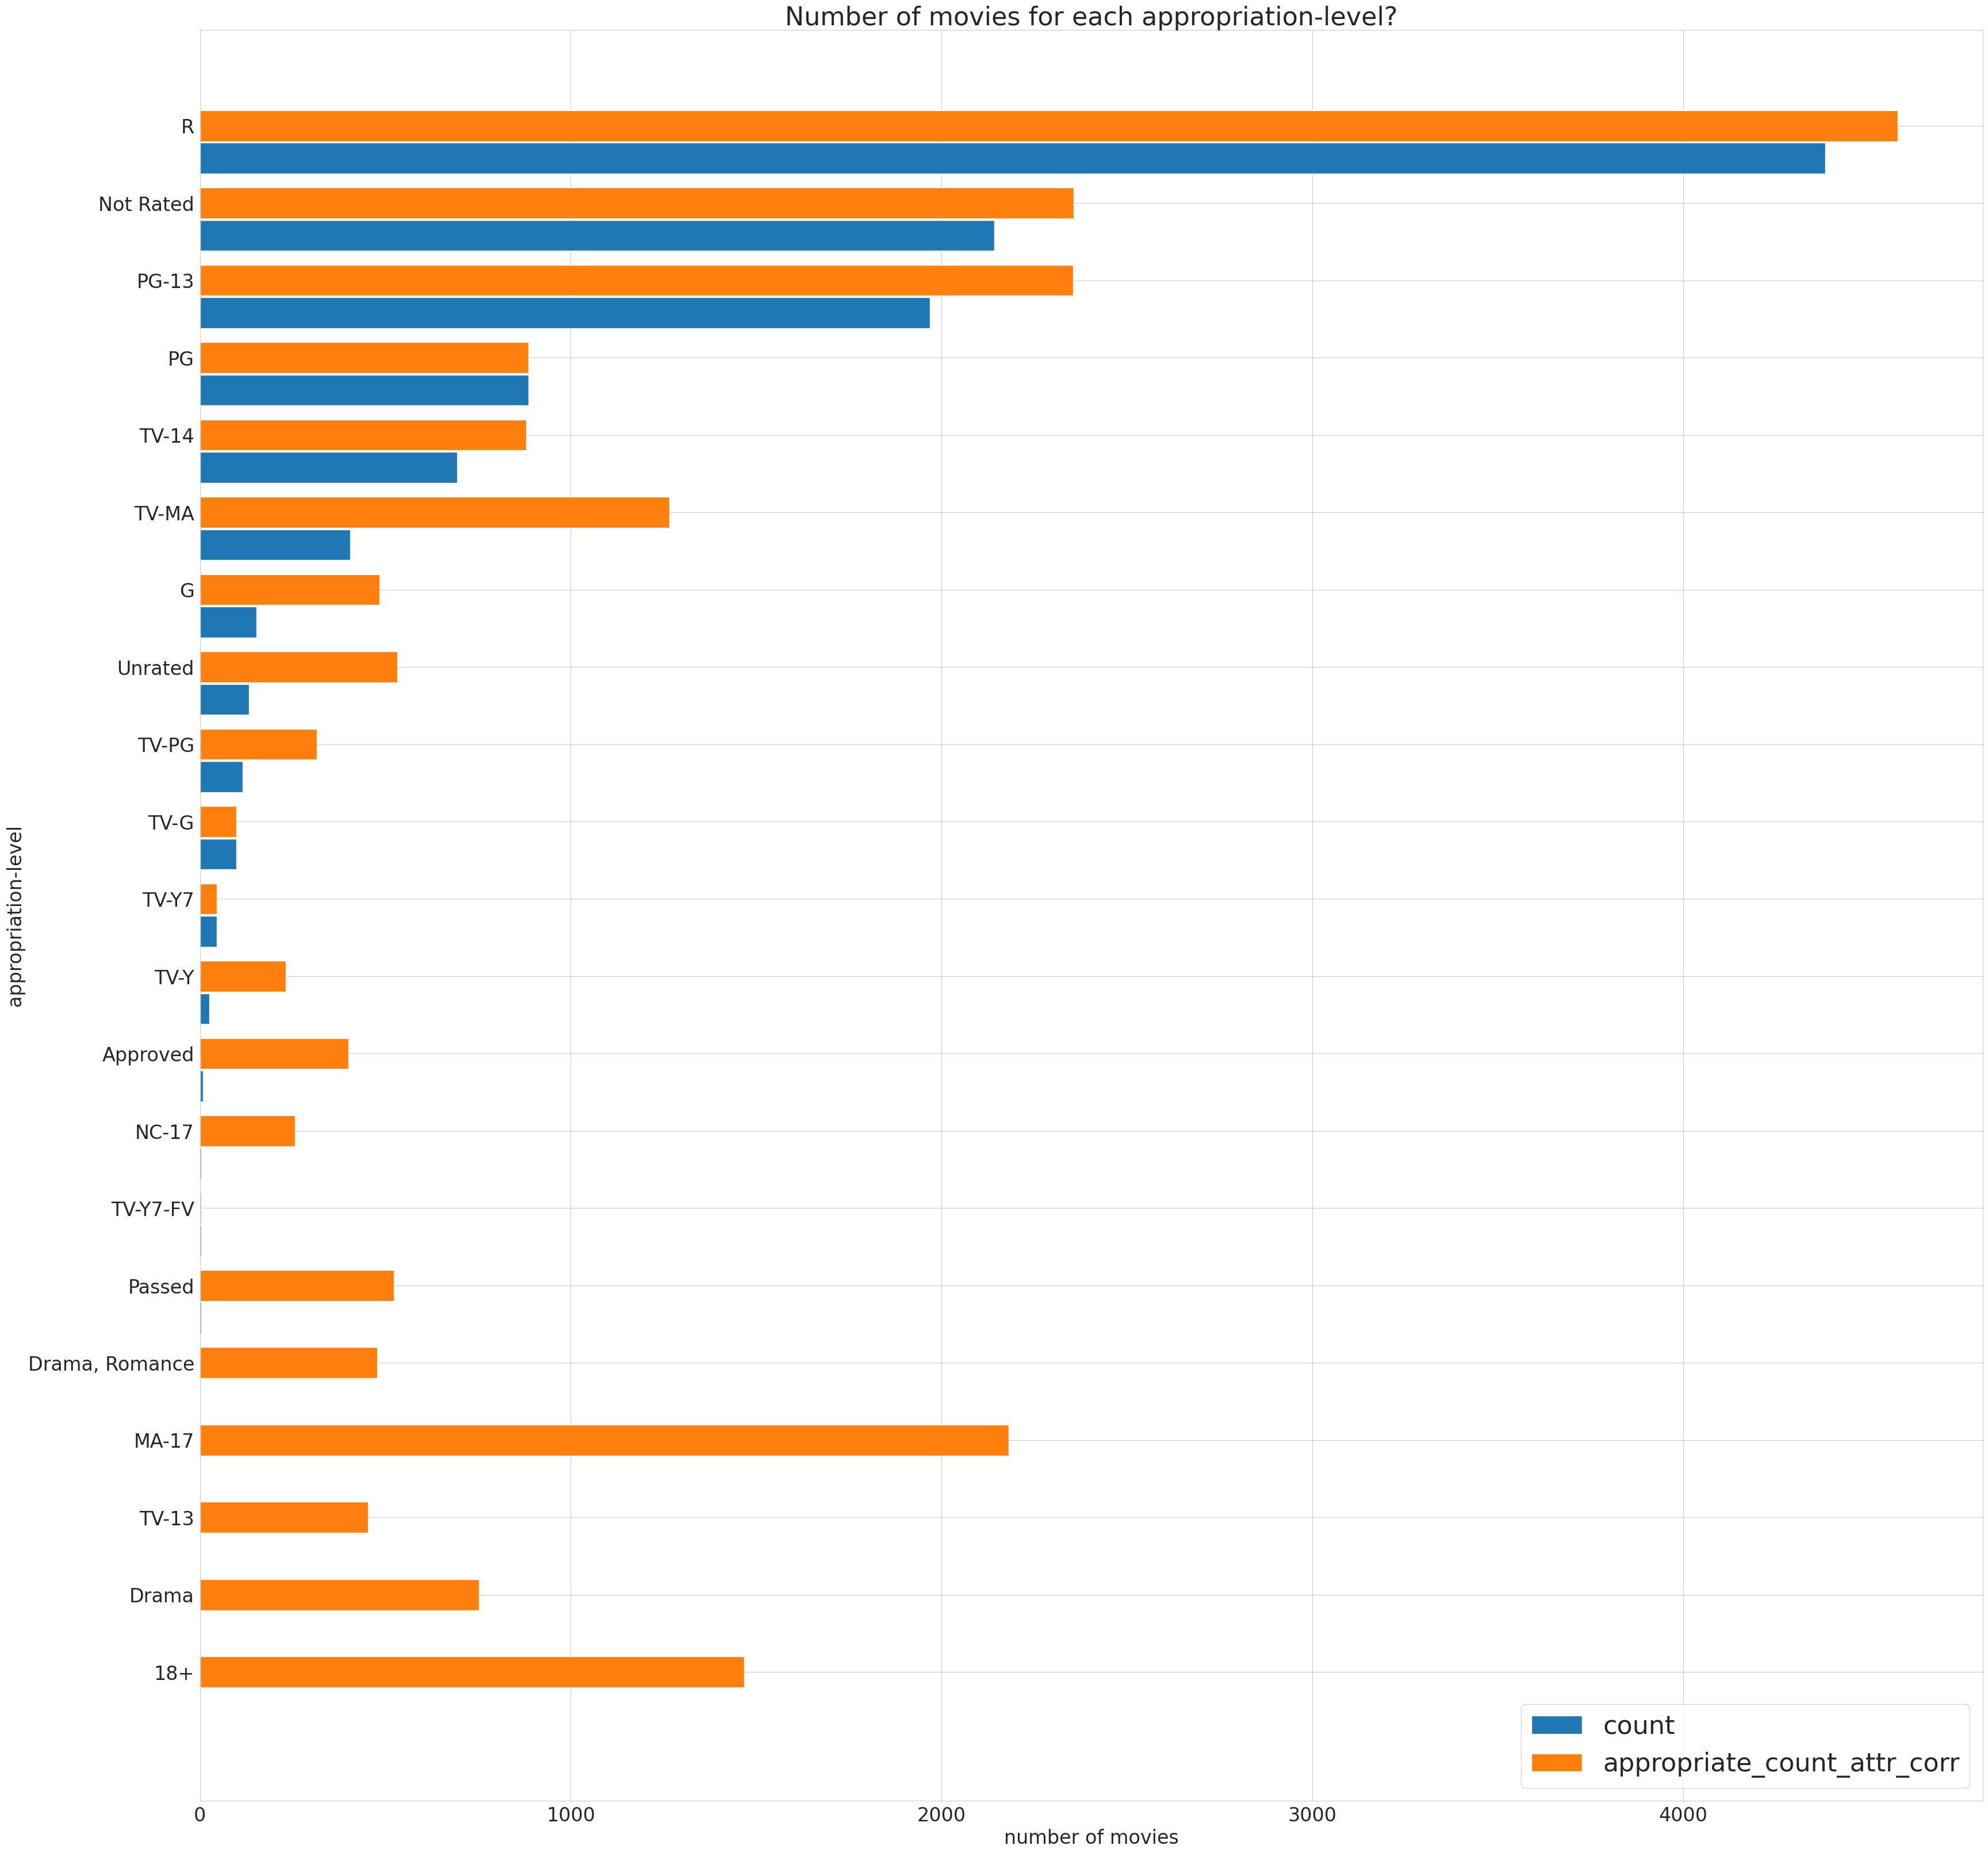

In [129]:
appropriate_count_attr_corr = appropriate_count
appropriate_count_attr_corr['appropriate_count_attr_corr'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_attr_corr['appropriate_for'].value_counts().index):
        appropriate_count_attr_corr.loc[[level], ['appropriate_count_attr_corr']] = mov_data_attr_corr['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_attr_corr))), tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['count'], label='count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_attr_corr)))], tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count_attr_corr'], label='appropriate_count_attr_corr', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

## 通过数据对象之间的相似性来填补缺失值

In [130]:
mov_data_sample_corr = copy.deepcopy(mov_data)

In [132]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['IMDb-rating', 'downloads', 'views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df

In [133]:
normal_mov_data = regularit(mov_data)
normal_mov_data

IMDb-rating  downloads     views
0        -0.725490  -0.000778 -0.001300
1        -1.514286  -0.000187 -0.000205
2        -0.872340  -0.003660 -0.008467
3        -3.888889  -0.003975 -0.002578
4        -0.660377  -0.001682 -0.001082
...            ...        ...       ...
20543          NaN  -0.005133 -0.003401
20544    -3.000000  -0.015784 -0.009684
20545    -3.631579  -0.008443 -0.004017
20546          NaN  -0.000790 -0.000459
20547          NaN  -0.006723 -0.003695

[20548 rows x 3 columns]

In [134]:
normal_appropriate = pd.concat([normal_mov_data, mov_data['appropriate_for']], axis=1)
normal_appropriate

IMDb-rating  downloads     views appropriate_for
0        -0.725490  -0.000778 -0.001300               R
1        -1.514286  -0.000187 -0.000205           TV-PG
2        -0.872340  -0.003660 -0.008467               R
3        -3.888889  -0.003975 -0.002578          Passed
4        -0.660377  -0.001682 -0.001082           MA-17
...            ...        ...       ...             ...
20543          NaN  -0.005133 -0.003401             NaN
20544    -3.000000  -0.015784 -0.009684             NaN
20545    -3.631579  -0.008443 -0.004017             NaN
20546          NaN  -0.000790 -0.000459             NaN
20547          NaN  -0.006723 -0.003695             NaN

[20548 rows x 4 columns]